In [1]:
#!pip install tqdm

In [2]:
#!pip install pandas

In [3]:
#!pip install nltk

In [1]:
#!pip install -U spacy

Defaulting to user installation because normal site-packages is not writeable


In [5]:
#!pip install es_core_news_sm

In [6]:
#!pip install scikit-learn

In [7]:
#!pip install matplotlib

In [8]:
#!pip install seaborn

In [9]:
#!pip install cltk

In [10]:
#!pip install scikit-plot

In [11]:
#!pip install imblearn

In [12]:
#!ls /home/martinaleo/.ssh/authorship/pydro/src


# Imports

In [1]:
from tqdm.notebook import tqdm

from data_loader import load_corpus, load_quaestio_corpus

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import re

from nltk import download
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import spacy
import es_core_news_sm

from splitting__ import Segmentation

from helpers__ import get_function_words

from features import ( 
    FeaturesFunctionWords, 
    FeaturesDVEX, 
    FeaturesMendenhall, 
    FeaturesSentenceLength, 
    FeaturesPOST, 
    FeatureSetReductor,
    FeaturesDEP,
    FeaturesPunctuation,
    HstackFeatureSet,
    #FeaturesCharNGram
)


from sklearn.feature_selection import SelectKBest, chi2

from sklearn.preprocessing import StandardScaler

from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupKFold

from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    StratifiedKFold,
    RepeatedStratifiedKFold,
    RandomizedSearchCV,
    GridSearchCV,
)

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay
)

from scikitplot.metrics import plot_roc

from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import StackingClassifier

from imblearn.over_sampling import SMOTE

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS, Isomap


/home/martinaleo/.local/lib/python3.10/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'es_core_news_sm' (3.1.0) was trained with spaCy v3.1.0 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
/home/martinaleo/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data Loading

In [6]:
# import os
# directory = '/home/martinaleo/Quaestio_AV/authorship/src/data/Corpora_Medlatin'
# for filename in os.listdir(directory):
#     if filename.endswith(".txt"):
#         splitted = filename.split('_')
#         new_name = f'{splitted[0]}' + ' - ' + f'{splitted[1]}'


#         old_file = os.path.join(directory, filename)
#         new_file = os.path.join(directory, new_name)
#         os.rename(old_file, new_file)



        

BeneFlorentinus - Candelabrum.txt
BenvenutoDaImola - ComentumSuperDantisAldigherijComoediam.txt
BenvenutoDaImola - ValerioMassimo.txt
BenvenutoDaImola - GlosseVirgilio.txt
BoncompagnoDaSigna - Ysagoge.txt
BoncompagnoDaSigna - LiberDeObsidioneAncone.txt
ClaraAssisiensis - EpistolaAdErmentrudem.txt
BoncompagnoDaSigna - Palma.txt
ClaraAssisiensis - EpistolaAdSanctamAgnetemDePraga1.txt
BoncompagnoDaSigna - RotaVeneris.txt
ClaraAssisiensis - EpistolaAdSanctamAgnetemDePraga3.txt
ClaraAssisiensis - EpistolaAdSanctamAgnetemDePraga2.txt
Dante - Monarchia.txt
Dante - DeVulgariEloquentia.txt
Dante - epistola1.txt
Dante - epistola10.txt
Dante - epistola11.txt
Dante - epistola12.txt
Dante - epistola4.txt
Dante - epistola5.txt
Dante - epistola2.txt
Dante - epistola3.txt
Dante - epistola6.txt
Dante - epistola7.txt
Dante - epistola8.txt
Dante - epistola9.txt
GiovanniBoccaccio - AdDonatum.txt
GiovanniBoccaccio - DeFrancisciPetracchi.txt
GiovanniBoccaccio - DeGenealogia.txt
FilippoVillani - ExpositioSup

In [8]:
# import os
# import shutil

# medlat_path = '/home/martinaleo/Quaestio_AV/authorship/src/data/Corpora_Medlatin'
# corpus_path = '/home/martinaleo/Quaestio_AV/authorship/src/data/Quaestio-corpus'

# for filename in os.listdir(medlat_path):
#     if filename.endswith(".txt"):
#         filepath = os.path.join(medlat_path, filename)

#         destination_file = os.path.join(corpus_path, filename)
#         shutil.move(filepath, destination_file)



In [9]:
path = '/home/martinaleo/Quaestio_AV/authorship/src/data/Quaestio-corpus'
documents, authors, filenames = load_corpus(path=path)



loading: /home/martinaleo/Quaestio_AV/authorship/src/data/Quaestio-corpus: 100%|██████████| 366/366 [00:00<00:00, 10252.08it/s]


In [12]:
np.unique(filenames, return_counts=True)[1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [35]:
print(np.unique(authors, return_counts=True))

(array(['Albertus Magnus', 'Anonymus', 'Antonio Pelacani da Parma',
       'Bartholomeus de Bononia', 'BeneFlorentinus', 'BenvenutoDaImola',
       'BoncompagnoDaSigna', 'Cicchus Esculanus', 'ClaraAssisiensis',
       'Dante', 'FilippoVillani', 'GiovanniBoccaccio',
       'GiovanniDelVirgilio', 'Girardus Cremonensis',
       'GrazioloBambaglioli', 'Guglielmo di Moerbeke', 'Guido Vernani',
       'GuidoDaPisa', 'GuidoDeColumnis', 'GuidoFaba', 'IacobusDeVaragine',
       'Iohannes De Sacrobosco', 'Iohannes Peckham', 'IohannesDeAppia',
       'IohannesDePlanoCarpini', 'IulianusDeSpira', 'Kilwardby',
       'Michael Scotus', 'Misc', 'NicolaTrevet', 'Nicole Oresme',
       'PierDellaVigna', 'PietroAlighieri', 'Ptolemaeus Lucensis',
       'RaimundusLullus', 'Robertus Anglicus', 'Robertus Grosseteste',
       'RyccardusDeSanctoGermano', 'Thomas De Aquino', 'Tolomeo da Lucca',
       'ZonoDeMagnalis'], dtype='<U25'), array([  4,   6,   1,   1,   1,   3,   4,   1,   4,  14,   1,  27,   2,
    

In [14]:
print(filenames[10])
frase = documents[10][:392]
print(frase)

Anonymus - TractatusDeDispositioneUniversi
Unde prima in qua Sancta Ecclesia credit solem fuisse creatum uocatur Aries. Nam aries est unum animal per quod totum dimidium annum consuetum est iacere in uno latere et in alio dimidio anno in alio, ita quod sic iacendo distinguit annum in duas partes equales, scilicet in diem artificialem et noctem, tunc enim dies artificialis est equalis nocti. Propter talem similitudinem illa pars zod


In [15]:
#!pip install https://huggingface.co/latincy/la_core_web_lg/resolve/main/la_core_web_lg-any-py3-none-any.whl



In [1]:
# pip install https://huggingface.co/latincy/la_core_web_lg/resolve/main/la_core_web_lg-any-py3-none-any.whl
import spacy
nlp = spacy.load('la_core_web_lg')
doc = nlp('Haec narrantur a poetis de Perseo. Haec narrantur a poetis de Pippo. Haec narrantur a poetis de Topolino. js2h')

print(f'{doc[0].text}, {doc[0].norm_}, {doc[0].lemma_}, {doc[0].pos_}')

# > Haec, haec, hic, DET

/home/martinaleo/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Haec, haec, Hic, DET


In [3]:
type(doc.text)

str

In [4]:
sent_lens=[]
for sentence in doc.sents:
    sent_len = [len(str(token)) for token in sentence]
    print([len(str(token)) for token in sentence])
    sent_lens += sent_len
sent_lens

[4, 9, 1, 6, 2, 6, 1]
[4, 9, 1, 6, 2, 5, 1]
[4, 9, 1, 6, 2, 8, 1]
[4]


[4, 9, 1, 6, 2, 6, 1, 4, 9, 1, 6, 2, 5, 1, 4, 9, 1, 6, 2, 8, 1, 4]

In [11]:
for sent in doc.sents:
    for token in sent:
        print(token, token.dep_)

Haec nsubj:pass
narrantur ROOT
a case
poetis obl:agent
de case
Perseo obl
. punct
Haec nsubj:pass
narrantur ROOT
a case
poetis obl:agent
de case
Pippo obl:agent
. punct
Haec nsubj:pass
narrantur ROOT
a case
poetis obl:agent
de case
Topolino obl
. punct
js2h ROOT


In [ ]:
for 

In [12]:
for sentence in doc.sents:
    sentence_deps = [token.dep_ if token.dep_ != '' else 'Unk' for token in sentence]
    print(sentence_deps)

['nsubj:pass', 'ROOT', 'case', 'obl:agent', 'case', 'obl', 'punct']
['nsubj:pass', 'ROOT', 'case', 'obl:agent', 'case', 'obl:agent', 'punct']
['nsubj:pass', 'ROOT', 'case', 'obl:agent', 'case', 'obl', 'punct']
['ROOT']


In [13]:
documents = ['Haec narrantur a poetis de Perseo. Haec narrantur a poetis de Pippo. Haec narrantur a poetis de Topolino. js2h', 'duhfusd fudjs ufjs ff s dfd']

In [14]:
for doc in documents:
    print(type(doc))

<class 'str'>
<class 'str'>


In [47]:

    

max_doc_len = max([len(document) for document in documents])


In [48]:
tokens = [str(token) for token in doc]
tokens


['Haec',
 'narrantur',
 'a',
 'poetis',
 'de',
 'Perseo',
 '.',
 'Haec',
 'narrantur',
 'a',
 'poetis',
 'de',
 'Pippo',
 '.',
 'Haec',
 'narrantur',
 'a',
 'poetis',
 'de',
 'Topolino',
 '.',
 'js2h']

In [8]:
sentences = [str(sentence) for sentence in doc.sents]
sentences

['Haec narrantur a poetis de Perseo.',
 'Haec narrantur a poetis de Pippo.',
 'Haec narrantur a poetis de Topolino.',
 'js2h']

In [15]:
[token.pos_ for token in sentence for sentence in doc.sents]

['VERB', 'VERB', 'VERB', 'VERB']

In [17]:
for sentence in doc.sents:
    for token in sentence:
        print(type(token.pos_))



<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [50]:
POS_tags = [token.pos_ if token.pos_ != '' else 'Unk' for token in doc]
POS_tags

['DET',
 'VERB',
 'ADP',
 'NOUN',
 'ADP',
 'PROPN',
 'PUNCT',
 'DET',
 'VERB',
 'ADP',
 'NOUN',
 'ADP',
 'PROPN',
 'PUNCT',
 'DET',
 'VERB',
 'ADP',
 'NOUN',
 'ADP',
 'PROPN',
 'PUNCT',
 'VERB']

In [51]:
DEP_tags = [token.dep_ if token.dep_ != '' else 'Unk' for token in doc]
DEP_tags

['nsubj:pass',
 'ROOT',
 'case',
 'obl:agent',
 'case',
 'obl',
 'punct',
 'nsubj:pass',
 'ROOT',
 'case',
 'obl:agent',
 'case',
 'obl:agent',
 'punct',
 'nsubj:pass',
 'ROOT',
 'case',
 'obl:agent',
 'case',
 'obl',
 'punct',
 'ROOT']

In [17]:
#!pip install git+https://github.com/diyclassics/spacy-lookups-data.git


In [35]:
from spacy.lookups import Lookups

In [37]:
lookups = Lookups()
lookups.__contains__('la')

False

In [1]:
import spacy
from spacy.lookups import load_lookups
nlp = spacy.load("la_core_web_md")

# Importing as module.
import la_core_web_md
nlp = la_core_web_md.load()

/home/martinaleo/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
!pip install la_core_web_trf

Defaulting to user installation because normal site-packages is not writeable


In [14]:
!pip install https://huggingface.co/latincy/la_core_web_lg/resolve/main/la_core_web_lg-any-py3-none-any.whl
import spacy
nlp = spacy.load('la_core_web_lg')
doc = nlp('Haec narrantur a poetis de Perseo')

print(f'{doc[0].text}, {doc[0].norm_}, {doc[0].lemma_}, {doc[0].pos_}')

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 MB 4.5 MB/s eta 0:00:0000:0100:01


ValueError: [E955] Can't find table(s) lemma_lookup for language 'la' in spacy-lookups-data. Make sure you have the package installed or provide your own lookup tables if no default lookups are available for your language.

In [9]:
!pip install https://huggingface.co/latincy/la_core_web_trf/resolve/main/la_core_web_trf-any-py3-none-any.whl

# Using spacy.load().
import spacy
nlp = spacy.load("la_core_web_trf")

# Importing as module.
import la_core_web_trf
nlp = la_core_web_trf.load()

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 GB 382.8 kB/s eta 0:00:000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.8/197.8 KB 1.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 14.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.0/314.0 KB 3.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 15.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.2 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.6/402.6 KB 6.5 MB/s eta 0:00:0000:01


ValueError: [E955] Can't find table(s) lemma_lookup for language 'la' in spacy-lookups-data. Make sure you have the package installed or provide your own lookup tables if no default lookups are available for your language.

In [10]:
!pip install spacy-lookups-data

Defaulting to user installation because normal site-packages is not writeable


In [22]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [18]:
!pip install https://huggingface.co/latincy/la_core_web_lg/resolve/main/la_core_web_lg-any-py3-none-any.whl


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 MB 1.7 MB/s eta 0:00:0000:0100:01


In [20]:
!pip install spacy

Defaulting to user installation because normal site-packages is not writeable


In [26]:
!pip install spacy[lookups]

Defaulting to user installation because normal site-packages is not writeable


In [27]:
import spacy
nlp = spacy.load('la_core_web_lg')
doc = nlp('Haec narrantur a poetis de Perseo')

print(f'{doc[0].text}, {doc[0].norm_}, {doc[0].lemma_}, {doc[0].pos_}')

# > Haec, haec, hic, DET

ValueError: [E955] Can't find table(s) lemma_lookup for language 'la' in spacy-lookups-data. Make sure you have the package installed or provide your own lookup tables if no default lookups are available for your language.

In [2]:
!pip install la_core_web_lg

Defaulting to user installation because normal site-packages is not writeable


In [11]:
import la_core_web_lg


ValueError: [E955] Can't find table(s) lemma_lookup for language 'la' in spacy-lookups-data. Make sure you have the package installed or provide your own lookup tables if no default lookups are available for your language.

In [16]:
nlp = spacy.load("es_core_news_sm")

frase = "Cinco leguas de la ciudad de Sevilla, está un lugar que se llama Castiblanco; y, en uno de muchos mesones que tiene, a la hora que anochecía, entró un caminante sobre un hermoso cuartago, estranjero. No traía criado alguno, y, sin esperar que le tuviesen el estribo, se arrojó de la silla con gran ligereza."

# Funzione per generare trigrammi di token significativi
def generate_trigrams(tokens):
    trigrams = []
    for i in range(len(tokens) - 2):
        trigram = (tokens[i].text, tokens[i+1].text, tokens[i+2].text)
        trigrams.append(trigram)
    return trigrams

# Analizza la frase con spaCy
doc = nlp(frase)

# Estrai i token significativi (ad es. parole, escludendo spazi e punteggiatura)
tokens_significativi = [token for token in doc if not token.is_space and not token.is_punct]

# Ottieni i trigrammi di token significativi
trigrammi = generate_trigrams(tokens_significativi)

# Stampare i trigrammi di token significativi
print(trigrammi)


/home/martinaleo/.local/lib/python3.10/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'es_core_news_sm' (3.1.0) was trained with spaCy v3.1.0 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


[('Cinco', 'leguas', 'de'), ('leguas', 'de', 'la'), ('de', 'la', 'ciudad'), ('la', 'ciudad', 'de'), ('ciudad', 'de', 'Sevilla'), ('de', 'Sevilla', 'está'), ('Sevilla', 'está', 'un'), ('está', 'un', 'lugar'), ('un', 'lugar', 'que'), ('lugar', 'que', 'se'), ('que', 'se', 'llama'), ('se', 'llama', 'Castiblanco'), ('llama', 'Castiblanco', 'y'), ('Castiblanco', 'y', 'en'), ('y', 'en', 'uno'), ('en', 'uno', 'de'), ('uno', 'de', 'muchos'), ('de', 'muchos', 'mesones'), ('muchos', 'mesones', 'que'), ('mesones', 'que', 'tiene'), ('que', 'tiene', 'a'), ('tiene', 'a', 'la'), ('a', 'la', 'hora'), ('la', 'hora', 'que'), ('hora', 'que', 'anochecía'), ('que', 'anochecía', 'entró'), ('anochecía', 'entró', 'un'), ('entró', 'un', 'caminante'), ('un', 'caminante', 'sobre'), ('caminante', 'sobre', 'un'), ('sobre', 'un', 'hermoso'), ('un', 'hermoso', 'cuartago'), ('hermoso', 'cuartago', 'estranjero'), ('cuartago', 'estranjero', 'No'), ('estranjero', 'No', 'traía'), ('No', 'traía', 'criado'), ('traía', 'cria

In [21]:
def generate_char_trigrams(text):
    trigrams = []
    # Rimuovi spazi e punteggiatura dalla frase
    cleaned_text = "".join(char for char in text if char != ' ')
    print(cleaned_text)
    # Genera trigrammi di caratteri
    for i in range(len(cleaned_text) - 2):
        trigram = cleaned_text[i:i+3]
        trigrams.append(trigram)
    return trigrams

# Ottieni i trigrammi di caratteri dalla frase
trigrammi_caratteri = generate_char_trigrams(frase)

# Stampare i trigrammi di caratteri
print(trigrammi_caratteri)

CincoleguasdelaciudaddeSevilla,estáunlugarquesellamaCastiblanco;y,enunodemuchosmesonesquetiene,alahoraqueanochecía,entróuncaminantesobreunhermosocuartago,estranjero.Notraíacriadoalguno,y,sinesperarqueletuviesenelestribo,searrojódelasillacongranligereza.
['Cin', 'inc', 'nco', 'col', 'ole', 'leg', 'egu', 'gua', 'uas', 'asd', 'sde', 'del', 'ela', 'lac', 'aci', 'ciu', 'iud', 'uda', 'dad', 'add', 'dde', 'deS', 'eSe', 'Sev', 'evi', 'vil', 'ill', 'lla', 'la,', 'a,e', ',es', 'est', 'stá', 'táu', 'áun', 'unl', 'nlu', 'lug', 'uga', 'gar', 'arq', 'rqu', 'que', 'ues', 'ese', 'sel', 'ell', 'lla', 'lam', 'ama', 'maC', 'aCa', 'Cas', 'ast', 'sti', 'tib', 'ibl', 'bla', 'lan', 'anc', 'nco', 'co;', 'o;y', ';y,', 'y,e', ',en', 'enu', 'nun', 'uno', 'nod', 'ode', 'dem', 'emu', 'muc', 'uch', 'cho', 'hos', 'osm', 'sme', 'mes', 'eso', 'son', 'one', 'nes', 'esq', 'squ', 'que', 'uet', 'eti', 'tie', 'ien', 'ene', 'ne,', 'e,a', ',al', 'ala', 'lah', 'aho', 'hor', 'ora', 'raq', 'aqu', 'que', 'uea', 'ean', 'ano', 'no

In [25]:
def generate_char_trigrams(text):
    trigrams = []
    # Sostituisci gli spazi con '\n' nella frase
    modified_text = text.replace(' ', '\\n')
    
    # Genera trigrammi di caratteri
    for i in range(len(modified_text) - 2):
        trigram = modified_text[i:i+3]
        trigrams.append(trigram)
    
    return trigrams

# Ottieni i trigrammi di caratteri dalla frase
trigrammi_caratteri = generate_char_trigrams(frase)

# Stampare i trigrammi di caratteri
print(trigrammi_caratteri)

['Cin', 'inc', 'nco', 'co\n', 'o\nl', '\nle', 'leg', 'egu', 'gua', 'uas', 'as\n', 's\nd', '\nde', 'de\n', 'e\nl', '\nla', 'la\n', 'a\nc', '\nci', 'ciu', 'iud', 'uda', 'dad', 'ad\n', 'd\nd', '\nde', 'de\n', 'e\nS', '\nSe', 'Sev', 'evi', 'vil', 'ill', 'lla', 'la,', 'a,\n', ',\ne', '\nes', 'est', 'stá', 'tá\n', 'á\nu', '\nun', 'un\n', 'n\nl', '\nlu', 'lug', 'uga', 'gar', 'ar\n', 'r\nq', '\nqu', 'que', 'ue\n', 'e\ns', '\nse', 'se\n', 'e\nl', '\nll', 'lla', 'lam', 'ama', 'ma\n', 'a\nC', '\nCa', 'Cas', 'ast', 'sti', 'tib', 'ibl', 'bla', 'lan', 'anc', 'nco', 'co;', 'o;\n', ';\ny', '\ny,', 'y,\n', ',\ne', '\nen', 'en\n', 'n\nu', '\nun', 'uno', 'no\n', 'o\nd', '\nde', 'de\n', 'e\nm', '\nmu', 'muc', 'uch', 'cho', 'hos', 'os\n', 's\nm', '\nme', 'mes', 'eso', 'son', 'one', 'nes', 'es\n', 's\nq', '\nqu', 'que', 'ue\n', 'e\nt', '\nti', 'tie', 'ien', 'ene', 'ne,', 'e,\n', ',\na', '\na\n', 'a\nl', '\nla', 'la\n', 'a\nh', '\nho', 'hor', 'ora', 'ra\n', 'a\nq', '\nqu', 'que', 'ue\n', 'e\na', '\nan', 'ano

In [24]:
def generate_trigrams(text):
    trigrams = []
    for i in range(len(text) - 2):
        trigram = text[i:i+3]
        trigrams.append(trigram)
    return trigrams

# Ottenere i trigrammi dalla frase
trigrammi = generate_trigrams(frase)
print(trigrammi)

['Cin', 'inc', 'nco', 'co ', 'o l', ' le', 'leg', 'egu', 'gua', 'uas', 'as ', 's d', ' de', 'de ', 'e l', ' la', 'la ', 'a c', ' ci', 'ciu', 'iud', 'uda', 'dad', 'ad ', 'd d', ' de', 'de ', 'e S', ' Se', 'Sev', 'evi', 'vil', 'ill', 'lla', 'la,', 'a, ', ', e', ' es', 'est', 'stá', 'tá ', 'á u', ' un', 'un ', 'n l', ' lu', 'lug', 'uga', 'gar', 'ar ', 'r q', ' qu', 'que', 'ue ', 'e s', ' se', 'se ', 'e l', ' ll', 'lla', 'lam', 'ama', 'ma ', 'a C', ' Ca', 'Cas', 'ast', 'sti', 'tib', 'ibl', 'bla', 'lan', 'anc', 'nco', 'co;', 'o; ', '; y', ' y,', 'y, ', ', e', ' en', 'en ', 'n u', ' un', 'uno', 'no ', 'o d', ' de', 'de ', 'e m', ' mu', 'muc', 'uch', 'cho', 'hos', 'os ', 's m', ' me', 'mes', 'eso', 'son', 'one', 'nes', 'es ', 's q', ' qu', 'que', 'ue ', 'e t', ' ti', 'tie', 'ien', 'ene', 'ne,', 'e, ', ', a', ' a ', 'a l', ' la', 'la ', 'a h', ' ho', 'hor', 'ora', 'ra ', 'a q', ' qu', 'que', 'ue ', 'e a', ' an', 'ano', 'noc', 'och', 'che', 'hec', 'ecí', 'cía', 'ía,', 'a, ', ', e', ' en', 'ent'

In [35]:
import spacy

nlp = spacy.load("es_core_news_sm")
doc = nlp(frase)
print(doc.text)
couples_pos = list()
couples_dep = list()
trigrams_pos = list()
trigrams_dep = ()

for token in doc:
    couples_pos.append((token.text, token.pos_))
    couples_dep.append((token.text, token.dep_))
    #print(token.text, token.pos_, token.dep_)

print(couples_dep)

/home/martinaleo/.local/lib/python3.10/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'es_core_news_sm' (3.1.0) was trained with spaCy v3.1.0 and may not be 100% compatible with the current version (3.7.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Cinco leguas de la ciudad de Sevilla, está un lugar que se llama Castiblanco; y, en uno de muchos mesones que tiene, a la hora que anochecía, entró un caminante sobre un hermoso cuartago, estranjero. No traía criado alguno, y, sin esperar que le tuviesen el estribo, se arrojó de la silla con gran ligereza.
[('Cinco', 'nummod'), ('leguas', 'nsubj'), ('de', 'case'), ('la', 'det'), ('ciudad', 'nmod'), ('de', 'case'), ('Sevilla', 'nmod'), (',', 'punct'), ('está', 'ROOT'), ('un', 'det'), ('lugar', 'nsubj'), ('que', 'nsubj'), ('se', 'obj'), ('llama', 'acl'), ('Castiblanco', 'obj'), (';', 'punct'), ('y', 'cc'), (',', 'punct'), ('en', 'case'), ('uno', 'obl'), ('de', 'case'), ('muchos', 'det'), ('mesones', 'nmod'), ('que', 'obj'), ('tiene', 'acl'), (',', 'punct'), ('a', 'case'), ('la', 'det'), ('hora', 'obl'), ('que', 'obj'), ('anochecía', 'acl'), (',', 'punct'), ('entró', 'conj'), ('un', 'det'), ('caminante', 'obj'), ('sobre', 'case'), ('un', 'det'), ('hermoso', 'amod'), ('cuartago', 'obl'), (

In [37]:
def generate_trigrams(tokens):
    trigrams = []
    for i in range(len(tokens) - 2):
        trigram = (tokens[i], tokens[i+1], tokens[i+2])
        trigrams.append(trigram)
    return trigrams

# Analizza la frase con spaCy
doc = nlp(frase)

# Ottieni i trigrammi di POS e dipendenze
trigram_pos = generate_trigrams([token.pos_ for token in doc])
trigram_dep = generate_trigrams([token.dep_ for token in doc])

# Stampare i trigrammi di POS e dipendenze
print("Trigrammi di POS:")
print(trigram_pos)

print("\nTrigrammi di Dipendenze:")
print(trigram_dep)

Trigrammi di POS:
[('NUM', 'NOUN', 'ADP'), ('NOUN', 'ADP', 'DET'), ('ADP', 'DET', 'NOUN'), ('DET', 'NOUN', 'ADP'), ('NOUN', 'ADP', 'PROPN'), ('ADP', 'PROPN', 'PUNCT'), ('PROPN', 'PUNCT', 'AUX'), ('PUNCT', 'AUX', 'DET'), ('AUX', 'DET', 'NOUN'), ('DET', 'NOUN', 'PRON'), ('NOUN', 'PRON', 'PRON'), ('PRON', 'PRON', 'VERB'), ('PRON', 'VERB', 'PROPN'), ('VERB', 'PROPN', 'PUNCT'), ('PROPN', 'PUNCT', 'CCONJ'), ('PUNCT', 'CCONJ', 'PUNCT'), ('CCONJ', 'PUNCT', 'ADP'), ('PUNCT', 'ADP', 'PRON'), ('ADP', 'PRON', 'ADP'), ('PRON', 'ADP', 'DET'), ('ADP', 'DET', 'NOUN'), ('DET', 'NOUN', 'PRON'), ('NOUN', 'PRON', 'VERB'), ('PRON', 'VERB', 'PUNCT'), ('VERB', 'PUNCT', 'ADP'), ('PUNCT', 'ADP', 'DET'), ('ADP', 'DET', 'NOUN'), ('DET', 'NOUN', 'PRON'), ('NOUN', 'PRON', 'VERB'), ('PRON', 'VERB', 'PUNCT'), ('VERB', 'PUNCT', 'VERB'), ('PUNCT', 'VERB', 'DET'), ('VERB', 'DET', 'NOUN'), ('DET', 'NOUN', 'ADP'), ('NOUN', 'ADP', 'DET'), ('ADP', 'DET', 'ADJ'), ('DET', 'ADJ', 'NOUN'), ('ADJ', 'NOUN', 'PUNCT'), ('NOUN', 'P

In [5]:
np.unique(authors, return_counts=True)

(array(['Agustín de Rojas Villandrando ', 'Alonso de Castillo Solórzano ',
        'Avellaneda ', 'Cervantes ', 'Cristóbal Suárez de Figueroa ',
        'Guillén de Castro ', 'Juan Ruiz de Alarcón y Mendoza ',
        'Lope de Vega ', 'Mateo Alemán ', 'Pasamonte ', 'Pérez de Hita ',
        'Quevedo ', 'Tirso de Molina '], dtype='<U31'),
 array([ 1,  2,  1, 13,  1,  2,  1,  4,  2,  1,  1,  1,  1]))

# Data Cleaning

In [6]:
len(authors)

31

### Noise elimination

In [7]:
documents = [document.lower() for document in documents]
documents = [(re.sub(r'\[(?:(?!\[|\]).)*\]', '', document)) for document in documents] 
# elimina le parti di testo delimitate da [] e che non contengono al loro interno ][
# documents = documents[:3] + documents[4:]
# authors= authors[:3] + authors[4:]
# filenames= filenames[:3] + filenames[4:]

authors = [author.rstrip() for author in authors]

# Data Understanding

## Works per author

In [9]:
sizes = np.unique(authors, return_counts=True)[1]
labels = np.unique(authors, return_counts=True)[0]

In [10]:
plt.rcParams['figure.figsize'] = [8,6]
colors = sns.color_palette('pastel')

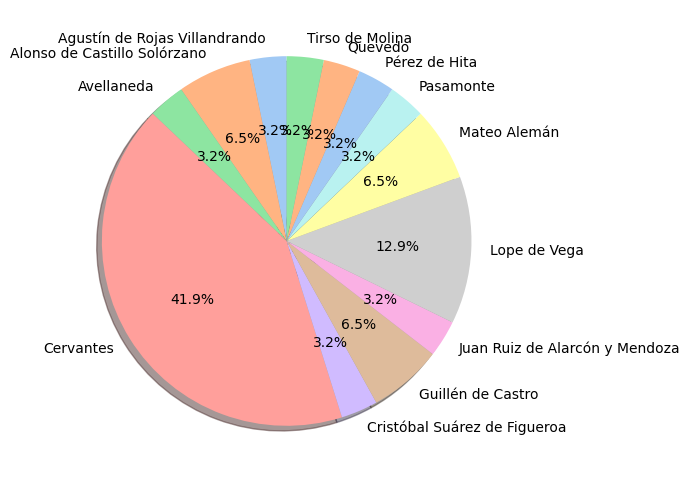

In [44]:
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors)
plt.show()

## Words per author

In [9]:
import nltk

In [8]:
data = {
    'Text': documents,
    'Author': [author.strip() for author in authors],
    'Title': [filename.split('-')[1].strip() for filename in filenames]
}

df = pd.DataFrame(columns=['Text', 'Author', 'Title'], data=data)
df.head()

,Text,Author,Title
0,a don martín valero de franqueza\ncaballero de...,Agustín de Rojas Villandrando,El viaje entretenido
1,preliminares\n\n\ndedicatoria al ilustrísimo s...,Alonso de Castillo Solórzano,Aventuras del Bachiller Trapaza
2,preliminares\n\na d. francisco maza de rocamor...,Alonso de Castillo Solórzano,Las harpías en Madrid y coche de las estafas
3,como casi es comedia toda la historia de don q...,Avellaneda,Quijote apocrifo
4,-¡oh lamentables ruinas de la desdichada nicos...,Cervantes,El amante liberal


In [10]:
res = pd.DataFrame(columns=['Text', 'Author'])
for i,text in enumerate(df.Text): #unique authors
    sentences = nltk.sent_tokenize(text, language='spanish')
    sentence_num = len(sentences)

    tokens_tot = [nltk.word_tokenize(sent) for sent in sentences]
    tokens_tot_num = sum(len(tokens) for tokens in tokens_tot)

    df.loc[i, 'num_sentences']= sentence_num
    df.loc[i, 'num_tokens']= tokens_tot_num


KeyboardInterrupt: 

In [11]:
for i,text in enumerate(df.Text): #unique authors
    sentences = nltk.sent_tokenize(text, language='spanish')
    sentence_num = len(sentences)

    sent_len_lst= []
    tok_len_lst = []
    for sentence in sentences:
        tokens = nltk.word_tokenize(sentence) 
        sent_len_lst.append(len(tokens))

        for token in tokens:
            tok_len_lst.append(len(token))

    avg_sent_len = sum(sent_len_lst) / len(sent_len_lst) 
    avg_tok_len= sum(tok_len_lst) / len(tok_len_lst)

    tokens_tot = [nltk.word_tokenize(sent) for sent in sentences]
    tokens_tot_num = sum(len(tokens) for tokens in tokens_tot)

    flatten_toks = []
    for tok_set in tokens_tot:
        flatten_toks.extend(tok_set)
   
    ttr = len(np.unique(flatten_toks))/len(flatten_toks)

    df.loc[i, 'num_sentences']= sentence_num
    df.loc[i, 'avg_sent_len']= avg_sent_len

    df.loc[i, 'num_tokens']= tokens_tot_num
    df.loc[i, 'avg_tok_len']= avg_tok_len

    df.loc[i, 'TTR'] = ttr

In [12]:
df.head()

,Text,Author,Title,num_sentences,avg_sent_len,num_tokens,avg_tok_len,TTR
0,a don martín valero de franqueza\ncaballero de...,Agustín de Rojas Villandrando,El viaje entretenido,3686.0,32.164948,118560.0,3.876164,0.106773
1,preliminares\n\n\ndedicatoria al ilustrísimo s...,Alonso de Castillo Solórzano,Aventuras del Bachiller Trapaza,2088.0,38.092433,79537.0,4.013981,0.113922
2,preliminares\n\na d. francisco maza de rocamor...,Alonso de Castillo Solórzano,Las harpías en Madrid y coche de las estafas,1194.0,36.682580,43799.0,3.984086,0.141373
3,como casi es comedia toda la historia de don q...,Avellaneda,Quijote apocrifo,3229.0,49.226076,158951.0,3.930475,0.083548
4,-¡oh lamentables ruinas de la desdichada nicos...,Cervantes,El amante liberal,385.0,55.171429,21241.0,3.884045,0.160774


In [13]:
df_res = df.copy()
df_res = df_res.drop('Text', axis=1) 
df_res.head(10)

,Author,Title,num_sentences,avg_sent_len,num_tokens,avg_tok_len,TTR
0,Agustín de Rojas Villandrando,El viaje entretenido,3686.0,32.164948,118560.0,3.876164,0.106773
1,Alonso de Castillo Solórzano,Aventuras del Bachiller Trapaza,2088.0,38.092433,79537.0,4.013981,0.113922
2,Alonso de Castillo Solórzano,Las harpías en Madrid y coche de las estafas,1194.0,36.682580,43799.0,3.984086,0.141373
3,Avellaneda,Quijote apocrifo,3229.0,49.226076,158951.0,3.930475,0.083548
4,Cervantes,El amante liberal,385.0,55.171429,21241.0,3.884045,0.160774
5,Cervantes,El casamiento engañoso,142.0,42.021127,5967.0,3.899447,0.254734
6,Cervantes,El celoso extremeño,331.0,47.558912,15742.0,3.832613,0.183839
7,Cervantes,El coloquio de los perros,566.0,46.878092,26533.0,3.864433,0.177251
8,Cervantes,El licenciado Vidriera,274.0,39.386861,10792.0,3.939214,0.236193
9,Cervantes,La Gitanilla,734.0,37.084469,27220.0,3.853747,0.168295


In [14]:
df_res.columns

Index(['Author', 'Title', 'num_sentences', 'avg_sent_len', 'num_tokens',
       'avg_tok_len', 'TTR'],
      dtype='object')

In [29]:
grouped_df = df_res.groupby('Author')

# Calcolo delle statistiche
author_stats = grouped_df.agg(
    num_works=('Title', 'count'),
    total_tokens=('num_tokens', 'sum'),
    avg_tokens=('num_tokens', 'mean'),
    total_sentences=('num_sentences', 'sum'),
    avg_sentences=('num_sentences', 'mean'),
    avg_ttr=('TTR', 'mean')
).reset_index()

author_df = author_stats.sort_values(by='num_works', ascending=False)

In [23]:
grouped_df = df_res.groupby('Author')

# Calcolo delle statistiche
author_stats2 = grouped_df.agg(
    num_sentences=('num_sentences', 'sum'),
    avg_sent_len =('avg_sent_len', 'mean'),
    total_tokens=('num_tokens', 'sum'),
    avg_tokens=('avg_tok_len', 'mean'),
    avg_ttr=('TTR', 'mean')
).reset_index()

author_df2 = author_stats2.sort_values(by='Author', ascending=False)

In [24]:

author_stats2

,Author,num_sentences,avg_sent_len,total_tokens,avg_tokens,avg_ttr
0,Agustín de Rojas Villandrando,3686.0,32.164948,118560.0,3.876164,0.106773
1,Alonso de Castillo Solórzano,3282.0,37.387506,123336.0,3.999034,0.127647
2,Avellaneda,3229.0,49.226076,158951.0,3.930475,0.083548
3,Cervantes,8128.0,44.401443,372334.0,3.897877,0.181737
4,Cristóbal Suárez de Figueroa,2867.0,24.159400,69265.0,4.278063,0.152198
5,Guillén de Castro,3225.0,13.105663,42265.0,3.721008,0.161171
6,Juan Ruiz de Alarcón y Mendoza,1266.0,16.294629,20629.0,3.739444,0.190945
7,Lope de Vega,1333.0,42.269294,55721.0,3.996936,0.206674
8,Mateo Alemán,9869.0,28.399797,281006.0,3.948881,0.102851
9,Pasamonte,1976.0,28.497976,56312.0,3.774293,0.116281


In [32]:
author_stats.sort_values(by='Author', ascending=False).reset_index(drop=True)

,Author,num_works,total_tokens,avg_tokens,total_sentences,avg_sentences,avg_ttr
0,Tirso de Molina,1,125418.0,125418.000000,2975.0,2975.000000,0.117136
1,Quevedo,1,50020.0,50020.000000,1960.0,1960.000000,0.149060
2,Pérez de Hita,1,150063.0,150063.000000,4342.0,4342.000000,0.062734
3,Pasamonte,1,56312.0,56312.000000,1976.0,1976.000000,0.116281
4,Mateo Alemán,2,281006.0,140503.000000,9869.0,4934.500000,0.102851
5,Lope de Vega,4,55721.0,13930.250000,1333.0,333.250000,0.206674
6,Juan Ruiz de Alarcón y Mendoza,1,20629.0,20629.000000,1266.0,1266.000000,0.190945
7,Guillén de Castro,2,42265.0,21132.500000,3225.0,1612.500000,0.161171
8,Cristóbal Suárez de Figueroa,1,69265.0,69265.000000,2867.0,2867.000000,0.152198
9,Cervantes,13,372334.0,28641.076923,8128.0,625.230769,0.181737


In [33]:
author_df.to_csv('/home/martinaleo/.ssh/authorship/src/data/data_understanding/data_understanding_author_alphabetical_ord.csv', index=False) 

In [37]:
df_res.tail(13)

,Author,Title,num_sentences,avg_sent_len,num_tokens,avg_tok_len,TTR
18,Guillén de Castro,El nacimiento de Montesinos,1619.0,13.046943,21123.0,3.743171,0.154571
19,Guillén de Castro,Las mocedades del Cid,1606.0,13.164384,21142.0,3.698846,0.167770
20,Juan Ruiz de Alarcón y Mendoza,La verdad sospechosa,1266.0,16.294629,20629.0,3.739444,0.190945
21,Lope de Vega,Guzmán el Bravo,303.0,44.481848,13478.0,3.981229,0.223995
22,Lope de Vega,La desdicha por la honra,277.0,46.631769,12917.0,4.044360,0.211040
23,Lope de Vega,La prudente venganza,335.0,39.310448,13169.0,3.970385,0.203508
24,Lope de Vega,Las fortunas de Diana,418.0,38.653110,16157.0,3.991768,0.188154
25,Mateo Alemán,Primera parte de la vida de Guzmán de Alfarache,4425.0,27.684972,122506.0,3.942052,0.111488
26,Mateo Alemán,Segunda parte de la vida de Guzmán de Alfarache,5444.0,29.114622,158500.0,3.955710,0.094215
27,Pasamonte,Vida y trabajos de Jerónimo de Pasamonte,1976.0,28.497976,56312.0,3.774293,0.116281


In [34]:
df_res.to_csv('/home/martinaleo/.ssh/authorship/src/data/data_understanding/data_understanding.csv', index=False)  
author_df.to_csv('/home/martinaleo/.ssh/authorship/src/data/data_understanding/data_understanding_author.csv', index=False)  

In [25]:
# for i, text in enumerate(df['Text']): 
#     sentences = nltk.sent_tokenize(text, language='spanish')
#     sentence_num = len(sentences)

#     sent_len_lst = [len(nltk.word_tokenize(sentence)) for sentence in sentences]
#     avg_sent_len = sum(sent_len_lst) / len(sent_len_lst)

#     tok_len_lst = [len(token) for sentence in sentences for token in nltk.word_tokenize(sentence)]
#     avg_tok_len = sum(tok_len_lst) / len(tok_len_lst)

#     tokens_tot_num = sum(len(nltk.word_tokenize(sent)) for sent in sentences)

#     df.loc[i, 'num_sentences'] = sentence_num
#     df.loc[i, 'avg_sent_len'] = avg_sent_len
#     df.loc[i, 'num_tokens'] = tokens_tot_num
#     df.loc[i, 'avg_tok_len'] = avg_tok_len
# df.head()

,Text,Author,num_tokens,num_sentences,avg_sent_len,avg_tok_len
0,a don martín valero de franqueza\ncaballero de...,Agustín de Rojas Villandrando,118560,3686.0,32.164948,3.876164
1,preliminares\n\n\ndedicatoria al ilustrísimo s...,Alonso de Castillo Solórzano,79537,2088.0,38.092433,4.013981
2,preliminares\n\na d. francisco maza de rocamor...,Alonso de Castillo Solórzano,43799,1194.0,36.682580,3.984086
3,como casi es comedia toda la historia de don q...,Avellaneda,158951,3229.0,49.226076,3.930475
4,-¡oh lamentables ruinas de la desdichada nicos...,Cervantes,21241,385.0,55.171429,3.884045


In [78]:
df['num_tokens'] =df['num_tokens'].astype('float64')
df.head()

,Text,Author,num_tokens,num_sent,num_sentences
0,a don martín valero de franqueza\ncaballero de...,Agustín de Rojas Villandrando,118560.0,NaN,3686.0
1,preliminares\n\n\ndedicatoria al ilustrísimo s...,Alonso de Castillo Solórzano,79537.0,NaN,2088.0
2,preliminares\n\na d. francisco maza de rocamor...,Alonso de Castillo Solórzano,43799.0,NaN,1194.0
3,como casi es comedia toda la historia de don q...,Avellaneda,158951.0,NaN,3229.0
4,-¡oh lamentables ruinas de la desdichada nicos...,Cervantes,21241.0,NaN,385.0


In [85]:
df['num_tokens'].max()

165457.0

In [80]:
agg_data = pd.DataFrame(columns=['Author', 'mean_tok', 'mean_sent'])
for i,author in enumerate(np.unique(authors)):
    mean_sent = df[df['Author']==author]['num_sentences'].mean()
    mean_tok = df[df['Author']==author]['num_tokens'].mean()
    
    agg_data.loc[i, 'Author']= author
    agg_data.loc[i, 'mean_sent']= mean_sent
    agg_data.loc[i, 'mean_tok']= mean_tok

In [81]:
agg_data

,Author,mean_tok,mean_sent
0,Agustín de Rojas Villandrando,118560.0,3686.0
1,Alonso de Castillo Solórzano,61668.0,1641.0
2,Avellaneda,158951.0,3229.0
3,Cervantes,28641.076923,625.230769
4,Cristóbal Suárez de Figueroa,69265.0,2867.0
5,Guillén de Castro,21132.5,1612.5
6,Juan Ruiz de Alarcón y Mendoza,20629.0,1266.0
7,Lope de Vega,13930.25,333.25
8,Mateo Alemán,140503.0,4934.5
9,Pasamonte,56312.0,1976.0


<BarContainer object of 13 artists>

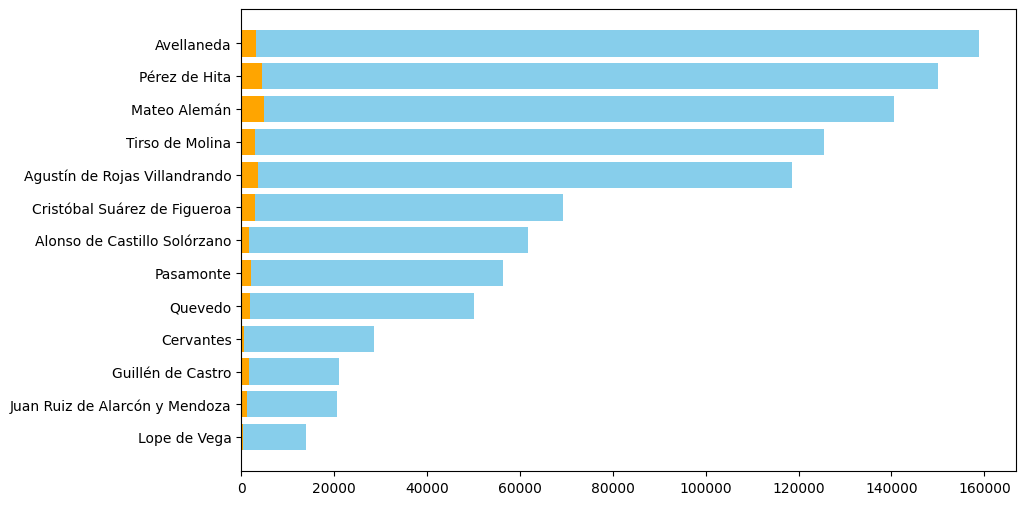

In [84]:
agg_data_sort = agg_data.sort_values("mean_tok")
plt.figure(figsize=(10, 6))
plt.barh(agg_data_sort.Author, agg_data_sort.mean_tok, color='skyblue', label='Numero di token')
plt.barh(agg_data_sort.Author, agg_data_sort.mean_sent, color='orange', label='Numero totale di frasi')

In [91]:
author_grouped = df.groupby('Author').agg({'num_sentences': 'sum', 'num_tokens': 'sum'}).reset_index()
author_grouped

,Author,num_sentences,num_tokens
0,Agustín de Rojas Villandrando,3686.0,118560.0
1,Alonso de Castillo Solórzano,3282.0,123336.0
2,Avellaneda,3229.0,158951.0
3,Cervantes,8128.0,372334.0
4,Cristóbal Suárez de Figueroa,2867.0,69265.0
5,Guillén de Castro,3225.0,42265.0
6,Juan Ruiz de Alarcón y Mendoza,1266.0,20629.0
7,Lope de Vega,1333.0,55721.0
8,Mateo Alemán,9869.0,281006.0
9,Pasamonte,1976.0,56312.0


In [96]:
data_sort = author_grouped.sort_values("num_tokens", ascending=True)
data_sort

,Author,num_sentences,num_tokens
6,Juan Ruiz de Alarcón y Mendoza,1266.0,20629.0
5,Guillén de Castro,3225.0,42265.0
11,Quevedo,1960.0,50020.0
7,Lope de Vega,1333.0,55721.0
9,Pasamonte,1976.0,56312.0
4,Cristóbal Suárez de Figueroa,2867.0,69265.0
0,Agustín de Rojas Villandrando,3686.0,118560.0
1,Alonso de Castillo Solórzano,3282.0,123336.0
12,Tirso de Molina,2975.0,125418.0
10,Pérez de Hita,4342.0,150063.0


<BarContainer object of 13 artists>

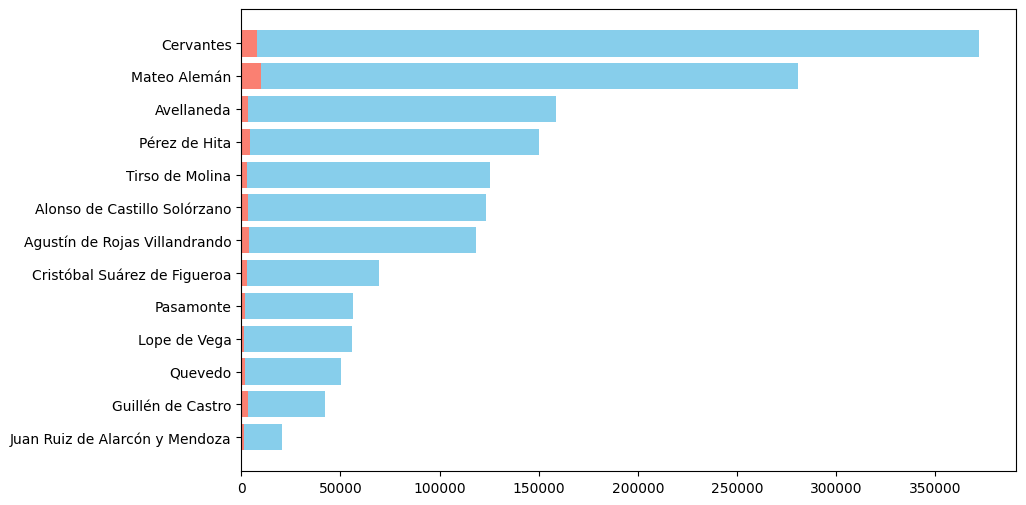

In [99]:
plt.figure(figsize=(10, 6))
plt.barh(data_sort.Author, data_sort.num_tokens, color='skyblue', label='Numero di token')
plt.barh(data_sort.Author, data_sort.num_sentences, color='salmon', label='Numero totale di frasi')

In [102]:


palette = [  "#FFD700","#6495ED"]
for author in author_grouped.Author:
    df_pca = author_grouped[author_grouped['Author']==author]
    model = PCA(n_components=2)
    df_red = model.fit_transform(data)
    sns.scatterplot(df_red[:, 0], df_red[:, 1], edgecolor='k', alpha=0.7, palette=palette)
    plt.show()
    assert False

TypeError: float() argument must be a string or a real number, not 'dict'

# Segmentation & Splitting

In [19]:
target = 'Cervantes'
y_labels =  (target, 'Other')

In [20]:
X = documents
y = [1 if author.rstrip() == target else 0 for author in authors]
# y_cat = [1 if author.rstrip() == target else 0 for author in authors]

positive_class = np.sum(y)
negative_class = len(y) - positive_class

print('Target class:', target)
print(f'Positive samples: {positive_class}')
print(f'Negative samples: {negative_class}')

Target class: Cervantes
Positive samples: 13
Negative samples: 18


In [21]:
def compute_n_tokens(filenames, documents):
    tokens_per_doc = sorted([(opus, sum(len(word_tokenize(sent)) for sent in sent_tokenize(doc))) for opus, doc in zip(filenames, documents)], key=lambda x: x[1], reverse=True)
    mean_tok = round(np.mean([n_tok for opus, n_tok in tokens_per_doc]), 2)
    median_tok = round(np.median([n_tok for opus, n_tok in tokens_per_doc]), 2)
    std_tok =  round(np.std([n_tok for opus, n_tok in tokens_per_doc]), 2)
    return tokens_per_doc, mean_tok, median_tok, std_tok

In [22]:
# tokens_per_doc,_,_,_ = compute_n_tokens([filename.split('-')[1].strip() for filename in filenames], documents)
# tokens_per_doc

In [23]:
# df_tok = pd.DataFrame(tokens_per_doc, columns=['Opus', 'Num of tokens'])

# plt.figure(figsize=(10, 6)) 
# sns.barplot(x='Opus', y='Num of tokens', data=df_tok, hue='Opus', dodge=False)  
# plt.xticks(rotation=60, ha="right")  
# plt.show()

In [24]:
# from nltk.tokenize import sent_tokenize

# sent_lenghts = [[len(word_tokenize(sent)) for sent in sent_tokenize(text)] for text in documents]

In [25]:
# mean_per_doc = 0
# mean_len_dict = dict()

# for i, sent_len_set in enumerate(sent_lenghts):
#     for sent_len in sent_len_set:
#         mean_per_doc +=sent_len
#     mean_per_doc = mean_per_doc/len(sent_len_set)
#     mean_len_dict[i+1]=mean_per_doc

In [26]:
# flat_lenghts = list()
# for row in sent_lenghts:
#     flat_lenghts.extend(row)
# [len_s for len_s in flat_lenghts if len_s > 300]

In [27]:
# plt.hist(flat_lenghts, bins=range(min(flat_lenghts), max(flat_lenghts) + 2), align='left', color='blue')
# plt.axvline(np.mean(flat_lenghts), color='red', linestyle='dashed', linewidth=1, label=f'Media = {round(np.mean(flat_lenghts),2)}')
# plt.axvline(np.median(flat_lenghts), color='black', linestyle='dashed', linewidth=1, label=f'Mediana = {round(np.median(flat_lenghts),2)}')
# plt.axvline(np.percentile(flat_lenghts,10), color='green', linestyle='dashed', linewidth=1.5, label=f'10th percentile = {round(np.percentile(flat_lenghts,10),2)}')
# plt.legend()
# plt.show()

In [103]:
X_dev, X_test, y_dev, y_test = train_test_split(
    list(documents), list(authors), test_size=0.3, stratify=authors, random_state=42
)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [6]:
min_tokens = 500

segmentator = Segmentation(split_policy='by_sentence', tokens_per_fragment=min_tokens)
splitted_docs = segmentator.fit_transform(documents=documents, authors=authors)
groups = segmentator.groups

generating fragments: 100%|██████████| 31/31 [01:38<00:00,  3.19s/it]


In [17]:
def extract_features(X_dev, y_dev, function_ws):
    function_words_extractor = FeaturesFunctionWords(language='spanish', function_words=function_ws)
    mendenhall_extractor = FeaturesMendenhall(upto=20)
    words_masker = FeaturesDVEX(function_words=function_ws)
    sentence_len_extractor = FeaturesSentenceLength()
    POS_extractor = FeaturesPOST(language='spanish')
    #DEP_extractor = FeaturesDEP()
    punct_extractor = FeaturesPunctuation()


    vectorizers = [
            function_words_extractor,
            words_masker,
            POS_extractor ,
            mendenhall_extractor,
            #DEP_extractor ,
            sentence_len_extractor,
            punct_extractor
        ]
    
    hstacker = HstackFeatureSet(vectorizers)

    feature_sets_dev = []


    for vectorizer in vectorizers:
        extractor =  FeatureSetReductor(vectorizer)
        feature_sets_dev.append(extractor.fit_transform(X_dev, authors=y_dev))

    X_dev_stacked = hstacker._hstack(feature_sets_dev)

    
    return X_dev_stacked

In [6]:
function_ws = get_function_words(lang='spanish')

In [12]:
print(function_ws)
print('[', end='')
for tok in sorted(function_ws):
    print(tok, end=', ')
print(']', end='')

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [18]:
X_dev = splitted_docs[0]
y = splitted_docs[1]
X=extract_features(X, y, function_ws)

loading cache from .postcache/dict.pkl
FeatureSetReductor for FeaturesFunctionWords
features in: 313 k: 313

FeatureSetReductor for FeaturesDVEX
features in: 423 k: 423

FeatureSetReductor for FeaturesPOST
features in: 3433 k: 3433

FeatureSetReductor for FeaturesMendenhall
features in: 18 k: 18

FeatureSetReductor for FeaturesSentenceLength
features in: 998 k: 998

FeatureSetReductor for FeaturesPunctuation
features in: 34 k: 34



In [20]:
model = TSNE(n_components=2, init='random')
data_red = model.fit_transform(X)

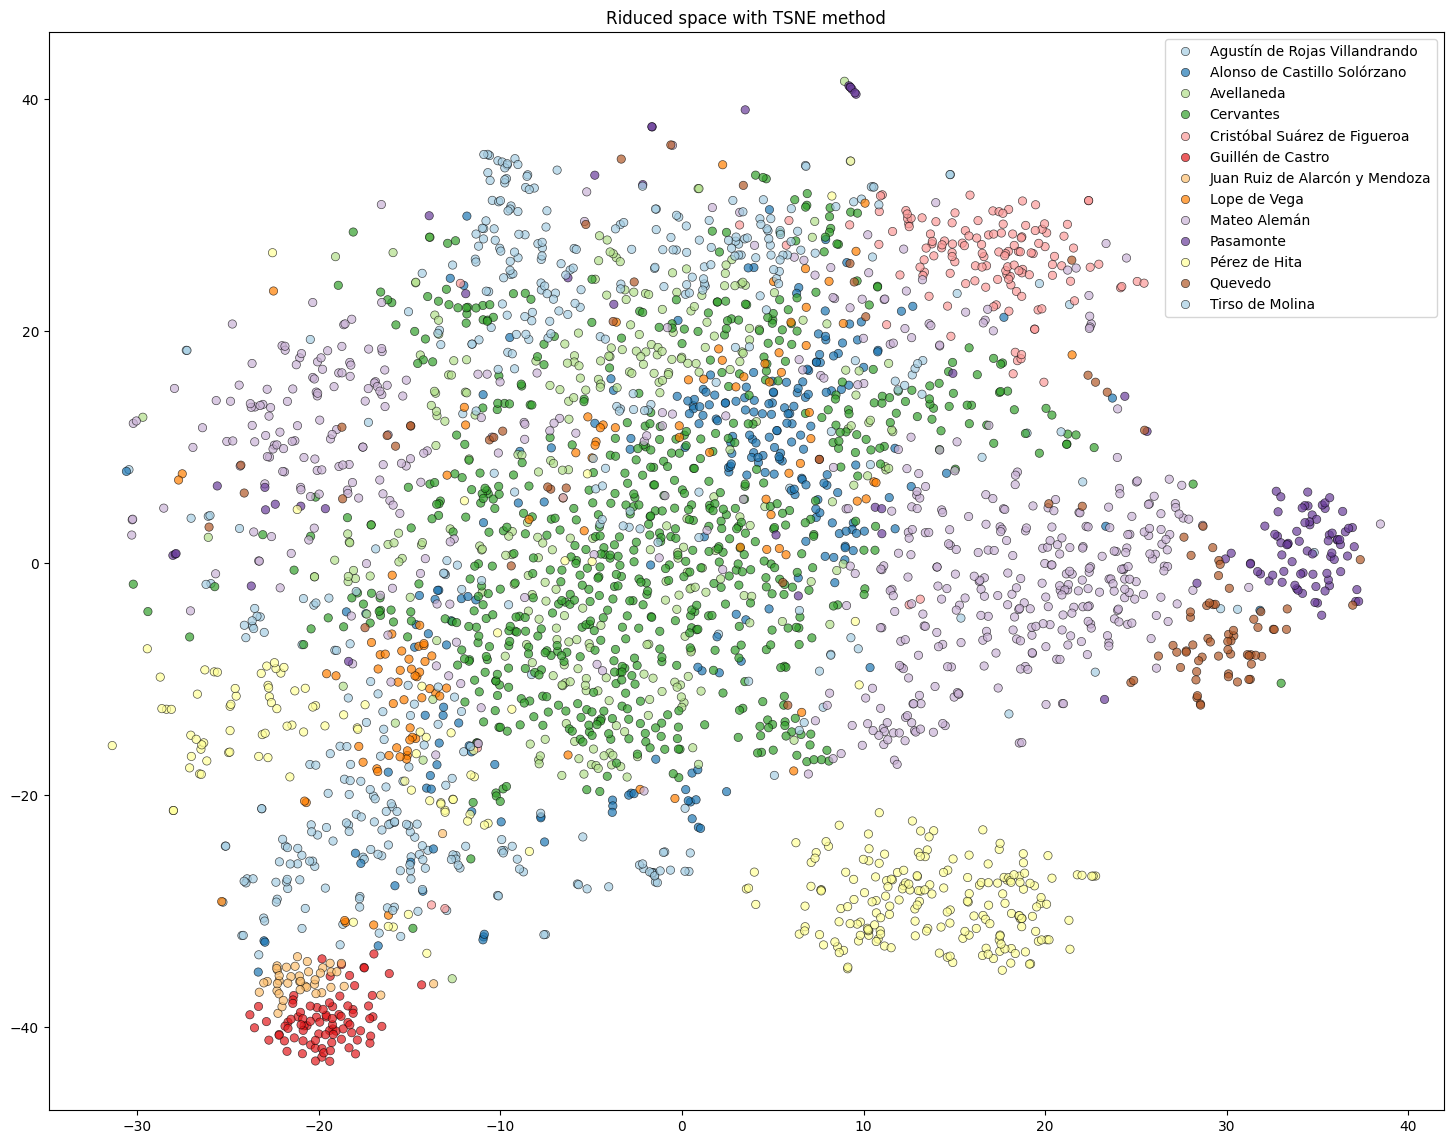

In [24]:
model_name='TSNE'
palette = sns.color_palette("Paired", 13)
plt.rcParams['figure.figsize'] = [18,14]

sns.scatterplot(x=data_red[:, 0], y=data_red[:, 1], hue=y, edgecolor='k', alpha=0.7, palette=palette)
plt.title('Riduced space with %s method' %model_name)
plt.savefig("/home/martinaleo/.ssh/authorship/src/Base_clf_cm/TSNE_vis3.pdf", dpi=300, bbox_inches="tight")
plt.show()

Current author: Agustín de Rojas Villandrando


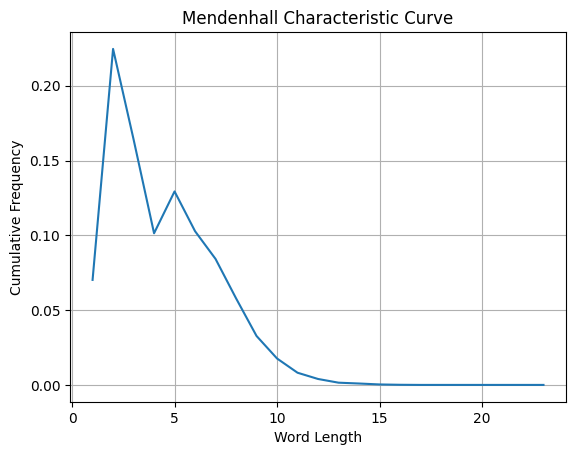

New current author: Alonso de Castillo Solórzano


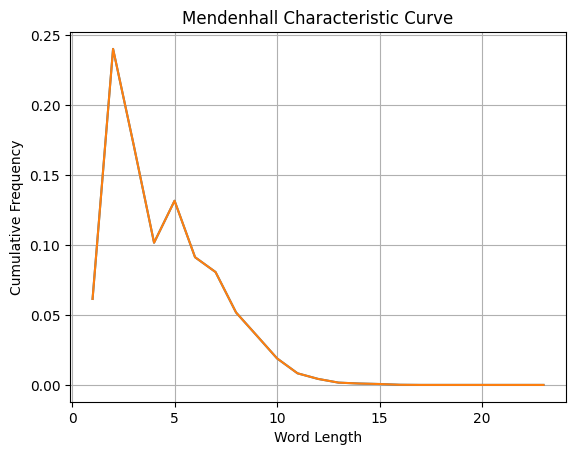

New current author: Avellaneda


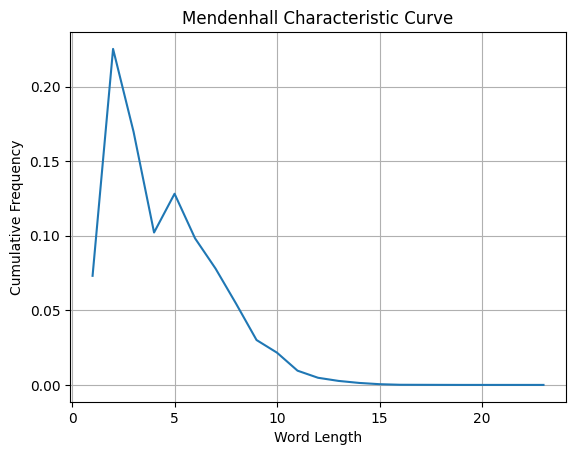

New current author: Cervantes


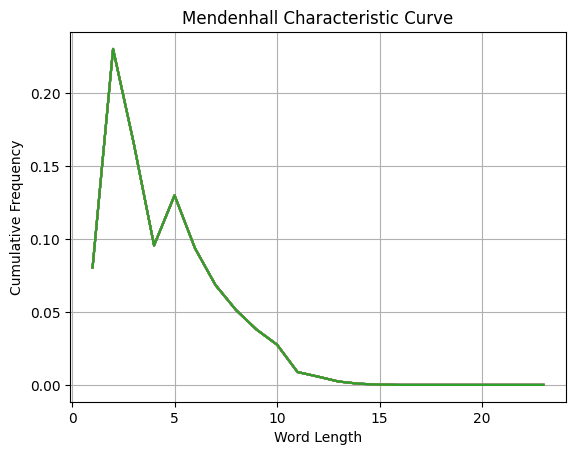

New current author: Cristóbal Suárez de Figueroa


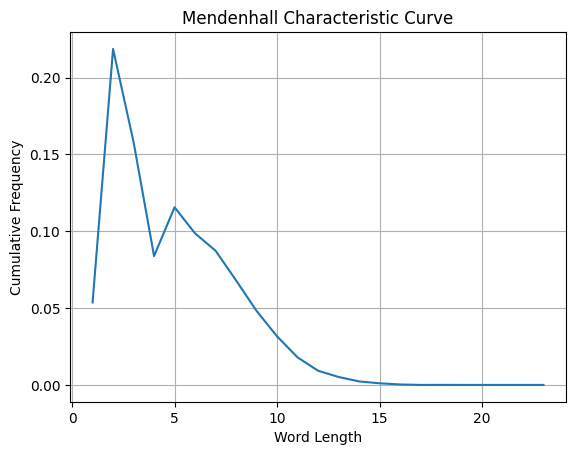

New current author: Guillén de Castro


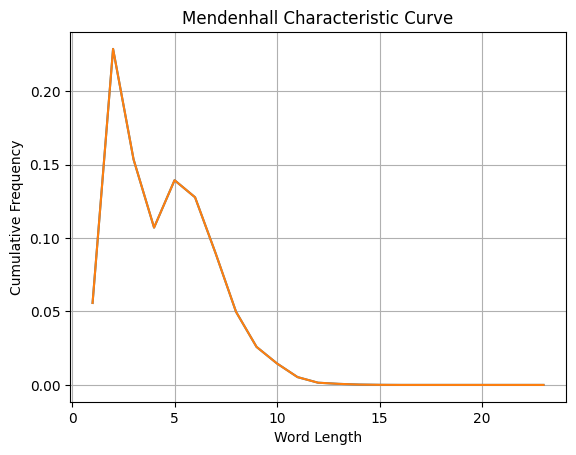

New current author: Juan Ruiz de Alarcón y Mendoza


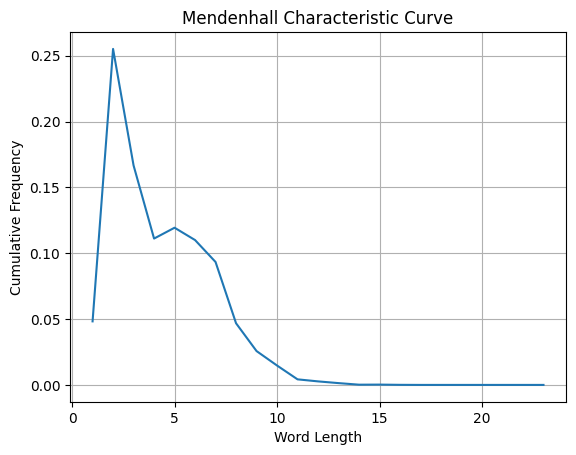

New current author: Lope de Vega


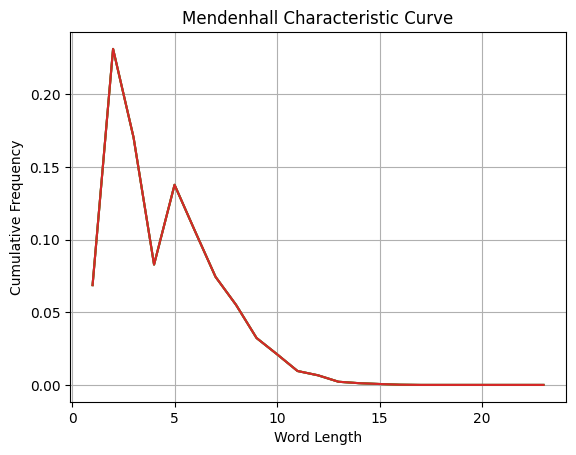

New current author: Mateo Alemán


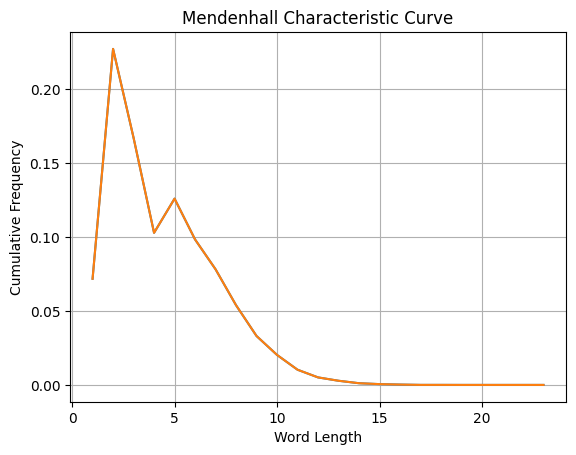

New current author: Pasamonte


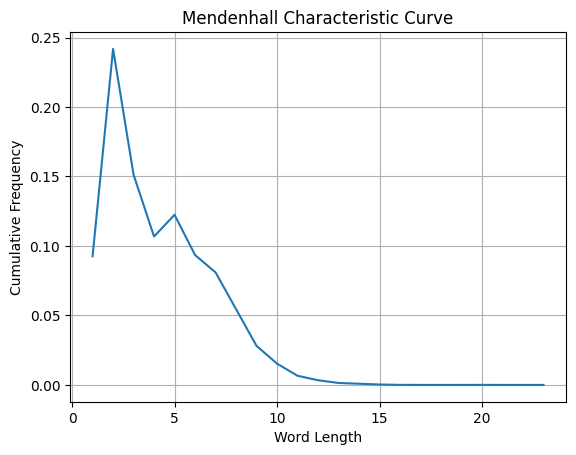

New current author: Pérez de Hita


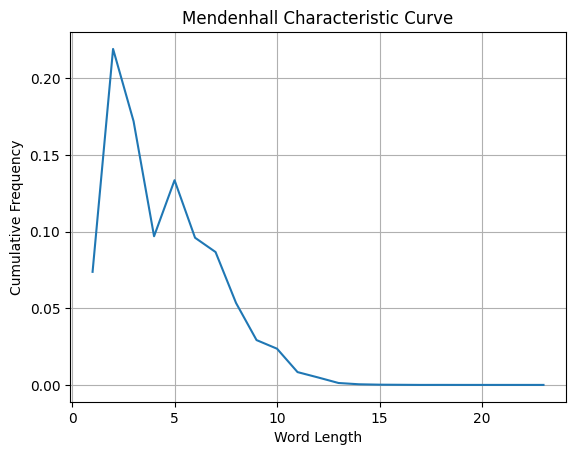

New current author: Quevedo


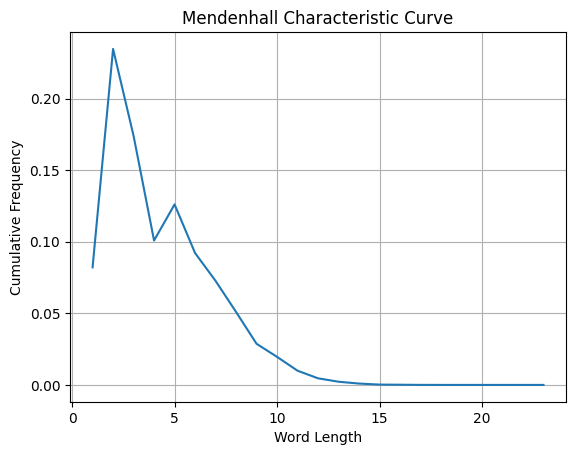

New current author: Tirso de Molina


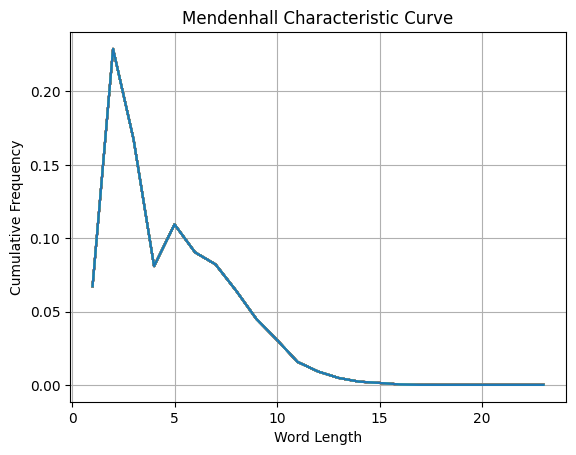

In [4]:
from features import FeaturesMendenhall
mendenhall = FeaturesMendenhall()
for i,(doc, author) in enumerate(zip(documents,authors)):
    if i ==0:
        current_author = author
        doc_per_auth=list()
        doc_per_auth.append(doc)
        print('Current author:', current_author)
    else:
        if author == current_author:
            doc_per_auth.append(doc)

        else:
            mendenhall.plot_characteristic_curve(doc_per_auth, path=f"/home/martinaleo/.ssh/authorship/src/Base_clf_cm/{current_author}_mendenhall_curve.pdf")
            plt.show()
            current_author = author
            doc_per_auth=list()
            doc_per_auth.append(doc)
            print('New current author:', current_author)

# mendenhall.plot_characteristic_curve(documents, path="/home/martinaleo/.ssh/authorship/src/Base_clf_cm/mendenhall_curve.pdf")
# plt.show()

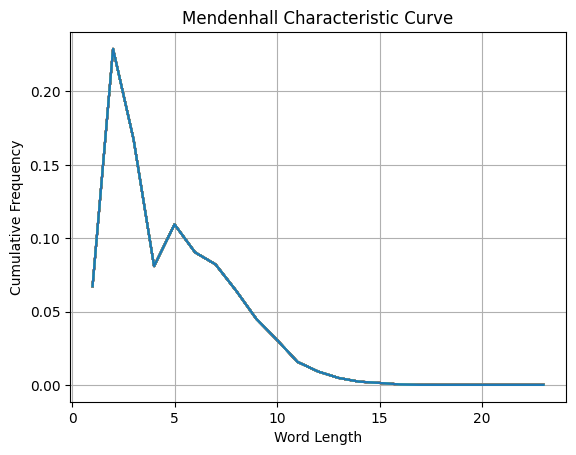

In [5]:
mendenhall.plot_characteristic_curve(documents, path="/home/martinaleo/.ssh/authorship/src/Base_clf_cm/mendenhall_curve.pdf")
plt.show()

Current author: Agustín de Rojas Villandrando


/home/martinaleo/.ssh/authorship/src/data/features.py:120: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


New current author: Alonso de Castillo Solórzano


/home/martinaleo/.ssh/authorship/src/data/features.py:120: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


New current author: Avellaneda


/home/martinaleo/.ssh/authorship/src/data/features.py:120: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


New current author: Cervantes


/home/martinaleo/.ssh/authorship/src/data/features.py:120: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


New current author: Cristóbal Suárez de Figueroa


/home/martinaleo/.ssh/authorship/src/data/features.py:120: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


New current author: Guillén de Castro


/home/martinaleo/.ssh/authorship/src/data/features.py:120: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


New current author: Juan Ruiz de Alarcón y Mendoza


/home/martinaleo/.ssh/authorship/src/data/features.py:120: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


New current author: Lope de Vega


/home/martinaleo/.ssh/authorship/src/data/features.py:120: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


New current author: Mateo Alemán


/home/martinaleo/.ssh/authorship/src/data/features.py:120: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


New current author: Pasamonte


/home/martinaleo/.ssh/authorship/src/data/features.py:120: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


New current author: Pérez de Hita


/home/martinaleo/.ssh/authorship/src/data/features.py:120: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


New current author: Quevedo


/home/martinaleo/.ssh/authorship/src/data/features.py:120: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


New current author: Tirso de Molina


/home/martinaleo/.ssh/authorship/src/data/features.py:120: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)
/home/martinaleo/.ssh/authorship/src/data/features.py:120: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


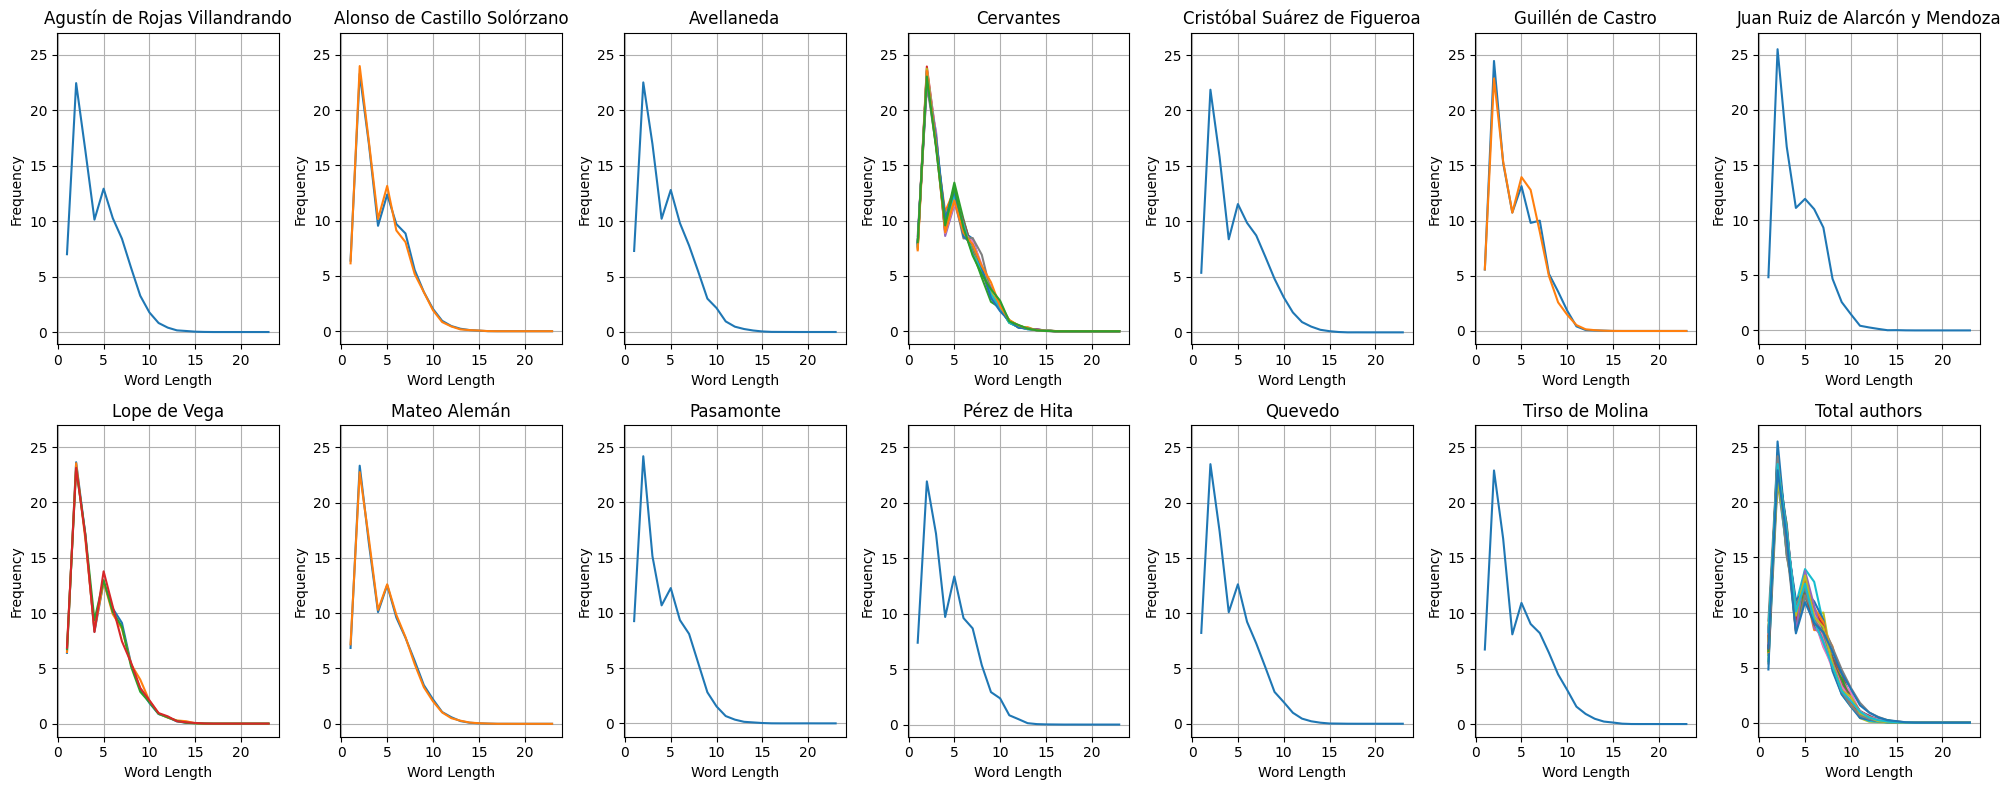

In [6]:
#from features import FeaturesMendenhall
rows = 2
cols = 7

fig, axes = plt.subplots(rows, cols, figsize=(20, 8))
path='/home/martinaleo/.ssh/authorship/src/data_understanding_vis/mendenhall_curves.pdf'

# Flatten axes if only one row or column
if rows == 1 and cols == 1:
    axes = [axes]

mendenhall = FeaturesMendenhall()

current_row = 0
current_col = 0

for i, (doc, author) in enumerate(zip(documents, authors)):
    if current_col >= cols:
        current_row += 1
        current_col = 0
    if current_row >= rows:
        break

    if i == 0:
        current_author = author
        doc_per_auth = [doc]
        print('Current author:', current_author)
    else:
        if author == current_author:
            doc_per_auth.append(doc)
        else:
            mendenhall.plot_characteristic_curve(doc_per_auth, ax=axes[current_row, current_col], path=path, title=current_author)
            current_author = author
            doc_per_auth = [doc]
            current_col += 1
            print('New current author:', current_author)

# If there are remaining authors with no plots
if doc_per_auth:
    mendenhall.plot_characteristic_curve(doc_per_auth, ax=axes[current_row, current_col], path=path, title=current_author)

mendenhall.plot_characteristic_curve(documents, ax=axes[current_row, current_col+1], path=path, title='Total authors')

# Adjust layout
plt.tight_layout()
plt.savefig('/home/martinaleo/.ssh/authorship/src/data_understanding_vis/mendenhall_curves3.pdf', dpi=300, bbox_inches="tight")
plt.show()

Current author: Agustín de Rojas Villandrando
New current author: Alonso de Castillo Solórzano
New current author: Avellaneda
New current author: Cervantes
New current author: Cristóbal Suárez de Figueroa
New current author: Guillén de Castro
New current author: Juan Ruiz de Alarcón y Mendoza
New current author: Lope de Vega
New current author: Mateo Alemán
New current author: Pasamonte
New current author: Pérez de Hita
New current author: Quevedo
New current author: Tirso de Molina


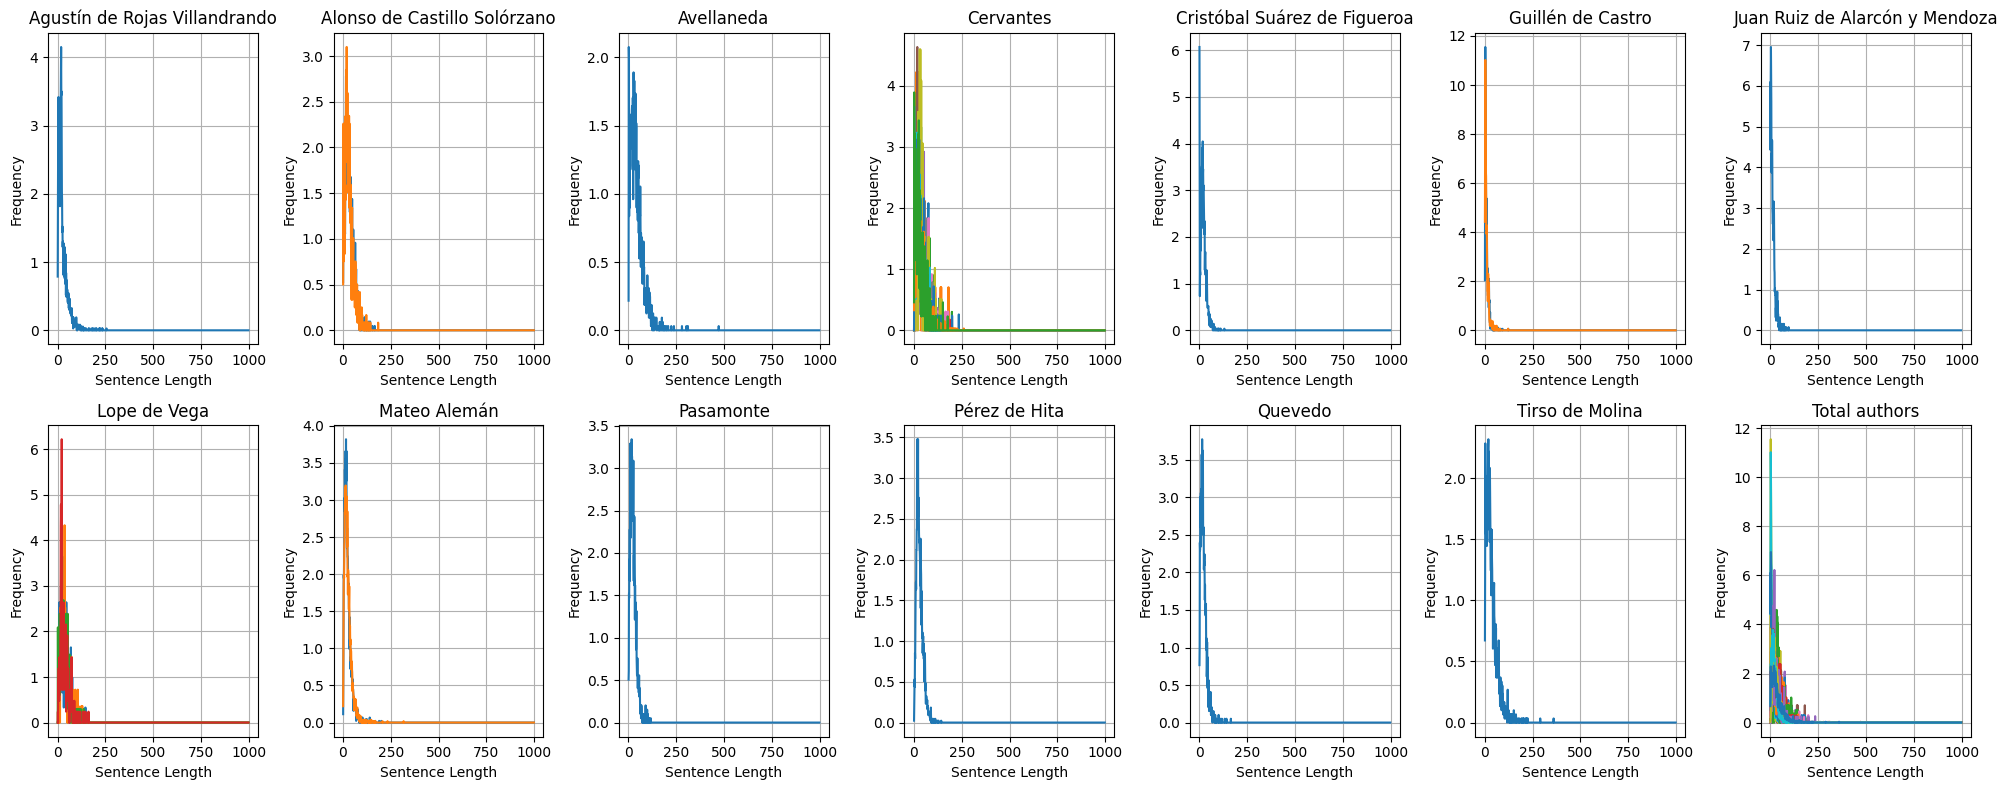

In [6]:
#from features import FeaturesMendenhall
rows = 2
cols = 7

fig, axes = plt.subplots(rows, cols, figsize=(20, 8))
path='/home/martinaleo/.ssh/authorship/src/data_understanding_vis/sentences_curves.pdf'

# Flatten axes if only one row or column
if rows == 1 and cols == 1:
    axes = [axes]

mendenhall = FeaturesSentenceLength()

current_row = 0
current_col = 0

for i, (doc, author) in enumerate(zip(documents, authors)):
    if current_col >= cols:
        current_row += 1
        current_col = 0
    if current_row >= rows:
        break

    if i == 0:
        current_author = author
        doc_per_auth = [doc]
        print('Current author:', current_author)
    else:
        if author == current_author:
            doc_per_auth.append(doc)
        else:
            mendenhall.plot_characteristic_curve(doc_per_auth, ax=axes[current_row, current_col], path=path, title=current_author)
            current_author = author
            doc_per_auth = [doc]
            current_col += 1
            print('New current author:', current_author)

# If there are remaining authors with no plots
if doc_per_auth:
    mendenhall.plot_characteristic_curve(doc_per_auth, ax=axes[current_row, current_col], path=path, title=current_author)

mendenhall.plot_characteristic_curve(documents, ax=axes[current_row, current_col+1], path=path, title='Total authors')

# Adjust layout
plt.tight_layout()
plt.savefig('/home/martinaleo/.ssh/authorship/src/data_understanding_vis/sent_curves.pdf', dpi=300, bbox_inches="tight")
plt.show()

In [7]:
plt.tight_layout()
plt.savefig('/home/martinaleo/.ssh/authorship/src/data_understanding_vis/sent_curves.pdf', dpi=300, bbox_inches="tight")
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:

mendenhall.plot_characteristic_curve(documents, ax=axes[current_row, current_col+1], path=path, title='Total authors')

# Adjust layout
plt.tight_layout()
plt.savefig('/home/martinaleo/.ssh/authorship/src/data_understanding_vis/mendenhall_curves3.pdf', dpi=300, bbox_inches="tight")
plt.show()

Current author: Agustín de Rojas Villandrando
New current author: Alonso de Castillo Solórzano
New current author: Avellaneda
New current author: Cervantes
New current author: Cristóbal Suárez de Figueroa
New current author: Guillén de Castro
New current author: Juan Ruiz de Alarcón y Mendoza
New current author: Lope de Vega
New current author: Mateo Alemán
New current author: Pasamonte
New current author: Pérez de Hita
New current author: Quevedo
New current author: Tirso de Molina


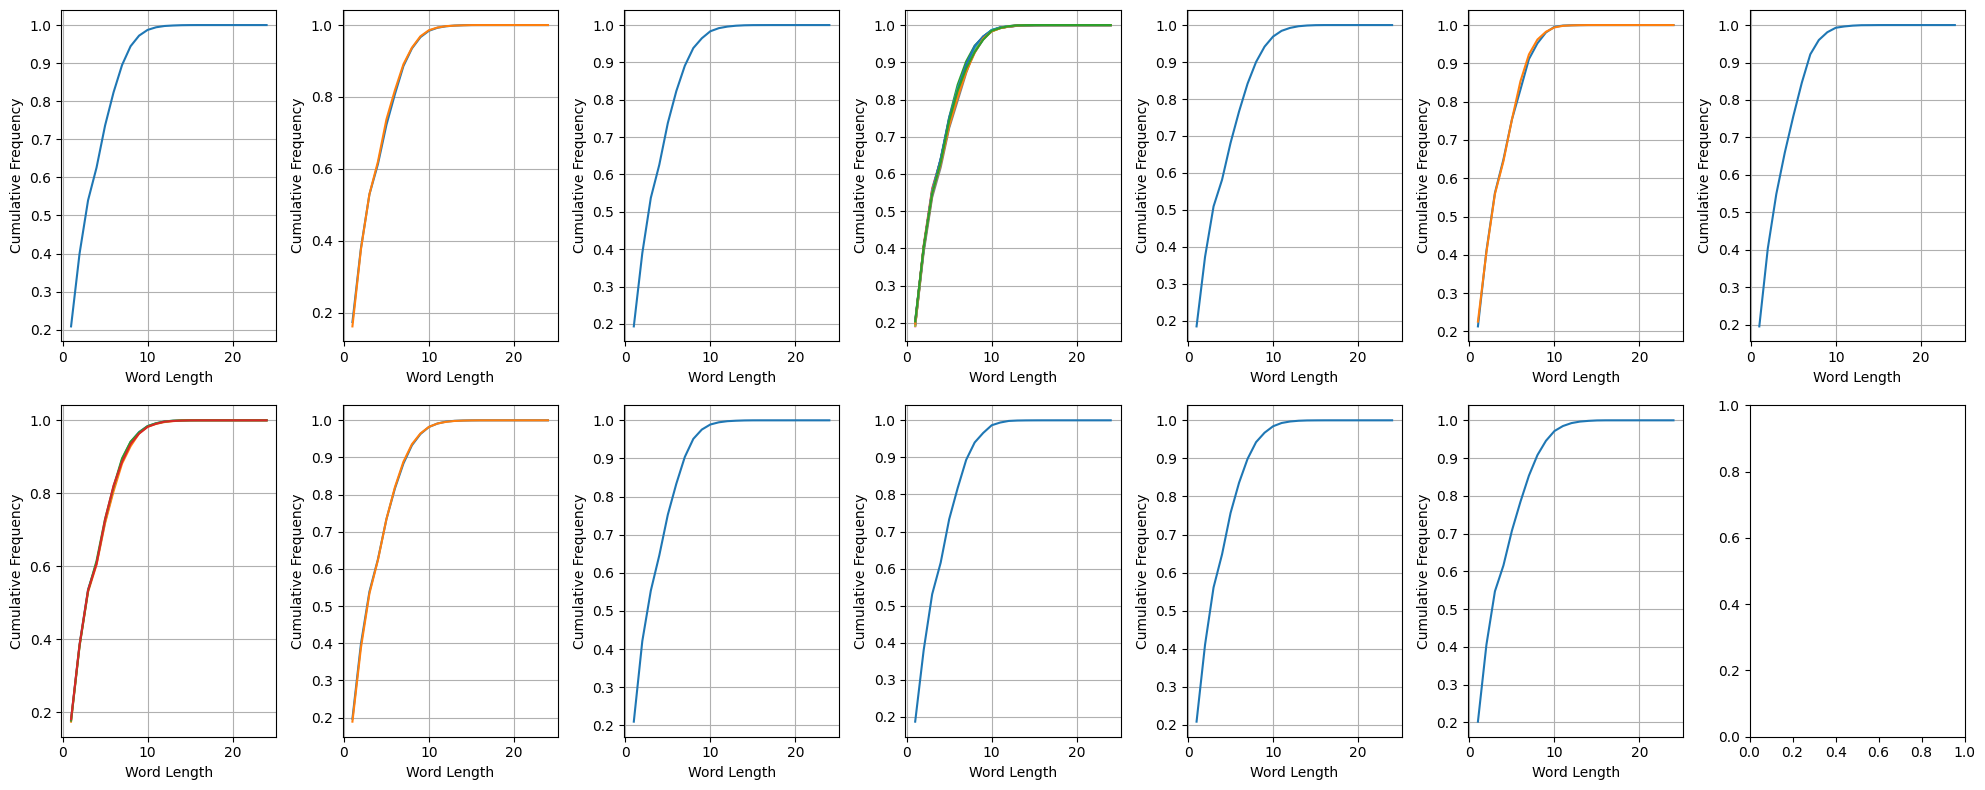

In [8]:
import matplotlib.pyplot as plt
import nltk

class FeaturesMendenhall:
    """
    Extract features as the frequency of the words' lengths used in the documents,
    following the idea behind Mendenhall's Characteristic Curve of Composition
    """
    def __init__(self, upto=25):
        self.upto = upto

    def __str__(self) -> str:
        return 'FeaturesMendenhall'

    def fit(self, documents, y=None):
        return self

    def transform(self, documents, y=None):
        features = []
        for text in documents:
            word_lengths = [len(token) for token in nltk.word_tokenize(text)]
            hist, bins = np.histogram(word_lengths, bins=np.arange(1, self.upto+1), density=True)
            distribution = np.cumsum(hist)
            features.append(distribution)
        return np.asarray(features)

    def fit_transform(self, documents, y=None):
        return self.fit(documents).transform(documents)

    def plot_characteristic_curve(self, documents, ax):
        """
        Plots the characteristic curve of Mendenhall's distribution for the given documents
        on the specified axis.
        """
        distributions = self.transform(documents)
        for distribution in distributions:
            ax.plot(range(1, len(distribution) + 1), distribution)
        ax.set_xlabel('Word Length')
        ax.set_ylabel('Cumulative Frequency')
        ax.grid(True)

# Number of rows and columns for subplot arrangement
rows = 2
cols = 7

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 8))

# Flatten axes if only one row or column
if rows == 1 and cols == 1:
    axes = [axes]

mendenhall = FeaturesMendenhall()

current_row = 0
current_col = 0

for i, (doc, author) in enumerate(zip(documents, authors)):
    if current_col >= cols:
        current_row += 1
        current_col = 0
    if current_row >= rows:
        break

    if i == 0:
        current_author = author
        doc_per_auth = [doc]
        print('Current author:', current_author)
    else:
        if author == current_author:
            doc_per_auth.append(doc)
        else:
            mendenhall.plot_characteristic_curve(doc_per_auth, axes[current_row, current_col])
            current_author = author
            doc_per_auth = [doc]
            current_col += 1
            print('New current author:', current_author)

# If there are remaining authors with no plots
if doc_per_auth:
    mendenhall.plot_characteristic_curve(doc_per_auth, axes[current_row, current_col])

# Adjust layout
plt.tight_layout()
plt.savefig('/home/martinaleo/.ssh/authorship/src/data_understanding_vis/mendenhall_curves.pdf', dpi=300, bbox_inches="tight")
plt.show()


In [31]:
len(authors), len(documents)


(31, 31)

In [29]:
positive_class_dev = np.sum(y_dev)
negative_class_dev = len(y_dev) - positive_class_dev
pos_ratio_dev = round(positive_class_dev / len(y_dev), 2)

positive_class_test = np.sum(y_test)
negative_class_test = len(y_test) - positive_class_test
pos_ratio_test = round(positive_class_test / len(y_test), 2)

tot_pos_ratio = (positive_class_dev + positive_class_test) / len(y)

print(f'Positive samples: {positive_class_dev}')
print(f'Negative samples: {negative_class_dev}')
print()
print(f'Positive samples: {positive_class_test}')
print(f'Negative samples: {negative_class_test}')

Positive samples: 9
Negative samples: 12

Positive samples: 4
Negative samples: 6


In [30]:
print('Positive samples ratio:', 
    '\nTrain:', pos_ratio_dev, 
    '\nTest:', pos_ratio_test, 
    '\nWhole dataset:',tot_pos_ratio)

Positive samples ratio: 
Train: 0.43 
Test: 0.4 
Whole dataset: 0.41935483870967744


In [31]:
from splitting__ import Segmentation
min_tokens = 500

segmentator_dev = Segmentation(split_policy='by_sentence', tokens_per_fragment=min_tokens)
splitted_docs_dev = segmentator_dev.fit_transform(documents=X_dev, authors=y_dev)
groups_dev = segmentator_dev.groups
# lista composta da due liste, una contenente le frasi, una contenente gli autori

generating fragments:   0%|          | 0/21 [00:00<?, ?it/s]

generating fragments: 100%|██████████| 21/21 [01:08<00:00,  3.27s/it]


In [32]:
len(groups_dev) # la segmentazione restituisce sia i documenti per intero che quelli frammentati

2406

In [33]:
segmentator_test = Segmentation(split_policy='by_sentence', tokens_per_fragment=min_tokens)
splitted_docs_test = segmentator_test.transform(documents=X_test, authors=y_test)
groups_test = segmentator_test.groups

generating fragments:   0%|          | 0/10 [00:00<?, ?it/s]

generating fragments: 100%|██████████| 10/10 [00:29<00:00,  2.93s/it]


In [34]:
# set per interi documenti
whole_docs_test = splitted_docs_test[0][:10]
whole_docs_y_test = splitted_docs_test[1][:10]
whole_docs_groups_test = groups_test[:10]

# set per documenti frammentati
fragmented_docs_test = splitted_docs_test[0][10:]
fragmented_docs_y_test = splitted_docs_test[1][10:]
fragmented_docs_groups_test = groups_test[10:]

In [35]:
print((len(splitted_docs_dev[0]), len(splitted_docs_dev[1]), len(groups_dev)),
(len(splitted_docs_test[0]), len(splitted_docs_test[1]), len(groups_test)))

(2406, 2406, 2406) (718, 718, 718)


In [36]:
np.unique(splitted_docs_dev[1], return_counts=True), np.unique(splitted_docs_test[1], return_counts=True)

((array([0, 1]), array([1814,  592])), (array([0, 1]), array([594, 124])))

In [37]:
dev_pos_class_ratio = np.sum(splitted_docs_dev[1]) / len(splitted_docs_dev[1])
test_pos_class_ratio = np.sum(splitted_docs_test[1]) / len(splitted_docs_test[1])
tot_pos_class_ratio = (np.sum(splitted_docs_dev[1]) + np.sum(splitted_docs_test[1])) / (len(splitted_docs_dev[1]) + len(splitted_docs_test[1]))

In [38]:
print('Positive samples ratio:', 
      '\nTrain:', dev_pos_class_ratio, 
      '\nTest:', test_pos_class_ratio,
      '\nWhole dataset:', tot_pos_class_ratio)

Positive samples ratio: 
Train: 0.2460515378221114 
Test: 0.17270194986072424 
Whole dataset: 0.22919334186939821


In [39]:
X_dev = splitted_docs_dev[0]
y_dev = splitted_docs_dev[1]
groups_dev = segmentator_dev.groups

X_test = whole_docs_test
y_test = whole_docs_y_test
groups_test = whole_docs_groups_test

X_test_frag = fragmented_docs_test
y_test_frag = fragmented_docs_y_test
groups_test_frag = fragmented_docs_groups_test
#y__ = list(zip(splitted_docs[1], groups))

len(X_dev), len(y_dev), len(groups_dev),len(X_test), len(y_test), len(groups_test)

(2406, 2406, 2406, 10, 10, 10)

# Data Preparation

In [1]:
fuction_ws = get_function_words(lang='spanish')

NameError: name 'get_function_words' is not defined

In [41]:
# vectorizers
function_words_extractor = FeaturesFunctionWords(language='spanish')
mendenhall_extractor = FeaturesMendenhall(upto=20)
words_masker = FeaturesDVEX(function_words=fuction_ws)
sentence_len_extractor = FeaturesSentenceLength()
POS_extractor = FeaturesPOST(language='spanish')

loading cache from .postcache/dict.pkl


In [42]:
len(X_dev), len(y_dev)

(2406, 2406)

In [43]:
%%time
fw_reductor = FeatureSetReductor(function_words_extractor) 
fw_red = fw_reductor.fit_transform(X_dev, authors=y_dev)
fw_red_test = fw_reductor.transform(X_test)

sl_reductor = FeatureSetReductor(sentence_len_extractor) 
sl_red = sl_reductor.fit_transform(documents=X_dev, authors=y_dev)
sl_red_test = sl_reductor.transform(X_test)

me_reductor = FeatureSetReductor(mendenhall_extractor)
me_red = me_reductor.fit_transform(X_dev, authors=y_dev)
me_red_test = me_reductor.transform(X_test)

wm_reductor = FeatureSetReductor(words_masker)
wm_red = wm_reductor.fit_transform(X_dev, authors=y_dev)
wm_red_test = wm_reductor.transform(X_test)

pos_reductor = FeatureSetReductor(POS_extractor)
pos_red = pos_reductor.fit_transform(X_dev, authors=y_dev)
pos_red_test = pos_reductor.transform(X_test)


FeatureSetReductor for FeaturesFunctionWords
features in: 313 k: 156

FeatureSetReductor for FeaturesSentenceLength
features in: 998 k: 499

FeatureSetReductor for FeaturesMendenhall
features in: 18 k: 18

FeatureSetReductor for FeaturesDVEX
features in: 387 k: 194

FeatureSetReductor for FeaturesPOST
features in: 9 k: 9

CPU times: user 2min 15s, sys: 828 ms, total: 2min 16s
Wall time: 2min 15s


In [44]:
%%time
fw_red_test_fragments = fw_reductor.transform(X_test_frag)
sl_red_test_fragments = sl_reductor.transform(X_test_frag)
me_red_test_fragments = me_reductor.transform(X_test_frag)
wm_red_test_fragments = wm_reductor.transform(X_test_frag)
pos_red_test_fragments = pos_reductor.transform(X_test_frag)

CPU times: user 10.7 s, sys: 0 ns, total: 10.7 s
Wall time: 10.7 s


In [45]:
# from sklearn.preprocessing import Normalizer # new!

# def l2_normalize(features, features_test):
#     normalizer = Normalizer()
#     features_norm = normalizer.fit_transform(features)
#     features_norm_test = normalizer.transform(features_test)
#     return features_norm, features_norm_test

In [46]:
# fw_norm, fw_norm_test = l2_normalize(fw_red, fw_red_test)
# me_norm, me_norm_test = l2_normalize(me_red, me_red_test)
# wm_norm, wm_norm_test = l2_normalize(wm_red, wm_red_test)
# pos_norm, pos_norm_test = l2_normalize(pos_red, pos_red_test)

In [47]:
hstacker = HstackFeatureSet(function_words_extractor, words_masker, mendenhall_extractor, POS_extractor, sentence_len_extractor)
hstacked_features = hstacker._hstack([fw_red, me_red, wm_red, pos_red, sl_red])
# #hstacked_features = hstacker._hstack([fw_norm, me_norm, wm_norm, pos_norm])

In [48]:
hstacked_features_test = hstacker._hstack([fw_red_test, me_red_test, wm_red_test, pos_red_test, sl_red_test])
#hstacked_features_test = hstacker._hstack([fw_norm_test, me_norm_test, wm_norm_test, pos_norm_test])

In [49]:
hstacked_features_test_frag = hstacker._hstack([fw_red_test_fragments, me_red_test_fragments, wm_red_test_fragments, pos_red_test_fragments, sl_red_test_fragments])

# Model Building

In [50]:
def build_model(X_dev, y_dev, groups, X_test, model=None, print_scores=True, param_grid=None, pipe=False, feature_extractor=None, return_proba=True):
    
    n_folds = 5

    if not model:
        clf = LinearSVC(random_state=42, class_weight='balanced', max_iter=10000)
        clf = CalibratedClassifierCV(clf) if return_proba else clf
        
    if param_grid:
        if not pipe:
            pipe = Pipeline([('learner', clf)])
        else:
            pipe = Pipeline([
                ('sel', SelectKBest(chi2)),
                ('learner', clf)  # learning algorithm
                ])

        grid = GridSearchCV(
            pipe,
            param_grid=param_grid,
            cv=n_folds,
            n_jobs=-1,
            scoring='f1_weighted')
        grid.fit(X_dev, y_dev, groups=groups)
        clf = grid.best_estimator_
        
    if return_proba:
        y_proba_dev = clf.predict_proba(X_dev)[:, 1] # posterior probabilities training set
        y_proba_test = clf.predict_proba(X_test)[:, 1] # posterior probabilities test set
          
    y_pred = clf.predict(X_test)

    if print_scores:
        if not param_grid:
            scores = cross_val_score(clf, X_dev, y_dev, cv=n_folds, groups=groups)
            print(feature_extractor)
            print('Accuracy score:',scores.mean(), 'Std:', scores.std())
            print()
        else:
            print(feature_extractor)
            print('Best estimator:', grid.best_estimator_, '\nBest score:',grid.best_score_)
            print()
    return clf, y_pred, grid.best_score_, y_proba_dev, y_proba_test


In [51]:
def ensemble(predictions, y_test, threshold=0.5, majority_vote=False):
    if majority_vote:
        y_pred_ensemble = np.sum(predictions, axis=0)/len(predictions)
        y_pred_ensemble = [1 if pred >= threshold else 0 for pred in y_pred_ensemble]
        weighted_f1 = f1_score(y_pred_ensemble, y_test, average='weighted')

    else:
        f1_scores = {f1_score(y_test, y_pred, average='weighted'):y_pred for y_pred in predictions}
        weighted_preds = [[score*pred for pred in preds] for score,preds in f1_scores.items()] # pesa ogni predizione in base all'f1 score del classificatore
        y_pred_ensemble = np.sum(weighted_preds, axis=0)/len(predictions) # per ogni predizione pesata per ogni istanza, somma le predizioni e le divide per il numero di classificatori
        #y_pred_ensemble = [round(pred) for pred in y_pred_ensemble]
        y_pred_ensemble = [1 if pred >= threshold else 0 for pred in y_pred_ensemble] # binarizza output
        weighted_f1 = f1_score(y_pred_ensemble, y_test, average='weighted')

    return y_pred_ensemble, weighted_f1


def ensamble_prob(probabilities, y_test, threshold=0.5):
    probs_sum = np.sum(probabilities, axis=0)/len(probabilities)
    #f1_score(y_test,[1 if prob > 0.2 else 0 for prob in probs_sum])
    class_report= classification_report(y_test,[1 if prob >= threshold else 0 for prob in probs_sum])
    y_pred=[1 if prob >= threshold else 0 for prob in probs_sum]
    weighted_f1 = f1_score(y_pred, y_test, average='weighted')
    return class_report, y_pred, weighted_f1


def ensamble_prob_weighted(probabilities, y_test, single_threshold=0.5, threshold=0.5):
    predictions=[[1 if prob >= single_threshold else 0 for prob in prob_set] for prob_set in probabilities]
    f1_scores = {f1_score(y_test, prob_set, average='weighted', zero_division=np.nan):prob_set for prob_set in predictions}
    weighted_probs = [[prob*f1 for prob in prob_set] for f1,prob_set in f1_scores.items()]
    probs_sum = np.sum(weighted_probs, axis=0)/len(weighted_probs)
    #f1_score(y_test,[1 if prob > 0.2 else 0 for prob in probs_sum])
    class_report= classification_report(y_test,[1 if prob >= threshold else 0 for prob in probs_sum])
    y_pred=[1 if prob >= threshold else 0 for prob in probs_sum]
    weighted_f1 = f1_score(y_pred, y_test, average='weighted')
    return class_report, y_pred, weighted_f1

In [52]:
def fit_base_clf(clf, X_dev, y_dev, X_test_tot, groups, fun_kfcv=False):
    
    # clf = CalibratedClassifierCV(clf)
    
    if fun_kfcv:
        num_folds = 5
        stratkf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
        y_proba_dev_pos = np.zeros_like(y_dev)
        y_proba_dev_neg = np.zeros_like(y_dev)
        y_proba_test_fold_pos = list()
        y_proba_test_fold_neg = list()
        y_dev_np = np.array(y_dev)

        for train_index, test_index in stratkf.split(X_dev, y_dev_np, groups=groups):
            X_train, X_test = X_dev[train_index], X_dev[test_index]
            y_train, y_test = y_dev_np[train_index], y_dev_np[test_index]

            clf_fold = CalibratedClassifierCV(clf)
            
            clf_fold.fit(X_train, y_train)
            y_proba_dev_pos[test_index] = clf_fold.predict_proba(X_test)[:, 1]
            y_proba_dev_neg[test_index] = clf_fold.predict_proba(X_test)[:, 0]
            y_proba_test_fold_pos.append(clf_fold.predict_proba(X_test_tot)[:, 1])
            y_proba_test_fold_neg.append(clf_fold.predict_proba(X_test_tot)[:, 0])
            
        #y_proba_test = clf.predict_proba(X_test_tot)[:, 1]
        y_proba_test_pos= np.sum(y_proba_test_fold_pos, axis=0)/num_folds
        y_proba_test_neg= np.sum(y_proba_test_fold_neg, axis=0)/num_folds

        y_proba_dev = np.column_stack([y_proba_dev_pos, y_proba_dev_neg])
        y_proba_test= np.column_stack([y_proba_test_pos, y_proba_test_neg])

            
    else: 
        # Fun tat
        clf = CalibratedClassifierCV(clf)
        clf.fit(X_dev, y_dev)
        y_proba_dev_pos = clf.predict_proba(X_dev)[:, 1]
        y_proba_dev_neg = clf.predict_proba(X_dev)[:, 0]
        y_proba_test_pos = clf.predict_proba(X_test_tot)[:, 1]
        y_proba_test_neg = clf.predict_proba(X_test_tot)[:, 0]
        y_proba_dev = np.column_stack([y_proba_dev_pos, y_proba_dev_neg])
        y_proba_test = np.column_stack([y_proba_test_pos, y_proba_test_neg])
                                             

        #y_pred_dev = clf.predict(X_dev)
        

    return y_proba_dev, y_proba_test

In [53]:
def stacking_classification(final_estimator, posterior_proba_dev, y_dev, param_grid, groups):
    
    if not final_estimator:
        final_estimator = SVC(class_weight='balanced', random_state=42)

    # stacked_clf = StackingClassifier(
    #     estimators=estimators,
    #     final_estimator=final_estimator,
    #     n_jobs=-1,
    #     cv='prefit'
    # )
    grid = GridSearchCV(
            final_estimator,
            param_grid=param_grid,
            cv=5,
            n_jobs=-1,
            scoring='f1_weighted')
    
    grid.fit(posterior_proba_dev, y_dev, groups=groups)

    clf = grid.best_estimator_
    print(clf, grid.best_score_)
    return clf

## Ensemble & Hyperparameter search

In [54]:
res_df = pd.DataFrame(columns=['Grid', 'Ensemble', 'Stacked', 'Pipeline', 'With_proba','Weighted', 'Whole_docs', 'F1_weighted'])
idx_res=0

### whole docs

In [55]:
param_grid= {'learner__estimator__C': [0.1, 1, 10, 100],
             'learner__estimator__dual': ['auto'],
             'learner__estimator__random_state': [0]}

fw_clf, fw_pred, fw_score, fw_yproba_dev,fw_yproba_test = build_model(feature_extractor=fw_reductor, X_dev=fw_red, y_dev=y_dev, groups=groups_dev, X_test=fw_red_test,param_grid=param_grid)
me_clf, me_pred, me_score, me_yproba_dev, me_yproba_test = build_model(feature_extractor=me_reductor, X_dev=me_red, y_dev=y_dev, groups=groups_dev, X_test=me_red_test,param_grid=param_grid)
wm_clf, wm_pred, wm_score, wm_yproba_dev, wm_yproba_test = build_model(feature_extractor=wm_reductor, X_dev=wm_red, y_dev=y_dev, groups=groups_dev, X_test=wm_red_test,param_grid=param_grid)
pos_clf, pos_pred, pos_score, pos_yproba_dev, pos_yproba_test = build_model(feature_extractor=pos_reductor, X_dev=pos_red, y_dev=y_dev, groups=groups_dev, X_test=pos_red_test,param_grid=param_grid)
sl_clf, sl_pred, sl_score, sl_yproba_dev, sl_yproba_test = build_model(feature_extractor=sl_reductor, X_dev=sl_red, y_dev=y_dev, groups=groups_dev, X_test=sl_red_test,param_grid=param_grid)

FeatureSetReductor for FeaturesFunctionWords
Best estimator: Pipeline(steps=[('learner',
                 CalibratedClassifierCV(estimator=LinearSVC(C=10,
                                                            class_weight='balanced',
                                                            dual='auto',
                                                            max_iter=10000,
                                                            random_state=0)))]) 
Best score: 0.7920410717040383

FeatureSetReductor for FeaturesMendenhall
Best estimator: Pipeline(steps=[('learner',
                 CalibratedClassifierCV(estimator=LinearSVC(C=100,
                                                            class_weight='balanced',
                                                            dual='auto',
                                                            max_iter=10000,
                                                            random_state=0)))]) 
Best score: 0.6633749101903936

#### stacking classifier - fun(tat)

In [56]:
base_clfs = [LinearSVC(random_state=42, class_weight='balanced', max_iter=10000, dual='auto') for i in range(5)]
feature_spaces = [fw_red,sl_red,me_red,wm_red,pos_red]
feature_spaces_test = [fw_red_test,sl_red_test,me_red_test,wm_red_test,pos_red_test]
posterior_probs = [fit_base_clf(clf, feature_spaces[i], y_dev,feature_spaces_test[i], groups=groups_dev) for i, clf in enumerate(base_clfs)]
#clf_names= ['fw_clf','sl_clf','me_clf','wm_clf','pos_clf' ]
#estimators = [(clf_names[i], fitted_clf) for i, (fitted_clf,_,_) in enumerate(posterior_probs)]
probs_unstacked_dev = [proba for proba,_ in posterior_probs]
probs_unstacked_test = [proba for _, proba in posterior_probs]
posterior_probs_dev = np.column_stack([prob for prob in probs_unstacked_dev])
posterior_probs_test = np.column_stack([prob for prob in probs_unstacked_test])
final_estimator = SVC(class_weight='balanced', random_state=42)

param_grid = [{
    'kernel': ['rbf', 'sigmoid'],
    'C' : [0.1, 1, 10, 100],
    'gamma' : [0.0001, 0.001, 0.1, 1, 'scale', 'auto']
},
{
    'kernel' : ['poly'],
    'C' : [0.1, 1, 10, 100],
    'degree': [1, 2, 3, 4, 5],
    'gamma' : [0.0001, 0.001, 0.1, 1, 'scale', 'auto']
}]

stacking_classifier = stacking_classification(final_estimator, posterior_probs_dev, y_dev, param_grid, groups_dev)

SVC(C=100, class_weight='balanced', degree=1, gamma=1, kernel='poly',
    random_state=42) 0.8811135933333446


In [57]:
#posterior_probs_test = np.column_stack([fw_yproba_test,sl_yproba_test,me_yproba_test,wm_yproba_test,pos_yproba_test])
#posterior_probs_test = np.column_stack(probs for probs in posterior_probs_test_)
clf = stacking_classifier
#clf.fit(posterior_probs_dev, y_dev)
y_pred = clf.predict(posterior_probs_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print('Results on whole documents:') 
print('Accuracy (on whole documents):', acc) 
print('Weighted f1:',f1)
print()

Results on whole documents:
Accuracy (on whole documents): 1.0
Weighted f1: 1.0



In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [59]:
res_df.loc[idx_res] = {'Grid':0,
                'Ensemble': 1,
                'Stacked': 1,
                'Pipeline': 0, 
                'With_proba': 0,
                'Weighted': 0, 
                'Whole_docs': 1,
                'F1_weighted': round(f1, 2)
}
idx_res+=1
res_df.shape

(1, 8)

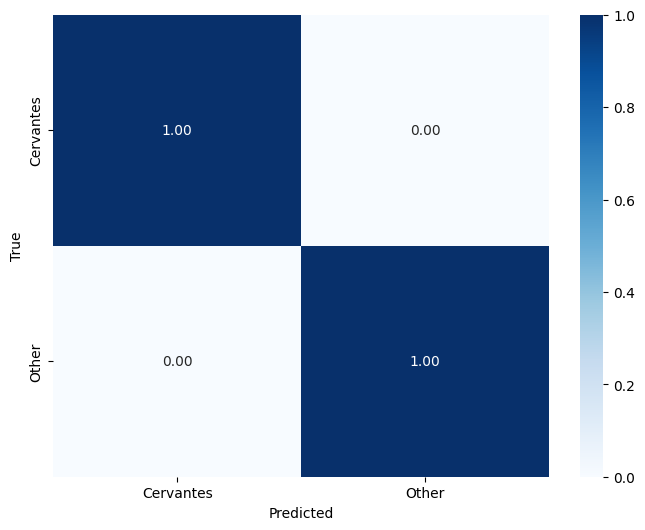

In [60]:
plt.subplots(figsize=(8,6))
cf = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cf, annot=True, fmt='.2f', cmap="Blues", xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#### stacking classifier - fun(kfcv)

In [61]:
base_clfs = [LinearSVC(random_state=42, class_weight='balanced', max_iter=10000, dual='auto') for i in range(5)]
feature_spaces = [fw_red,sl_red,me_red,wm_red,pos_red]
feature_spaces_test = [fw_red_test,sl_red_test,me_red_test,wm_red_test,pos_red_test]
posterior_probs = [fit_base_clf(clf, feature_spaces[i], y_dev,feature_spaces_test[i], groups=groups_dev, fun_kfcv=True) for i, clf in enumerate(base_clfs)]
#clf_names= ['fw_clf','sl_clf','me_clf','wm_clf','pos_clf' ]
#estimators = [(clf_names[i], fitted_clf.estimator) for i, (fitted_clf,_,_) in enumerate(fitted_clfs)]
probs_unstacked_dev = [dev_proba for dev_proba, _ in posterior_probs]
probs_unstacked_test = [test_proba for _, test_proba in posterior_probs]
posterior_probs_dev = np.column_stack([prob for prob in probs_unstacked_dev])
posterior_probs_test = np.column_stack([prob for prob in probs_unstacked_test])
final_estimator = SVC(class_weight='balanced', random_state=42)

param_grid = [{
    'kernel': ['rbf', 'sigmoid'],
    'C' : [0.1, 1, 10, 100],
    'gamma' : [0.0001, 0.001, 0.1, 1, 'scale', 'auto']
},
{
    'kernel' : ['poly'],
    'C' : [0.1, 1, 10, 100],
    'degree': [1, 2, 3, 4, 5],
    'gamma' : [0.0001, 0.001, 0.1, 1, 'scale', 'auto']
}]

stacking_classifier = stacking_classification(final_estimator, posterior_probs_dev, y_dev, param_grid, groups_dev)

SVC(C=100, class_weight='balanced', gamma=0.0001, random_state=42) 0.538537220916023


In [62]:
clf = stacking_classifier
clf.fit(posterior_probs_dev, y_dev)
y_pred = clf.predict(posterior_probs_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print('Results on whole documents:') 
print('Accuracy (on whole documents):', acc) 
print('Weighted f1:',f1)
print()

Results on whole documents:
Accuracy (on whole documents): 0.4
Weighted f1: 0.2285714285714286



In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.40      1.00      0.57         4

    accuracy                           0.40        10
   macro avg       0.20      0.50      0.29        10
weighted avg       0.16      0.40      0.23        10



/home/martinaleo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/martinaleo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/martinaleo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### stacking classifier with optimized base classifiers

In [64]:
# final_estimator = SVC(class_weight='balanced', random_state=42)
# posterior_probs_dev = np.column_stack([fw_yproba_dev,sl_yproba_dev,me_yproba_dev,wm_yproba_dev,pos_yproba_dev])
# posterior_probs_test = np.column_stack([fw_yproba_test,sl_yproba_test,me_yproba_test,wm_yproba_test,pos_yproba_test])

estimators = [fw_clf,sl_clf,me_clf,wm_clf,pos_clf]
posterior_probs = [fit_base_clf(clf, feature_spaces[i], y_dev,feature_spaces_test[i], groups=groups_dev) for i, clf in enumerate(estimators)]
probs_unstacked_dev = [dev_proba for dev_proba, _ in posterior_probs]
probs_unstacked_test = [test_proba for _, test_proba in posterior_probs]
posterior_probs_dev = np.column_stack([prob for prob in probs_unstacked_dev])
posterior_probs_test = np.column_stack([prob for prob in probs_unstacked_test])
final_estimator = SVC(class_weight='balanced', random_state=42)

param_grid = [
   {
    'kernel': ['rbf', 'sigmoid'],
    'C' : [0.1, 1, 10, 100],
    'gamma' : [0.0001, 0.001, 0.1, 1, 'scale', 'auto']
},
{
    'kernel' : ['poly'],
    'C' : [0.1, 1, 10, 100],
    'degree': [1, 2, 3, 4, 5],
    'gamma' : [0.0001, 0.001, 0.1, 1, 'scale', 'auto']
}]

stacking_classifier = stacking_classification(final_estimator, posterior_probs_dev, y_dev, param_grid, groups_dev)


SVC(C=0.1, class_weight='balanced', degree=2, gamma=0.1, kernel='poly',
    random_state=42) 0.890731005885294


In [65]:
clf = stacking_classifier
y_pred = clf.predict(posterior_probs_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print('Results on whole documents:') 
print('Accuracy (on whole documents):', acc) 
print('Weighted f1:',f1)
print()

Results on whole documents:
Accuracy (on whole documents): 1.0
Weighted f1: 1.0



In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [67]:
res_df.loc[idx_res] = {'Grid':1,
                'Ensemble': 1,
                'Stacked': 1,
                'Pipeline': 0, 
                'With_proba': 0,
                'Weighted': 0, 
                'Whole_docs': 1,
                'F1_weighted': round(f1, 2)
}
idx_res+=1
res_df.shape

(2, 8)

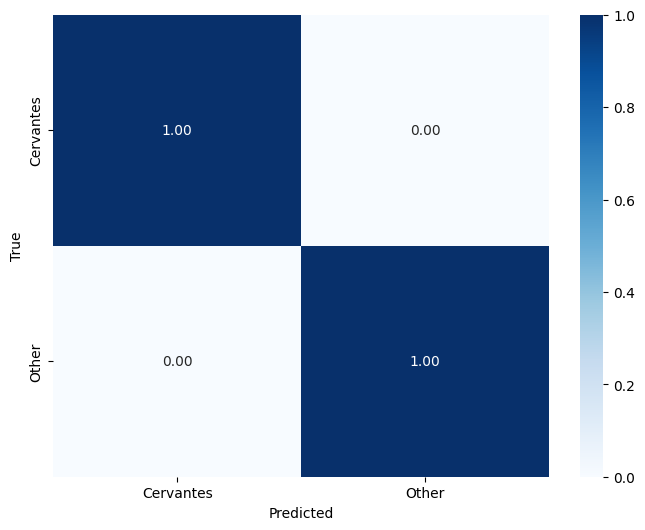

In [68]:
plt.subplots(figsize=(8,6))
cf = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cf, annot=True, fmt='.2f', cmap="Blues", xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#### with majority vote

In [69]:
for i in np.arange(0.1, 1, 0.1):
    ensemble_preds, f1_score_ensemble = ensemble(predictions=[fw_pred, sl_pred, me_pred, wm_pred, pos_pred], 
                                             y_test=y_test, majority_vote=True, threshold=0.5)
    print('threshold:', round(i,2), f1_score_ensemble)

threshold: 0.1 0.819047619047619
threshold: 0.2 0.819047619047619
threshold: 0.3 0.819047619047619
threshold: 0.4 0.819047619047619
threshold: 0.5 0.819047619047619
threshold: 0.6 0.819047619047619
threshold: 0.7 0.819047619047619
threshold: 0.8 0.819047619047619
threshold: 0.9 0.819047619047619


In [70]:
ensemble_preds, f1_score_ensemble = ensemble(predictions=[fw_pred, sl_pred, me_pred, wm_pred, pos_pred], 
                                             y_test=y_test, majority_vote=True, threshold=0.5) 
                                            
print(classification_report(y_test, ensemble_preds))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.50      0.67         4

    accuracy                           0.80        10
   macro avg       0.88      0.75      0.76        10
weighted avg       0.85      0.80      0.78        10



In [71]:
res_df.loc[idx_res] = {'Grid':1,
                'Ensemble': 1,
                'Stacked': 0,
                'Pipeline': 0, 
                'With_proba': 0,
                'Weighted': 0, 
                'Whole_docs': 1,
                'F1_weighted': round(f1_score_ensemble, 2)
}
idx_res+=1
res_df.shape

(3, 8)

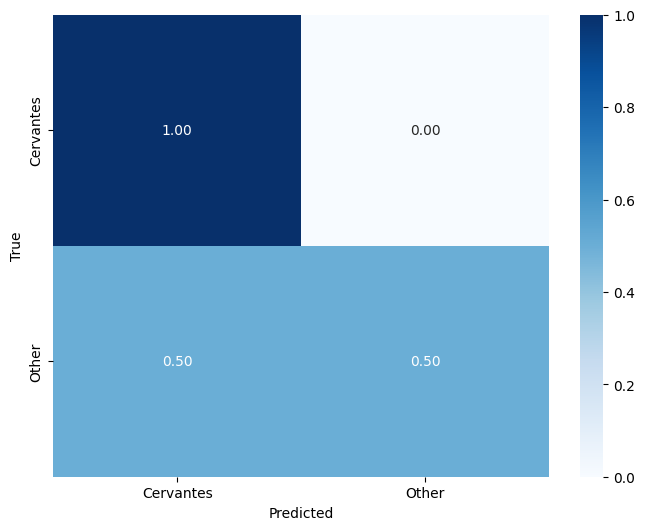

In [72]:
plt.subplots(figsize=(8,6))
cf = confusion_matrix(y_test, ensemble_preds, normalize='true')
sns.heatmap(cf, annot=True, fmt='.2f', cmap="Blues", xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

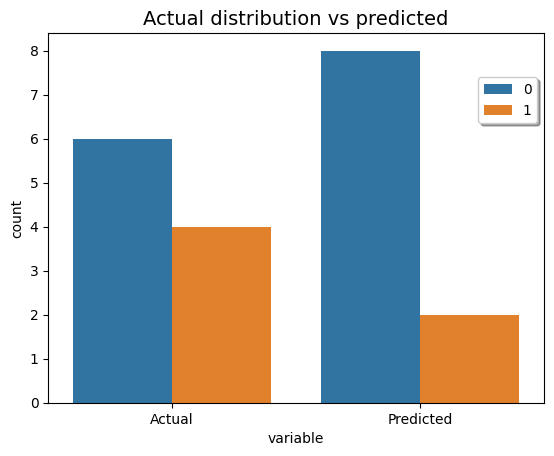

In [73]:
df_res = pd.DataFrame({'Actual': y_test, 'Predicted': ensemble_preds})
sns.countplot(x="variable", hue="value", data=pd.melt(df_res))
plt.title('Actual distribution vs predicted', fontsize=14)

plt.legend(loc='best', bbox_to_anchor=(1, 0.9), fancybox=True, shadow=True)
plt.show()

#### with weighting

In [74]:
for i in np.arange(0.1, 1, 0.1):
    ensemble_preds, f1_score_ensemble = ensemble(predictions=[fw_pred, sl_pred, me_pred, wm_pred, pos_pred],
                                                  y_test=y_test, threshold=i)
    print('threshold:', round(i,2), f1_score_ensemble)

threshold: 0.1 0.8
threshold: 0.2 0.819047619047619
threshold: 0.3 0.819047619047619
threshold: 0.4 0.7499999999999999
threshold: 0.5 0.7499999999999999
threshold: 0.6 0.7499999999999999
threshold: 0.7 0.7499999999999999
threshold: 0.8 0.7499999999999999
threshold: 0.9 0.7499999999999999


In [75]:
ensemble_preds, f1_score_ensemble = ensemble(predictions=[fw_pred, sl_pred, me_pred, wm_pred, pos_pred], y_test=y_test, threshold=0.3)
 # ma stesso risultato anche con numeri molto più piccoli
print(classification_report(y_test, ensemble_preds))

#0.8265445631350135

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.50      0.67         4

    accuracy                           0.80        10
   macro avg       0.88      0.75      0.76        10
weighted avg       0.85      0.80      0.78        10



In [76]:
res_df.loc[idx_res] = {'Grid':1,
                'Ensemble': 1,
                'Stacked': 0,
                'Pipeline': 0, 
                'With_proba': 0,
                'Weighted': 1, 
                'Whole_docs': 1,
                'F1_weighted': round(f1_score_ensemble, 2)
}
idx_res+=1
res_df.shape

(4, 8)

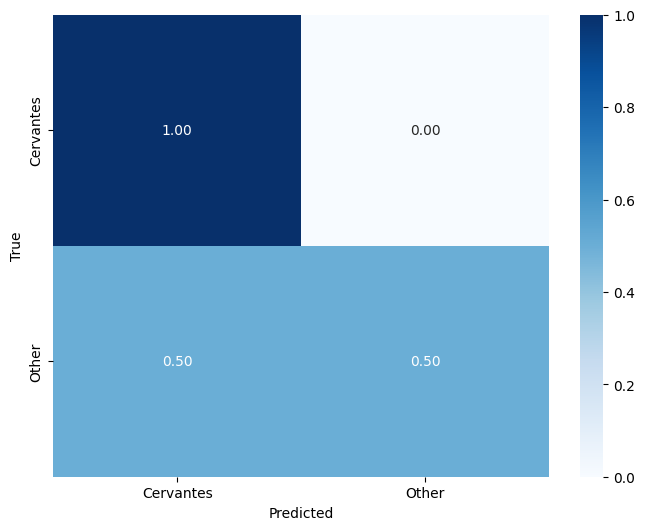

In [77]:
plt.subplots(figsize=(8,6))
cf = confusion_matrix(y_test, ensemble_preds, normalize='true')
sns.heatmap(cf, annot=True, fmt='.2f', cmap="Blues", xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

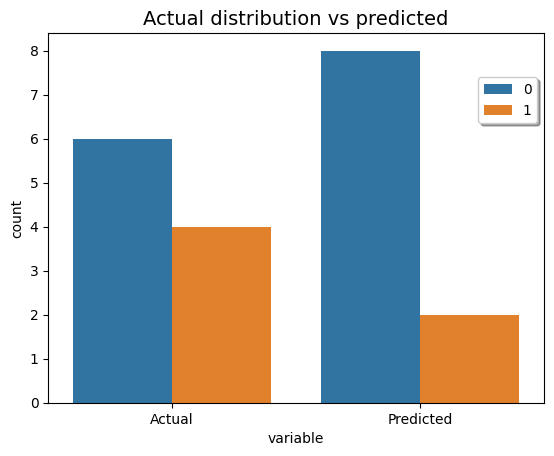

In [78]:
df_res = pd.DataFrame({'Actual': y_test, 'Predicted': ensemble_preds})
sns.countplot(x="variable", hue="value", data=pd.melt(df_res))
plt.title('Actual distribution vs predicted', fontsize=14)

plt.legend(loc='best', bbox_to_anchor=(1, 0.9), fancybox=True, shadow=True)
plt.show()

#### with probability

In [79]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)

In [80]:
probs = [fw_yproba_test,sl_yproba_test,me_yproba_test,wm_yproba_test,pos_yproba_test]
for i in np.arange(0.1, 1, 0.1):
    class_report, y_pred,f1_score_ensemble =  ensamble_prob(probs, y_test, threshold=i) #267
    print('threshold:', round(i,2), f1_score_ensemble)

threshold: 0.1 0.5714285714285715
threshold: 0.2 0.898989898989899
threshold: 0.3 1.0
threshold: 0.4 0.9032967032967033
threshold: 0.5 0.7499999999999999
threshold: 0.6 0.7499999999999999
threshold: 0.7 0.7499999999999999
threshold: 0.8 0.7499999999999999
threshold: 0.9 0.7499999999999999


In [81]:

class_report, y_pred,f1_score_ensemble = ensamble_prob(probs, y_test, threshold=0.3) 
#print(np.sum(y_pred))
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [82]:
res_df.loc[idx_res] = {'Grid':1,
                'Ensemble': 1,
                'Stacked': 0,
                'Pipeline': 0, 
                'With_proba': 1,
                'Weighted': 0, 
                'Whole_docs': 1,
                'F1_weighted': round(f1_score_ensemble, 2)
}
idx_res+=1
res_df.shape

(5, 8)

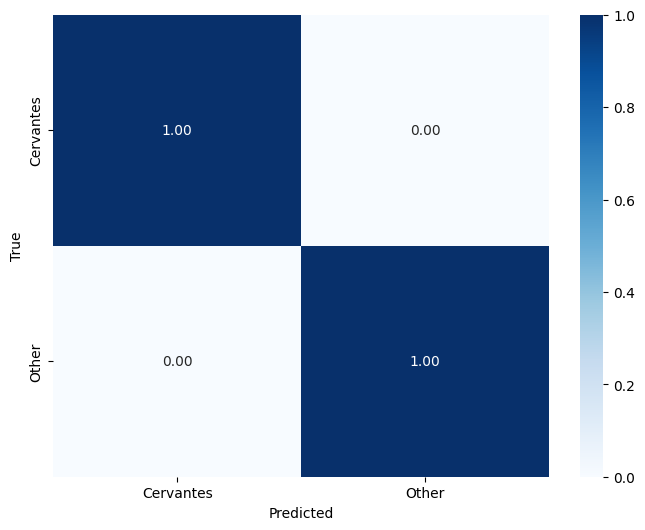

In [83]:
plt.subplots(figsize=(8,6))
cf = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cf, annot=True, fmt='.2f', cmap="Blues", xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

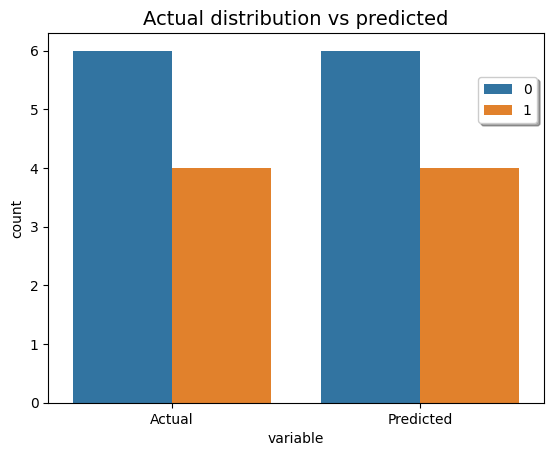

In [84]:
df_res = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
sns.countplot(x="variable", hue="value", data=pd.melt(df_res))
plt.title('Actual distribution vs predicted', fontsize=14)

plt.legend(loc='best', bbox_to_anchor=(1, 0.9), fancybox=True, shadow=True)
plt.show()

#### with weighted probability

In [85]:
res_lst = list()
for threshold in np.arange(0.41, 0.59, 0.01):
    for single_threshold in np.arange(0.11, 0.29, 0.01):
        class_report, y_pred, f1_score_ensemble = ensamble_prob_weighted(probs, y_test, single_threshold=single_threshold, threshold=threshold)
        positive_class_f1 = (class_report.split('\n')[3].split()[3])
        if float(positive_class_f1) > 0:
            res_lst.append((f1_score_ensemble, positive_class_f1, (single_threshold, threshold)))
sorted(res_lst, reverse=True)[:5]

[(1.0, '1.00', (0.2799999999999999, 0.42)),
 (1.0, '1.00', (0.2799999999999999, 0.41)),
 (1.0, '1.00', (0.2699999999999999, 0.42)),
 (1.0, '1.00', (0.2699999999999999, 0.41)),
 (1.0, '1.00', (0.2599999999999999, 0.42))]

In [86]:
class_report, y_pred, f1_score_ensemble = ensamble_prob_weighted(probs, y_test, single_threshold=0.28, threshold=0.45) #267
print(np.sum(y_pred))
print(class_report)

2
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.50      0.67         4

    accuracy                           0.80        10
   macro avg       0.88      0.75      0.76        10
weighted avg       0.85      0.80      0.78        10



In [87]:
res_df.loc[idx_res] = {'Grid':1,
                'Ensemble': 1,
                'Stacked': 0,
                'Pipeline': 0, 
                'With_proba': 1,
                'Weighted': 1, 
                'Whole_docs': 1,
                'F1_weighted': round(f1_score_ensemble, 2)
}
idx_res+=1
res_df.shape

(6, 8)

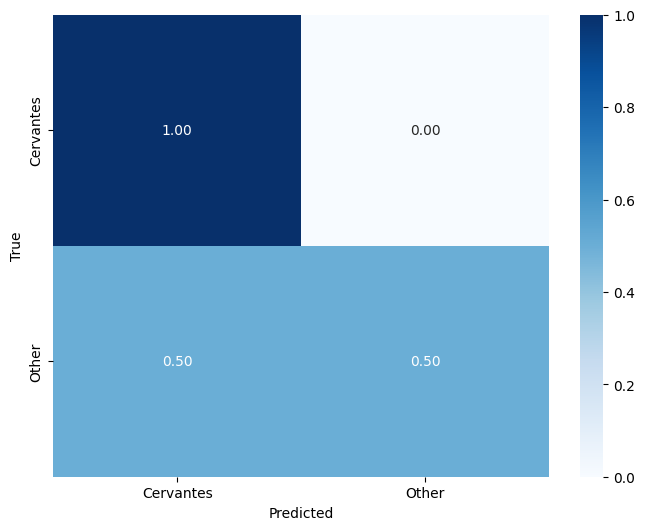

In [88]:
plt.subplots(figsize=(8,6))
cf = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cf, annot=True, fmt='.2f', cmap="Blues", xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


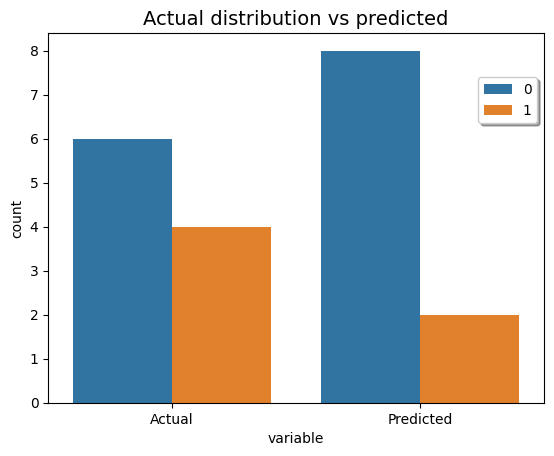

In [89]:
df_res = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
sns.countplot(x="variable", hue="value", data=pd.melt(df_res))
plt.title('Actual distribution vs predicted', fontsize=14)

plt.legend(loc='best', bbox_to_anchor=(1, 0.9), fancybox=True, shadow=True)
plt.show()

### on fragmented docs

In [90]:
param_grid= {'learner__estimator__C': [0.1, 1, 10, 100],
             'learner__estimator__dual': ['auto'],
             'learner__estimator__random_state': [0]}

fw_clf, fw_pred, fw_score, fw_yproba_dev,fw_yproba_test = build_model(feature_extractor=fw_reductor, X_dev=fw_red, y_dev=y_dev, groups=groups_dev, X_test=fw_red_test_fragments,param_grid=param_grid)
me_clf, me_pred, me_score, me_yproba_dev,me_yproba_test = build_model(feature_extractor=me_reductor, X_dev=me_red, y_dev=y_dev, groups=groups_dev, X_test=me_red_test_fragments,param_grid=param_grid)
wm_clf, wm_pred, wm_score, wm_yproba_dev,wm_yproba_test = build_model(feature_extractor=wm_reductor, X_dev=wm_red, y_dev=y_dev, groups=groups_dev, X_test=wm_red_test_fragments,param_grid=param_grid)
pos_clf, pos_pred, pos_score, pos_yproba_dev,pos_yproba_test = build_model(feature_extractor=pos_reductor, X_dev=pos_red, y_dev=y_dev, groups=groups_dev, X_test=pos_red_test_fragments,param_grid=param_grid)
sl_clf, sl_pred, sl_score, sl_yproba_dev,sl_yproba_test = build_model(feature_extractor=sl_reductor, X_dev=sl_red, y_dev=y_dev, groups=groups_dev, X_test=sl_red_test_fragments,param_grid=param_grid)

FeatureSetReductor for FeaturesFunctionWords
Best estimator: Pipeline(steps=[('learner',
                 CalibratedClassifierCV(estimator=LinearSVC(C=10,
                                                            class_weight='balanced',
                                                            dual='auto',
                                                            max_iter=10000,
                                                            random_state=0)))]) 
Best score: 0.7920410717040383

FeatureSetReductor for FeaturesMendenhall
Best estimator: Pipeline(steps=[('learner',
                 CalibratedClassifierCV(estimator=LinearSVC(C=100,
                                                            class_weight='balanced',
                                                            dual='auto',
                                                            max_iter=10000,
                                                            random_state=0)))]) 
Best score: 0.6633749101903936

#### stacking classifier - fun(tat)

In [91]:
base_clfs = [LinearSVC(random_state=42, class_weight='balanced', max_iter=10000, dual='auto') for i in range(5)]
feature_spaces = [fw_red,sl_red,me_red,wm_red,pos_red]
feature_spaces_test = [fw_red_test_fragments,sl_red_test_fragments,me_red_test_fragments,wm_red_test_fragments,pos_red_test_fragments]
posterior_probs = [fit_base_clf(clf, feature_spaces[i], y_dev,feature_spaces_test[i], groups=groups_dev) for i, clf in enumerate(base_clfs)]
# clf_names= ['fw_clf','sl_clf','me_clf','wm_clf','pos_clf' ]
# estimators = [(clf_names[i], fitted_clf.estimator) for i, (fitted_clf,_,_) in enumerate(posterior_probs)]
probs_unstacked_dev = [proba for proba, _ in posterior_probs]
probs_unstacked_test = [proba for _, proba in posterior_probs]
posterior_probs_dev = np.column_stack([prob for prob in probs_unstacked_dev])
posterior_probs_test = np.column_stack([prob for prob in probs_unstacked_test])
final_estimator = SVC(class_weight='balanced', random_state=42)

param_grid = [{
    'kernel': ['rbf', 'sigmoid'],
    'C' : [0.1, 1, 10, 100],
    'gamma' : [0.0001, 0.001, 0.1, 1, 'scale', 'auto']
},
{
    'kernel' : ['poly'],
    'C' : [0.1, 1, 10, 100],
    'degree': [1, 2, 3, 4, 5],
    'gamma' : [0.0001, 0.001, 0.1, 1, 'scale', 'auto']
}]

stacking_classifier = stacking_classification(final_estimator, posterior_probs_dev, y_dev, param_grid, groups_dev)

SVC(C=100, class_weight='balanced', degree=1, gamma=1, kernel='poly',
    random_state=42) 0.8811135933333446


In [92]:
clf = stacking_classifier
y_pred_fragments = clf.predict(posterior_probs_test)
acc = accuracy_score(y_test_frag, y_pred_fragments)
f1_frag = f1_score(y_test_frag, y_pred_fragments, average='weighted')
print('Results on fragments:') 
print('Accuracy:', acc) 
print('Weighted f1:',f1_frag)

Results on fragments:
Accuracy: 0.8333333333333334
Weighted f1: 0.8430050266261883


In [93]:
print(classification_report(y_test_frag, y_pred_fragments))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       588
           1       0.51      0.69      0.58       120

    accuracy                           0.83       708
   macro avg       0.72      0.78      0.74       708
weighted avg       0.86      0.83      0.84       708



In [94]:
res_df.loc[idx_res] = {'Grid':0,
                'Ensemble': 1,
                'Stacked': 1,
                'Pipeline': 0, 
                'With_proba': 0,
                'Weighted': 0, 
                'Whole_docs': 0,
                'F1_weighted': round(f1_frag, 2)
}
idx_res+=1
res_df.shape

(7, 8)

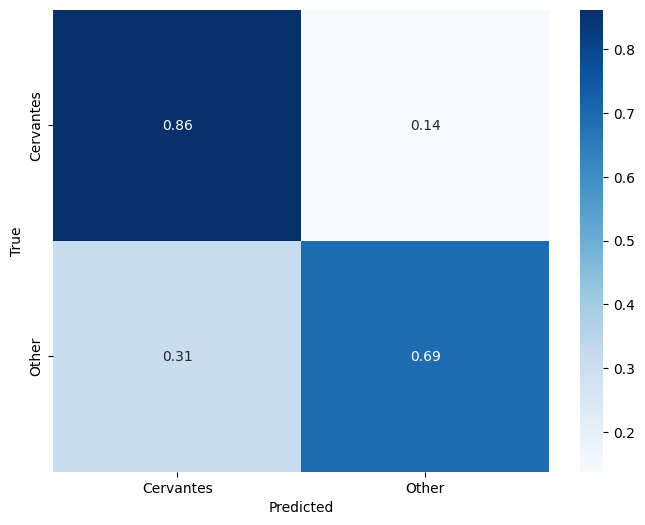

In [95]:
plt.subplots(figsize=(8,6))
cf = confusion_matrix(y_test_frag, y_pred_fragments, normalize='true')
sns.heatmap(cf, annot=True, fmt='.2f', cmap="Blues", xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#### stacking classifier - fun(kfcv)

In [96]:
base_clfs = [LinearSVC(random_state=42, class_weight='balanced', max_iter=10000, dual='auto') for i in range(5)]
feature_spaces = [fw_red,sl_red,me_red,wm_red,pos_red]
feature_spaces_test = [fw_red_test_fragments,sl_red_test_fragments,me_red_test_fragments,wm_red_test_fragments,pos_red_test_fragments]
posterior_probs = [fit_base_clf(clf, feature_spaces[i], y_dev,feature_spaces_test[i], groups=groups_dev, fun_kfcv=True) for i, clf in enumerate(base_clfs)]
#clf_names= ['fw_clf','sl_clf','me_clf','wm_clf','pos_clf' ]
#estimators = [(clf_names[i], fitted_clf.estimator) for i, (fitted_clf,_,_) in enumerate(fitted_clfs)]
probs_unstacked_dev = [proba for proba,_ in posterior_probs]
probs_unstacked_test = [proba for _, proba in posterior_probs]
posterior_probs_dev = np.column_stack([prob for prob in probs_unstacked_dev])
posterior_probs_test = np.column_stack([prob for prob in probs_unstacked_test])
final_estimator = SVC(class_weight='balanced', random_state=42)

param_grid = [{
    'kernel': ['rbf', 'sigmoid'],
    'C' : [0.1, 1, 10, 100],
    'gamma' : [0.0001, 0.001, 0.1, 1, 'scale', 'auto']
},
{
    'kernel' : ['poly'],
    'C' : [0.1, 1, 10, 100],
    'degree': [1, 2, 3, 4, 5],
    'gamma' : [0.0001, 0.001, 0.1, 1, 'scale', 'auto']
}]

stacking_classifier = stacking_classification(final_estimator, posterior_probs_dev, y_dev, param_grid, groups_dev)

SVC(C=100, class_weight='balanced', gamma=0.0001, random_state=42) 0.538537220916023


In [97]:
clf = stacking_classifier
y_pred_fragments = clf.predict(posterior_probs_test)
acc = accuracy_score(y_test_frag, y_pred_fragments)
f1_frag = f1_score(y_test_frag, y_pred_fragments, average='weighted')
print('Results on fragments:') 
print('Accuracy:', acc) 
print('Weighted f1:',f1_frag)

Results on fragments:
Accuracy: 0.1694915254237288
Weighted f1: 0.049127978383689506


In [98]:
print(classification_report(y_test_frag, y_pred_fragments))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       588
           1       0.17      1.00      0.29       120

    accuracy                           0.17       708
   macro avg       0.08      0.50      0.14       708
weighted avg       0.03      0.17      0.05       708



#### stacking classifier with optimized base classifiers

In [99]:
estimators = [fw_clf,sl_clf,me_clf,wm_clf,pos_clf]
posterior_probs = [fit_base_clf(clf, feature_spaces[i], y_dev,feature_spaces_test[i], groups=groups_dev) for i, clf in enumerate(estimators)]
probs_unstacked_dev = [dev_proba for dev_proba, _ in posterior_probs]
probs_unstacked_test = [test_proba for _, test_proba in posterior_probs]
posterior_probs_dev = np.column_stack([prob for prob in probs_unstacked_dev])
posterior_probs_test = np.column_stack([prob for prob in probs_unstacked_test])
final_estimator = SVC(class_weight='balanced', random_state=42)

param_grid = [{
    'kernel': ['rbf', 'sigmoid'],
    'C' : [0.1, 1, 10, 100],
    'gamma' : [0.0001, 0.001, 0.1, 1, 'scale', 'auto']
},
{
    'kernel' : ['poly'],
    'C' : [0.1, 1, 10, 100],
    'degree': [1, 2, 3, 4, 5],
    'gamma' : [0.0001, 0.001, 0.1, 1, 'scale', 'auto']
}]

stacking_classifier = stacking_classification(final_estimator, posterior_probs_dev, y_dev, param_grid, groups_dev)


SVC(C=0.1, class_weight='balanced', degree=2, gamma=0.1, kernel='poly',
    random_state=42) 0.890731005885294


In [100]:
clf = stacking_classifier
y_pred_fragments = clf.predict(posterior_probs_test)
acc = accuracy_score(y_test_frag, y_pred_fragments)
f1_frag = f1_score(y_test_frag, y_pred_fragments, average='weighted')
print('Results on fragments:') 
print('Accuracy:', acc) 
print('Weighted f1:',f1_frag)

Results on fragments:
Accuracy: 0.844632768361582
Weighted f1: 0.8475311261437419


In [101]:
print(classification_report(y_test_frag, y_pred_fragments))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       588
           1       0.54      0.59      0.56       120

    accuracy                           0.84       708
   macro avg       0.73      0.74      0.73       708
weighted avg       0.85      0.84      0.85       708



In [102]:
res_df.loc[idx_res] = {'Grid':1,
                'Ensemble': 1,
                'Stacked': 1,
                'Pipeline': 0, 
                'With_proba': 0,
                'Weighted': 0, 
                'Whole_docs': 0,
                'F1_weighted': round(f1_frag, 2)
}
idx_res+=1
res_df.shape

(8, 8)

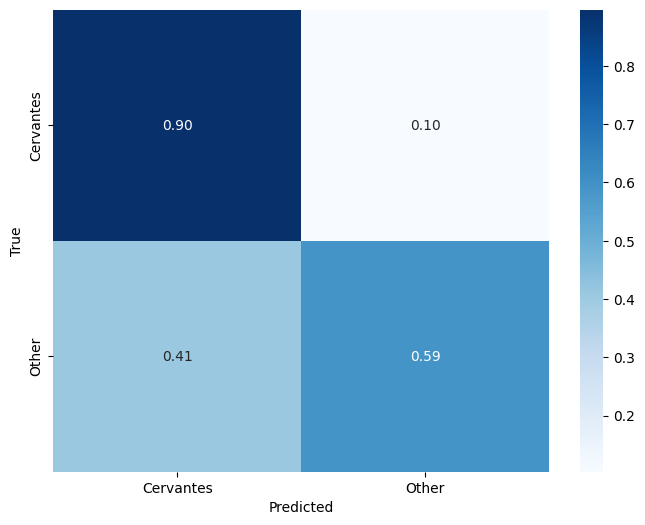

In [103]:
plt.subplots(figsize=(8,6))
cf = confusion_matrix(y_test_frag, y_pred_fragments, normalize='true')
sns.heatmap(cf, annot=True, fmt='.2f', cmap="Blues", xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

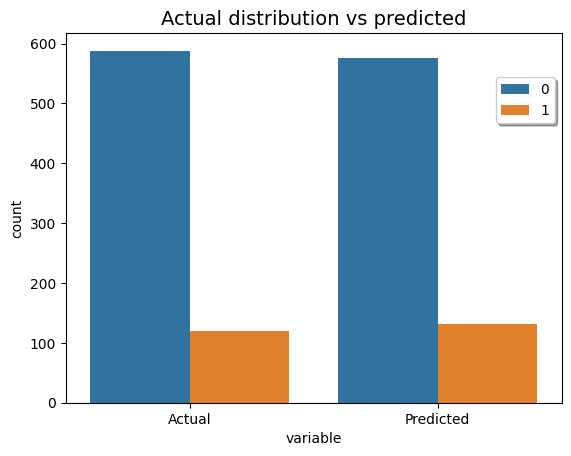

In [104]:
df_res = pd.DataFrame({'Actual': y_test_frag, 'Predicted': y_pred_fragments})
sns.countplot(x="variable", hue="value", data=pd.melt(df_res))
plt.title('Actual distribution vs predicted', fontsize=14)

plt.legend(loc='best', bbox_to_anchor=(1, 0.9), fancybox=True, shadow=True)
plt.show()

#### with majority vote

In [105]:
for i in np.arange(0.1, 1, 0.1):
    ensemble_preds, f1_score_ensemble = ensemble(predictions=[fw_pred, sl_pred, me_pred, wm_pred, pos_pred], 
                                                y_test=y_test_frag, majority_vote=True, threshold=i) 
    print('threshold:', round(i,2), 'f1:', round(f1_score_ensemble,2), 'Positive preds:', sum(ensemble_preds))

threshold: 0.1 f1: 0.77 Positive preds: 171
threshold: 0.2 f1: 0.77 Positive preds: 171
threshold: 0.3 f1: 0.86 Positive preds: 71
threshold: 0.4 f1: 0.86 Positive preds: 71
threshold: 0.5 f1: 0.9 Positive preds: 12
threshold: 0.6 f1: 0.9 Positive preds: 12
threshold: 0.7 f1: 0.91 Positive preds: 0
threshold: 0.8 f1: 0.91 Positive preds: 0
threshold: 0.9 f1: 0.91 Positive preds: 0


In [106]:
ensemble_preds, f1_score_ensemble = ensemble(predictions=[fw_pred, sl_pred, me_pred, wm_pred, pos_pred], 
                                             y_test=y_test_frag, majority_vote=True, threshold=0.4) 
                                            # ma stesso risultato anche con numeri molto più piccoli
print(classification_report(y_test_frag, ensemble_preds))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       588
           1       0.56      0.33      0.42       120

    accuracy                           0.84       708
   macro avg       0.72      0.64      0.66       708
weighted avg       0.82      0.84      0.83       708



In [107]:
res_df.loc[idx_res] = {'Grid':1,
                'Ensemble': 1,
                'Stacked': 0,
                'Pipeline': 0, 
                'With_proba': 0,
                'Weighted': 0, 
                'Whole_docs': 0,
                'F1_weighted': round(f1_score_ensemble, 2)
}
idx_res+=1
res_df.shape

(9, 8)

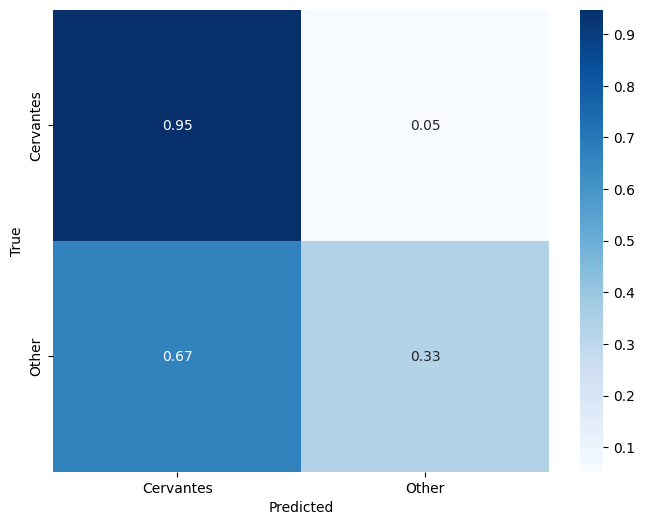

In [108]:
plt.subplots(figsize=(8,6))
cf = confusion_matrix(y_test_frag, ensemble_preds, normalize='true')
sns.heatmap(cf, annot=True, fmt='.2f', cmap="Blues", xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

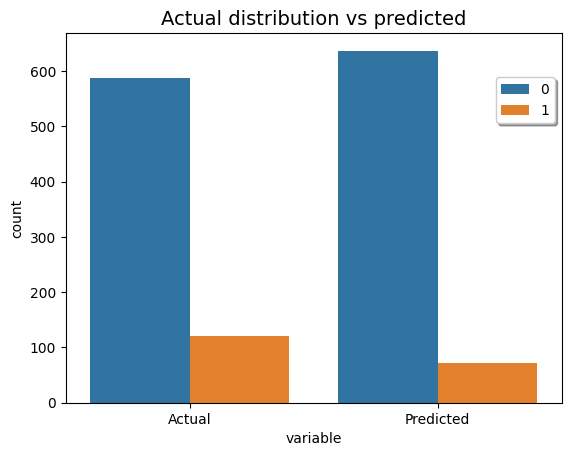

In [109]:
df_res = pd.DataFrame({'Actual': y_test_frag, 'Predicted': ensemble_preds})
sns.countplot(x="variable", hue="value", data=pd.melt(df_res))
plt.title('Actual distribution vs predicted', fontsize=14)

plt.legend(loc='best', bbox_to_anchor=(1, 0.9), fancybox=True, shadow=True)
plt.show()

#### with weighting

In [110]:
for i in np.arange(0.1, 1, 0.1):
    ensemble_preds, f1_score_ensemble = ensemble_preds, f1_score_ensemble = ensemble(predictions=[fw_pred, sl_pred, me_pred, wm_pred, pos_pred],
                                                                                      y_test=y_test_frag, threshold=i)

    print('threshold:', round(i,2), 'f1:', round(f1_score_ensemble,2), 'Positive preds:', sum(ensemble_preds))

threshold: 0.1 f1: 0.77 Positive preds: 171
threshold: 0.2 f1: 0.86 Positive preds: 71
threshold: 0.3 f1: 0.86 Positive preds: 71
threshold: 0.4 f1: 0.9 Positive preds: 12
threshold: 0.5 f1: 0.91 Positive preds: 0
threshold: 0.6 f1: 0.91 Positive preds: 0
threshold: 0.7 f1: 0.91 Positive preds: 0
threshold: 0.8 f1: 0.91 Positive preds: 0
threshold: 0.9 f1: 0.91 Positive preds: 0


In [111]:
ensemble_preds, f1_score_ensemble = ensemble(predictions=[fw_pred, sl_pred, me_pred, wm_pred, pos_pred], y_test=y_test_frag, threshold=0.3)

print(classification_report(y_test_frag, ensemble_preds))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       588
           1       0.56      0.33      0.42       120

    accuracy                           0.84       708
   macro avg       0.72      0.64      0.66       708
weighted avg       0.82      0.84      0.83       708



In [112]:
res_df.loc[idx_res] = {'Grid':1,
                'Ensemble': 1,
                'Stacked': 0,
                'Pipeline': 0, 
                'With_proba': 0,
                'Weighted': 1, 
                'Whole_docs': 0,
                'F1_weighted': round(f1_score_ensemble, 2)
}
idx_res+=1
res_df.shape

(10, 8)

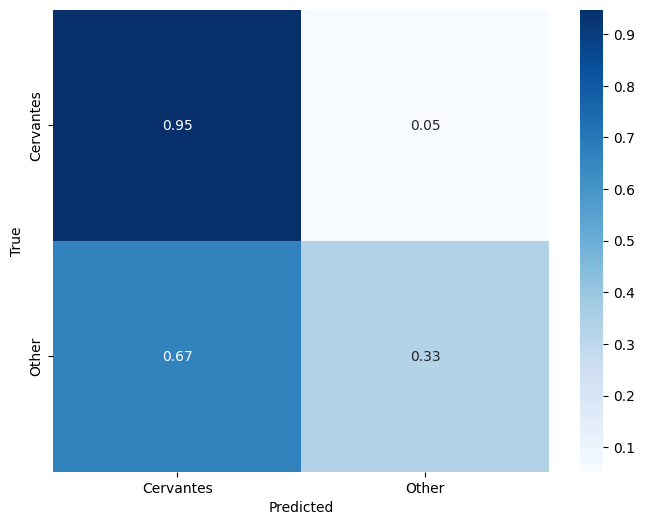

In [113]:
plt.subplots(figsize=(8,6))
cf = confusion_matrix(y_test_frag, ensemble_preds, normalize='true')
sns.heatmap(cf, annot=True, fmt='.2f', cmap="Blues", xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

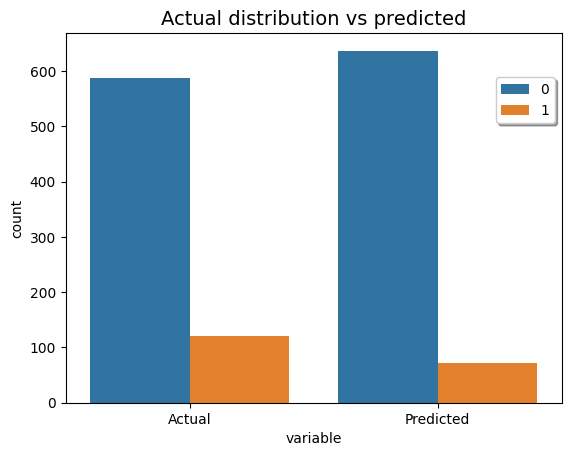

In [114]:
df_res = pd.DataFrame({'Actual': y_test_frag, 'Predicted': ensemble_preds})
sns.countplot(x="variable", hue="value", data=pd.melt(df_res))
plt.title('Actual distribution vs predicted', fontsize=14)

plt.legend(loc='best', bbox_to_anchor=(1, 0.9), fancybox=True, shadow=True)
plt.show()

#### with probability

In [115]:
probs = [fw_yproba_test, sl_yproba_test, me_yproba_test,wm_yproba_test,pos_yproba_test]
for i in np.arange(0.1, 1, 0.1):
    class_report, y_pred,f1_score_ensemble = ensamble_prob(probs, y_test_frag, threshold=i)
    print('threshold:', round(i,2), 'f1:', round(f1_score_ensemble,3), 'Positive preds:', sum(y_pred))

threshold: 0.1 f1: 0.379 Positive preds: 541
threshold: 0.2 f1: 0.699 Positive preds: 288
threshold: 0.3 f1: 0.857 Positive preds: 123
threshold: 0.4 f1: 0.887 Positive preds: 51
threshold: 0.5 f1: 0.898 Positive preds: 12
threshold: 0.6 f1: 0.907 Positive preds: 1
threshold: 0.7 f1: 0.907 Positive preds: 0
threshold: 0.8 f1: 0.907 Positive preds: 0
threshold: 0.9 f1: 0.907 Positive preds: 0


In [116]:
class_report, y_pred,f1_score_ensemble = ensamble_prob(probs, y_test_frag, threshold=0.3) 
#print(np.sum(y_pred))
print(class_report)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       588
           1       0.58      0.59      0.58       120

    accuracy                           0.86       708
   macro avg       0.75      0.75      0.75       708
weighted avg       0.86      0.86      0.86       708



In [117]:
res_df.loc[idx_res] = {'Grid':1,
                'Ensemble': 1,
                'Stacked': 0,
                'Pipeline': 0, 
                'With_proba': 1,
                'Weighted': 0, 
                'Whole_docs': 0,
                'F1_weighted': round(f1_score_ensemble, 2)
}
idx_res+=1
res_df.shape

(11, 8)

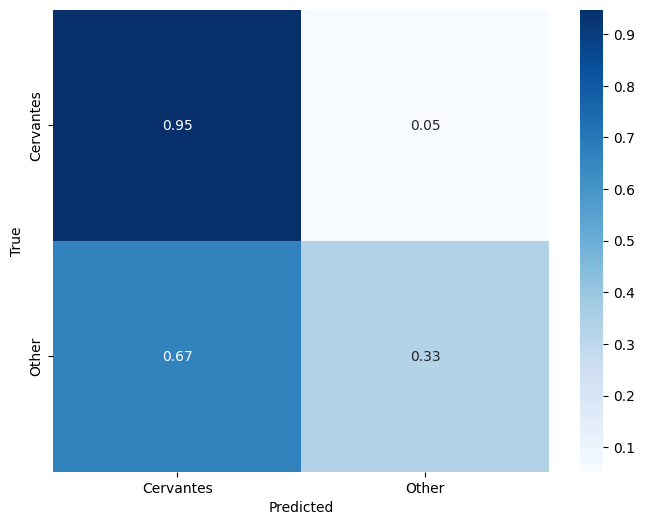

In [118]:
plt.subplots(figsize=(8,6))
cf = confusion_matrix(y_test_frag, ensemble_preds, normalize='true')
sns.heatmap(cf, annot=True, fmt='.2f', cmap="Blues", xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

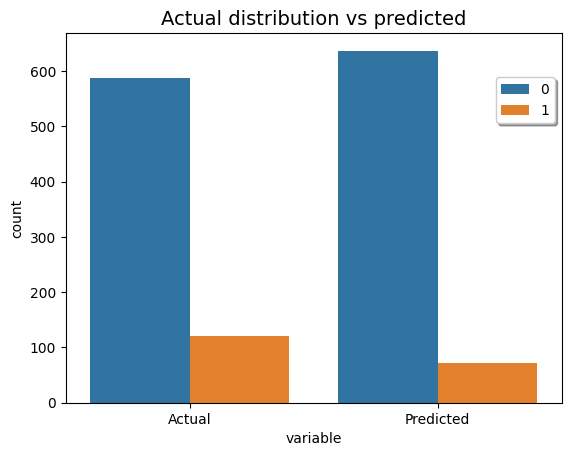

In [119]:
df_res = pd.DataFrame({'Actual': y_test_frag, 'Predicted': ensemble_preds})
sns.countplot(x="variable", hue="value", data=pd.melt(df_res))
plt.title('Actual distribution vs predicted', fontsize=14)

plt.legend(loc='best', bbox_to_anchor=(1, 0.9), fancybox=True, shadow=True)
plt.show()

#### with weighted probability

In [120]:
res_lst = list()
for threshold in np.arange(0.1, 1, 0.1):
    for single_threshold in np.arange(0.11, 0.29, 0.01):
        class_report, y_pred, f1_score_ensemble = ensamble_prob_weighted(probs, y_test_frag, single_threshold=single_threshold, threshold=threshold)
        positive_class_f1 = (class_report.split('\n')[3].split()[3])
        if float(positive_class_f1) > 0:
            res_lst.append((f1_score_ensemble, positive_class_f1, (single_threshold, threshold), sum(y_pred)))
sorted(res_lst, reverse=True)[:10]

[(0.9077221289673612, '0.61', (0.20999999999999996, 0.6), 68),
 (0.9072370459344061, '0.58', (0.21999999999999995, 0.6), 62),
 (0.9055373147572988, '0.61', (0.16999999999999998, 0.7000000000000001), 71),
 (0.9055180736108825, '0.57', (0.17999999999999997, 0.7000000000000001), 60),
 (0.9050267999420541, '0.44', (0.22999999999999993, 0.7000000000000001), 36),
 (0.9048258404293094, '0.40', (0.23999999999999994, 0.7000000000000001), 31),
 (0.9047725736647734, '0.52', (0.19999999999999996, 0.7000000000000001), 50),
 (0.9046340938085061, '0.55', (0.18999999999999995, 0.7000000000000001), 56),
 (0.9046115187471597, '0.48', (0.21999999999999995, 0.7000000000000001), 43),
 (0.9042888298958546, '0.49', (0.20999999999999996, 0.7000000000000001), 46)]

In [121]:
class_report, y_pred,f1_score_ensemble = ensamble_prob_weighted(probs, y_test_frag, threshold=0.6, single_threshold=0.22) #267
print(np.sum(y_pred))
print(class_report)

62
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       588
           1       0.85      0.44      0.58       120

    accuracy                           0.89       708
   macro avg       0.88      0.71      0.76       708
weighted avg       0.89      0.89      0.88       708



In [122]:
res_df.loc[idx_res] = {'Grid':1,
                'Ensemble': 1,
                'Stacked': 0,
                'Pipeline': 0, 
                'With_proba': 1,
                'Weighted': 1, 
                'Whole_docs': 0,
                'F1_weighted': round(f1_score_ensemble, 2)
}
idx_res+=1
res_df.shape

(12, 8)

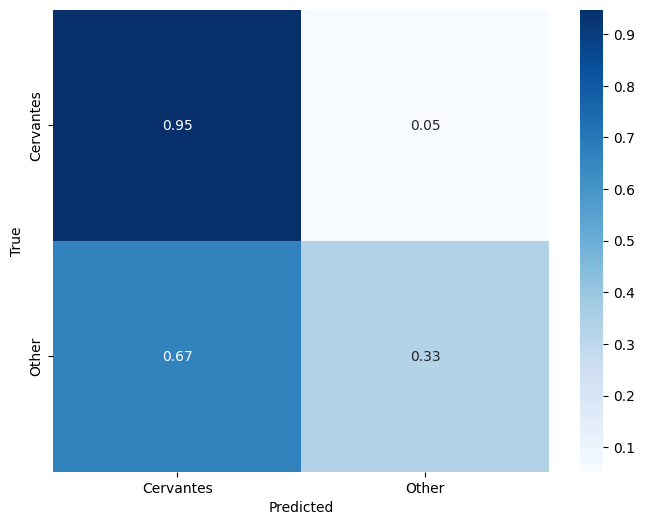

In [123]:
plt.subplots(figsize=(8,6))
cf = confusion_matrix(y_test_frag, ensemble_preds, normalize='true')
sns.heatmap(cf, annot=True, fmt='.2f', cmap="Blues", xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

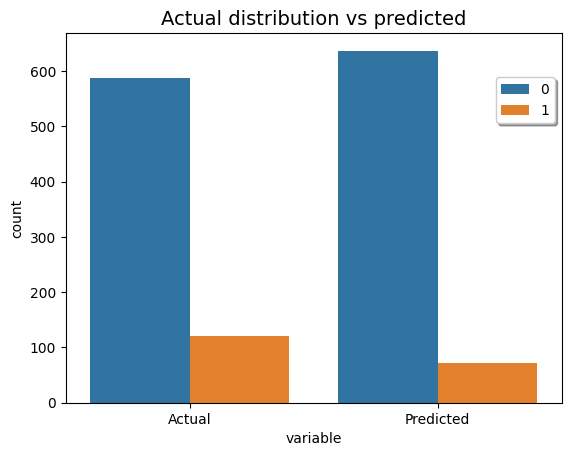

In [124]:
df_res = pd.DataFrame({'Actual': y_test_frag, 'Predicted': ensemble_preds})
sns.countplot(x="variable", hue="value", data=pd.melt(df_res))
plt.title('Actual distribution vs predicted', fontsize=14)

plt.legend(loc='best', bbox_to_anchor=(1, 0.9), fancybox=True, shadow=True)
plt.show()

## Ensamble & Hyperparameter search \w Pipeline object

### on whole docs

In [125]:
function_words_extractor2 = FeaturesFunctionWords(language='spanish')
mendenhall_extractor2 = FeaturesMendenhall(upto=20)
words_masker2 = FeaturesDVEX(function_words=fuction_ws)
sentence_len_extractor2 = FeaturesSentenceLength()
POS_extractor2 = FeaturesPOST(language='spanish')

fw_features = function_words_extractor2.fit_transform(X_dev)
fw_features_test = function_words_extractor2.transform(X_test)

sl_features = sentence_len_extractor2.fit_transform(X_dev)
sl_features_test = sentence_len_extractor2.transform(X_test)

me_features = mendenhall_extractor2.fit_transform(X_dev)
me_features_test = mendenhall_extractor2.transform(X_test)

wm_features = words_masker2.fit_transform(X_dev)
wm_features_test = words_masker2.transform(X_test)

pos_features = POS_extractor2.fit_transform(X_dev)
pos_features_test = POS_extractor2.transform(X_test)

loading cache from .postcache/dict.pkl


In [126]:
feature_sets_dict = {function_words_extractor:fw_features,
                    sentence_len_extractor:sl_features,
                    mendenhall_extractor:me_features,
                    words_masker: wm_features, 
                    POS_extractor:pos_features}

feature_sets_test = [fw_features_test, sl_features_test, me_features_test, wm_features_test, pos_features_test]

res_dict = dict()
estimators = list()
predictions = list()
probabilities_dev = list()
probabilities_test = list()
for idx, (feature_name, feature_set) in enumerate(feature_sets_dict.items()):
    print('Feature extractor:', feature_name)

    param_grid = {
        'sel__k': [round(feature_set.shape[1] * val) for val in np.arange(0.1, 1.1, 0.1)],
        'learner__estimator__C': [0.1, 1, 10, 100],
        'learner__estimator__dual': ['auto'],
        'learner__estimator__random_state': [0]
            }

    fs_clf, fs_pred, fs_score, fs_proba_dev, fs_proba_test = build_model(X_dev=feature_set, y_dev=y_dev, groups=groups_dev, X_test=feature_sets_test[idx],
                               param_grid=param_grid, pipe=True)
    res_dict[str(feature_name)] = fs_score
    estimators.append(fs_clf)
    predictions.append(fs_pred)
    probabilities_dev.append(fs_proba_dev)
    probabilities_test.append(fs_proba_test)

  

Feature extractor: FeaturesFunctionWords
None
Best estimator: Pipeline(steps=[('sel',
                 SelectKBest(k=156,
                             score_func=<function chi2 at 0x7f3e8b91dbd0>)),
                ('learner',
                 CalibratedClassifierCV(estimator=LinearSVC(C=100,
                                                            class_weight='balanced',
                                                            dual='auto',
                                                            max_iter=10000,
                                                            random_state=0)))]) 
Best score: 0.7664745496921007

Feature extractor: FeaturesSentenceLength


None
Best estimator: Pipeline(steps=[('sel',
                 SelectKBest(k=499,
                             score_func=<function chi2 at 0x7f3e8b91dbd0>)),
                ('learner',
                 CalibratedClassifierCV(estimator=LinearSVC(C=0.1,
                                                            class_weight='balanced',
                                                            dual='auto',
                                                            max_iter=10000,
                                                            random_state=0)))]) 
Best score: 0.6775503997599753

Feature extractor: FeaturesMendenhall
None
Best estimator: Pipeline(steps=[('sel',
                 SelectKBest(k=2,
                             score_func=<function chi2 at 0x7f3e8b91dbd0>)),
                ('learner',
                 CalibratedClassifierCV(estimator=LinearSVC(C=0.1,
                                                            class_weight='balanced',
                          

In [127]:
res_dict

{'FeaturesFunctionWords': 0.7664745496921007,
 'FeaturesSentenceLength': 0.6775503997599753,
 'FeaturesMendenhall': 0.6813789730430108,
 'FeaturesDVEX': 0.7855238695868872,
 'FeaturesPOST': 0.7081946180194723}

#### stacking classifier

In [140]:
estimators = [fw_clf,sl_clf,me_clf,wm_clf,pos_clf]
feature_spaces = [fw_features, sl_features, me_features, wm_features, pos_features]
feature_spaces_test = [fw_features_test, sl_features_test, me_features_test, wm_features_test, pos_features_test]
posterior_probs = [fit_base_clf(clf, feature_spaces[i], y_dev,feature_spaces_test[i], groups=groups_dev) for i, clf in enumerate(estimators)]
probs_unstacked_dev = [dev_proba for dev_proba, _ in posterior_probs]
probs_unstacked_test = [test_proba for _, test_proba in posterior_probs]
posterior_probs_dev = np.column_stack([prob for prob in probs_unstacked_dev])
posterior_probs_test = np.column_stack([prob for prob in probs_unstacked_test])
final_estimator = SVC(class_weight='balanced', random_state=42)


param_grid = [{
    'kernel': ['rbf', 'sigmoid'],
    'C' : [0.1, 1, 10, 100],
    'gamma' : [0.0001, 0.001, 0.1, 1, 'scale', 'auto']
},
{
    'kernel' : ['poly'],
    'C' : [0.1, 1, 10, 100],
    'degree': [1, 2, 3, 4, 5],
    'gamma' : [0.0001, 0.001, 0.1, 1, 'scale', 'auto']
}]

stacking_classifier = stacking_classification(final_estimator, posterior_probs_dev, y_dev, param_grid, groups_dev)

SVC(C=0.1, class_weight='balanced', degree=1, kernel='poly', random_state=42) 0.9052492646848576


In [141]:
clf = stacking_classifier
y_pred = clf.predict(posterior_probs_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print('Results on whole documents:') 
print('Accuracy (on whole documents):', acc) 
print('Weighted f1:',f1)
print()

Results on whole documents:
Accuracy (on whole documents): 1.0
Weighted f1: 1.0



In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [143]:
res_df.loc[idx_res] = {'Grid':1,
                'Ensemble': 1,
                'Stacked': 1,
                'Pipeline': 1, 
                'With_proba': 0,
                'Weighted': 0, 
                'Whole_docs': 1,
                'F1_weighted': round(f1, 2)
}
idx_res+=1
res_df.shape

(13, 8)

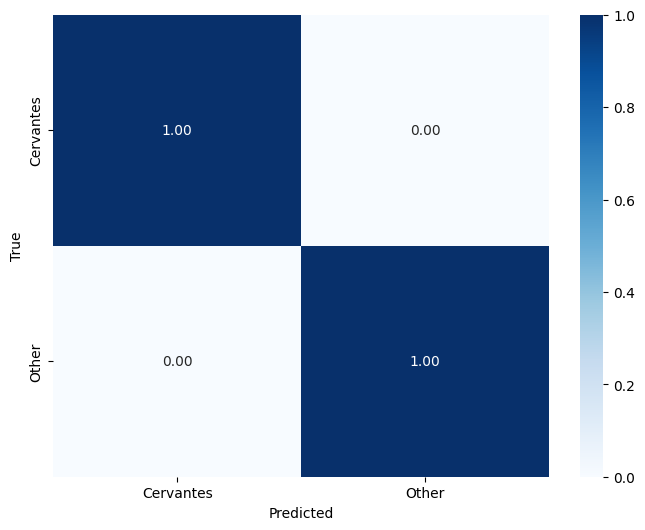

In [144]:
plt.subplots(figsize=(8,6))
cf = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cf, annot=True, fmt='.2f', cmap="Blues", xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#### with majority vote

In [145]:
thresholds=list()

for threshold in np.arange(0.01, 0.9, 0.05):
    ensemble_preds, f1_score_ensemble = ensemble(predictions=predictions, y_test=y_test, threshold=threshold, majority_vote=True)
    thresholds.append((f1_score_ensemble, threshold, np.sum(ensemble_preds)))

sorted(thresholds, reverse=True)


[(0.819047619047619, 0.36000000000000004, 2),
 (0.819047619047619, 0.31000000000000005, 2),
 (0.819047619047619, 0.26, 2),
 (0.819047619047619, 0.21000000000000002, 2),
 (0.8, 0.16000000000000003, 6),
 (0.8, 0.11, 6),
 (0.8, 0.060000000000000005, 6),
 (0.8, 0.01, 6),
 (0.7499999999999999, 0.8600000000000001, 0),
 (0.7499999999999999, 0.81, 0),
 (0.7499999999999999, 0.76, 0),
 (0.7499999999999999, 0.7100000000000001, 0),
 (0.7499999999999999, 0.66, 0),
 (0.7499999999999999, 0.6100000000000001, 0),
 (0.7499999999999999, 0.56, 0),
 (0.7499999999999999, 0.51, 0),
 (0.7499999999999999, 0.46, 0),
 (0.7499999999999999, 0.41000000000000003, 0)]

In [146]:
ensemble_preds, f1_score_ensemble = ensemble(predictions=predictions, 
                                             y_test=y_test, majority_vote=True, threshold=0.36) 
                                            # ma stesso risultato anche con numeri molto più piccoli
print(classification_report(y_test, ensemble_preds))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.50      0.67         4

    accuracy                           0.80        10
   macro avg       0.88      0.75      0.76        10
weighted avg       0.85      0.80      0.78        10



In [147]:
res_df.loc[idx_res] = {'Grid':1,
                'Ensemble': 1,
                'Stacked': 0,
                'Pipeline': 1, 
                'With_proba': 0,
                'Weighted': 0, 
                'Whole_docs': 1,
                'F1_weighted': round(f1_score_ensemble, 2)
}
idx_res+=1
res_df.shape

(14, 8)

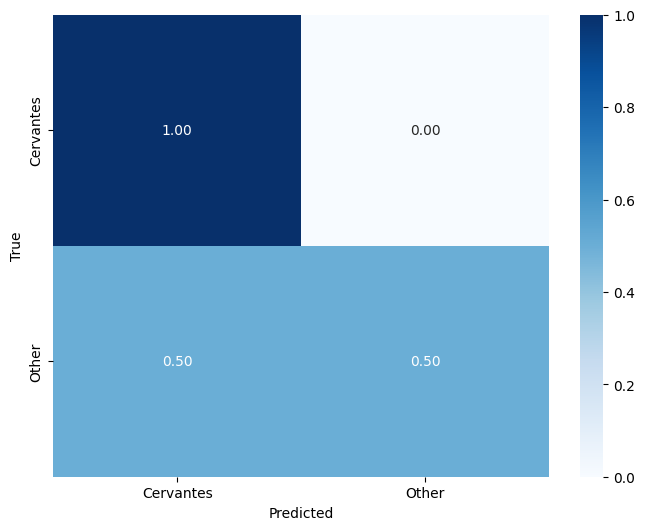

In [148]:
plt.subplots(figsize=(8,6))
cf = confusion_matrix(y_test, ensemble_preds, normalize='true')
sns.heatmap(cf, annot=True, fmt='.2f', cmap="Blues", xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

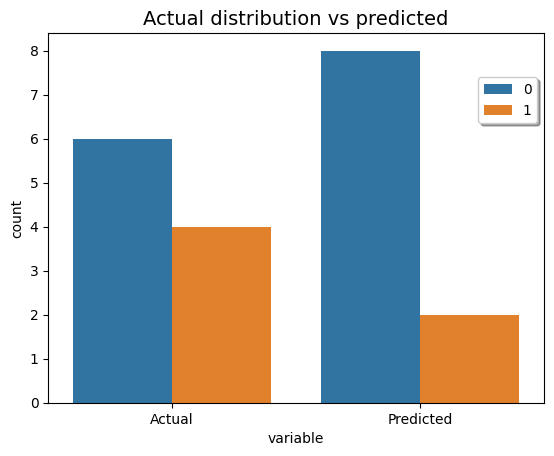

In [149]:
df_res = pd.DataFrame({'Actual': y_test, 'Predicted': ensemble_preds})
sns.countplot(x="variable", hue="value", data=pd.melt(df_res))
plt.title('Actual distribution vs predicted', fontsize=14)

plt.legend(loc='best', bbox_to_anchor=(1, 0.9), fancybox=True, shadow=True)
plt.show()

#### with weighting

In [150]:
thresholds=list()

for threshold in np.arange(0.01, 0.9, 0.05):
    ensemble_preds, f1_score_ensemble = ensemble(predictions=predictions, y_test=y_test, threshold=threshold)
    thresholds.append((f1_score_ensemble, threshold, np.sum(ensemble_preds)))

sorted(thresholds, reverse=True)


[(0.819047619047619, 0.31000000000000005, 2),
 (0.819047619047619, 0.26, 2),
 (0.819047619047619, 0.21000000000000002, 2),
 (0.819047619047619, 0.16000000000000003, 2),
 (0.8, 0.11, 6),
 (0.8, 0.060000000000000005, 6),
 (0.8, 0.01, 6),
 (0.7499999999999999, 0.8600000000000001, 0),
 (0.7499999999999999, 0.81, 0),
 (0.7499999999999999, 0.76, 0),
 (0.7499999999999999, 0.7100000000000001, 0),
 (0.7499999999999999, 0.66, 0),
 (0.7499999999999999, 0.6100000000000001, 0),
 (0.7499999999999999, 0.56, 0),
 (0.7499999999999999, 0.51, 0),
 (0.7499999999999999, 0.46, 0),
 (0.7499999999999999, 0.41000000000000003, 0),
 (0.7499999999999999, 0.36000000000000004, 0)]

In [151]:
ensemble_preds, f1_score_ensemble = ensemble(predictions=predictions, y_test=y_test, threshold=0.31)
#print(f1_score_ensemble)

print(classification_report(y_test, ensemble_preds))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.50      0.67         4

    accuracy                           0.80        10
   macro avg       0.88      0.75      0.76        10
weighted avg       0.85      0.80      0.78        10



In [152]:
res_df.loc[idx_res] = {'Grid':1,
                'Ensemble': 1,
                'Stacked': 0,
                'Pipeline': 1, 
                'With_proba': 0,
                'Weighted': 1, 
                'Whole_docs': 1,
                'F1_weighted': round(f1_score_ensemble, 2)
}
idx_res+=1
res_df.shape

(15, 8)

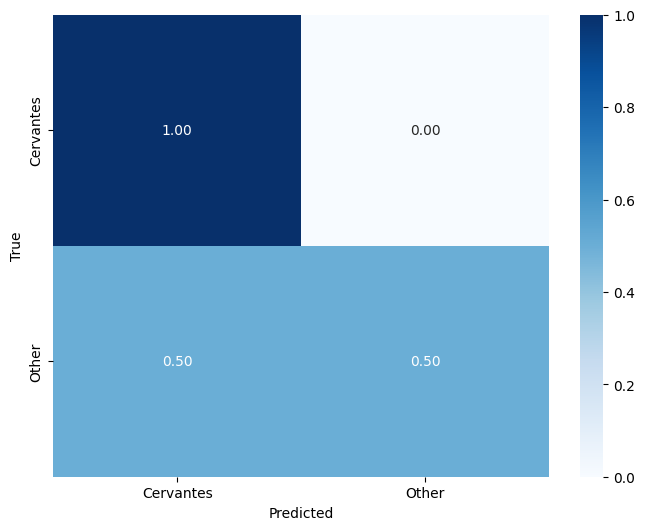

In [153]:
plt.subplots(figsize=(8,6))
cf = confusion_matrix(y_test, ensemble_preds, normalize='true')
sns.heatmap(cf, annot=True, fmt='.2f', cmap="Blues", xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

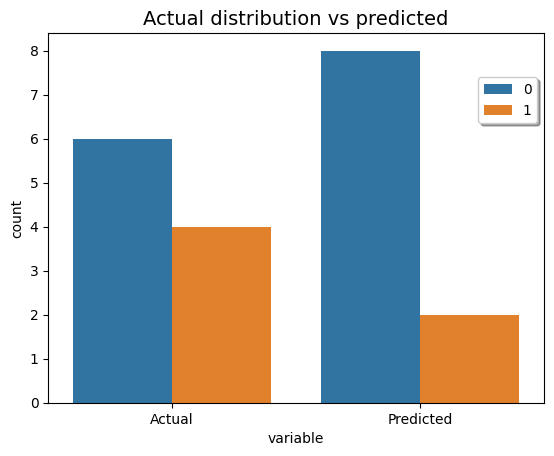

In [154]:
df_res = pd.DataFrame({'Actual': y_test, 'Predicted': ensemble_preds})
sns.countplot(x="variable", hue="value", data=pd.melt(df_res))
plt.title('Actual distribution vs predicted', fontsize=14)

plt.legend(loc='best', bbox_to_anchor=(1, 0.9), fancybox=True, shadow=True)
plt.show()

#### with probabilities

In [155]:
for i in np.arange(0.1, 1, 0.1):
    class_report, y_pred,f1_score_ensemble =  ensamble_prob(probabilities_test, y_test, threshold=i) #267
    print('threshold:', round(i,2), 'f1:',round(f1_score_ensemble,2), 'Positive class preds:', sum(y_pred))

threshold: 0.1 f1: 0.57 Positive class preds: 10
threshold: 0.2 f1: 0.9 Positive class preds: 5
threshold: 0.3 f1: 1.0 Positive class preds: 4
threshold: 0.4 f1: 0.82 Positive class preds: 2
threshold: 0.5 f1: 0.75 Positive class preds: 0
threshold: 0.6 f1: 0.75 Positive class preds: 0
threshold: 0.7 f1: 0.75 Positive class preds: 0
threshold: 0.8 f1: 0.75 Positive class preds: 0
threshold: 0.9 f1: 0.75 Positive class preds: 0


In [156]:
class_repo, y_pred,f1_score_ensemble = ensamble_prob(probabilities_test, y_test, threshold=0.3)
print(class_repo)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [157]:
res_df.loc[idx_res] = {'Grid':1,
                'Ensemble': 1,
                'Stacked': 0,
                'Pipeline': 1, 
                'With_proba': 1,
                'Weighted': 0, 
                'Whole_docs': 1,
                'F1_weighted': round(f1_score_ensemble, 2)
}
idx_res+=1
res_df.shape

(16, 8)

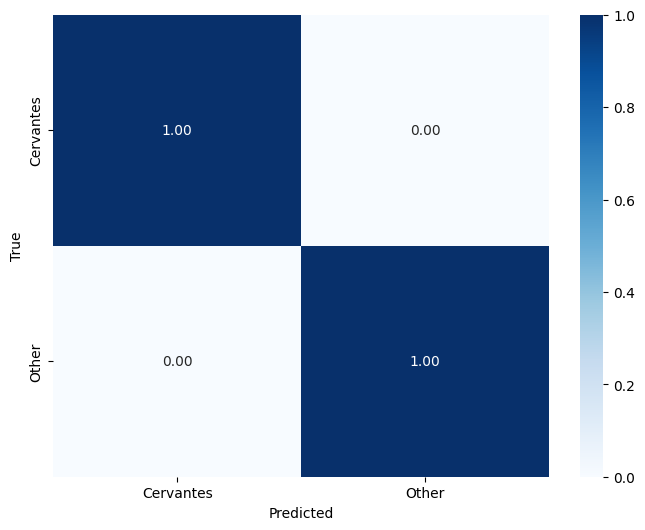

In [158]:
plt.subplots(figsize=(8,6))
cf = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cf, annot=True, fmt='.2f', cmap="Blues", xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

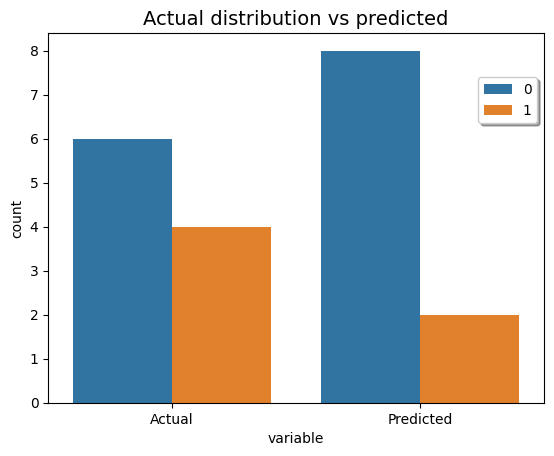

In [159]:

df_res = pd.DataFrame({'Actual': y_test, 'Predicted': ensemble_preds})
sns.countplot(x="variable", hue="value", data=pd.melt(df_res))
plt.title('Actual distribution vs predicted', fontsize=14)

plt.legend(loc='best', bbox_to_anchor=(1, 0.9), fancybox=True, shadow=True)
plt.show()

#### with weighted probabilities

In [160]:
res_lst = list()
for threshold in np.arange(0.11, 0.29, 0.01):
    for single_threshold in np.arange(0.21, 0.39, 0.01):
        class_report, y_pred,f1_score_ensemble = ensamble_prob_weighted(probabilities_test, y_test, single_threshold=single_threshold, threshold=threshold)
        positive_class_f1 = (class_report.split('\n')[3].split()[3])
        if float(positive_class_f1) > 0:
            res_lst.append((f1_score_ensemble, positive_class_f1, (single_threshold, threshold)))
sorted(res_lst, reverse=True)[:5]


[(1.0, '1.00', (0.3800000000000001, 0.2799999999999999)),
 (1.0, '1.00', (0.3800000000000001, 0.2699999999999999)),
 (1.0, '1.00', (0.3800000000000001, 0.2599999999999999)),
 (1.0, '1.00', (0.3800000000000001, 0.24999999999999994)),
 (1.0, '1.00', (0.3800000000000001, 0.23999999999999994))]

In [161]:
class_report, y_pred,f1_score_ensemble = ensamble_prob_weighted(probabilities_test, y_test, threshold=0.28, single_threshold=0.33) #267
print(np.sum(y_pred))
print(class_report)

4
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [162]:
res_df.loc[idx_res] = {'Grid':1,
                'Ensemble': 1,
                'Stacked': 0,
                'Pipeline': 1, 
                'With_proba': 1,
                'Weighted': 1, 
                'Whole_docs': 1,
                'F1_weighted': round(f1_score_ensemble, 2)
}
idx_res+=1
res_df.shape

(17, 8)

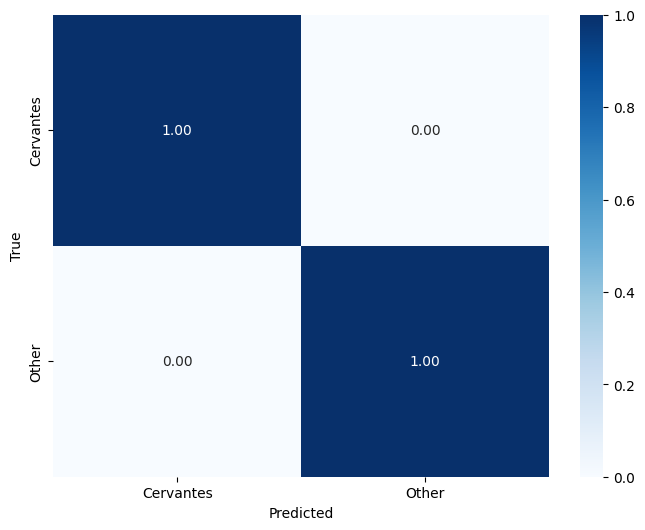

In [163]:
plt.subplots(figsize=(8,6))
cf = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cf, annot=True, fmt='.2f', cmap="Blues", xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

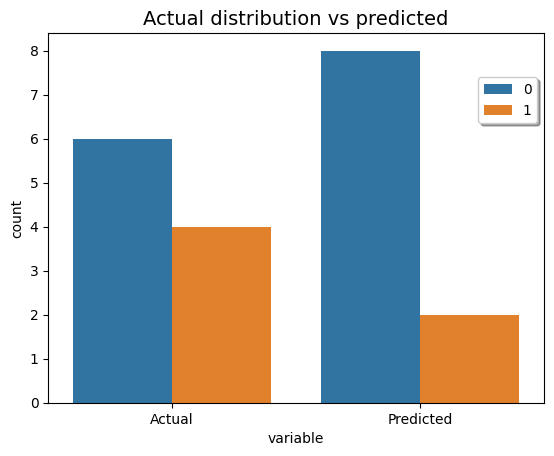

In [164]:
df_res = pd.DataFrame({'Actual': y_test, 'Predicted': ensemble_preds})
sns.countplot(x="variable", hue="value", data=pd.melt(df_res))
plt.title('Actual distribution vs predicted', fontsize=14)

plt.legend(loc='best', bbox_to_anchor=(1, 0.9), fancybox=True, shadow=True)
plt.show()

### on fragmented docs

In [165]:
function_words_extractor2 = FeaturesFunctionWords(language='spanish')
mendenhall_extractor2 = FeaturesMendenhall(upto=20)
words_masker2 = FeaturesDVEX(function_words=fuction_ws)
sentence_len_extractor2 = FeaturesSentenceLength()
POS_extractor2 = FeaturesPOST(language='spanish')

fw_features = function_words_extractor2.fit_transform(X_dev)
fw_features_test_frag = function_words_extractor2.transform(X_test_frag)

sl_features = sentence_len_extractor2.fit_transform(X_dev)
sl_features_test_frag = sentence_len_extractor2.transform(X_test_frag)

me_features = mendenhall_extractor2.fit_transform(X_dev)
me_features_test_frag = mendenhall_extractor2.transform(X_test_frag)

wm_features = words_masker2.fit_transform(X_dev)
wm_features_test_frag = words_masker2.transform(X_test_frag)

pos_features = POS_extractor2.fit_transform(X_dev)
pos_features_test_frag = POS_extractor2.transform(X_test_frag)

loading cache from .postcache/dict.pkl


In [167]:
feature_sets_dict = {function_words_extractor:fw_features,
                     sentence_len_extractor:sl_features,
                    mendenhall_extractor:me_features,
                    words_masker: wm_features, 
                    POS_extractor:pos_features}

feature_sets_test = [fw_features_test_frag, sl_features_test_frag, me_features_test_frag, wm_features_test_frag, pos_features_test_frag]

res_dict = dict()
predictions = list()
probabilities_dev = list()
probabilities_test = list()
for idx, (feature_name, feature_set) in enumerate(feature_sets_dict.items()):
    print('Feature extractor:', feature_name)
    param_grid = {
        'sel__k': [round(feature_set.shape[1] * val) for val in np.arange(0.1, 1.1, 0.1)],
        'learner__estimator__C': [0.1, 1, 10, 100],
        'learner__estimator__dual': ['auto'],
        'learner__estimator__random_state': [0]
        }

    fs_clf, fs_pred, fs_score, fs_proba_dev, fs_proba_test = build_model(X_dev=feature_set, y_dev=y_dev, groups=groups_dev, X_test=feature_sets_test[idx],
                               param_grid=param_grid, pipe=True)
    res_dict[str(feature_name)] = fs_score
    predictions.append(fs_pred)
    probabilities_dev.append(fs_proba_dev)
    probabilities_test.append(fs_proba_test)

Feature extractor: FeaturesFunctionWords


None
Best estimator: Pipeline(steps=[('sel',
                 SelectKBest(k=156,
                             score_func=<function chi2 at 0x7f3e8b91dbd0>)),
                ('learner',
                 CalibratedClassifierCV(estimator=LinearSVC(C=100,
                                                            class_weight='balanced',
                                                            dual='auto',
                                                            max_iter=10000,
                                                            random_state=0)))]) 
Best score: 0.7664745496921007

Feature extractor: FeaturesSentenceLength
None
Best estimator: Pipeline(steps=[('sel',
                 SelectKBest(k=499,
                             score_func=<function chi2 at 0x7f3e8b91dbd0>)),
                ('learner',
                 CalibratedClassifierCV(estimator=LinearSVC(C=0.1,
                                                            class_weight='balanced',
                    

In [168]:
res_dict

{'FeaturesFunctionWords': 0.7664745496921007,
 'FeaturesSentenceLength': 0.6775503997599753,
 'FeaturesMendenhall': 0.6813789730430108,
 'FeaturesDVEX': 0.7855238695868872,
 'FeaturesPOST': 0.7081946180194723}

#### stacking classifier

In [171]:
estimators = [fw_clf,sl_clf,me_clf,wm_clf,pos_clf]
feature_spaces = [fw_features, sl_features, me_features, wm_features, pos_features]
feature_spaces_test = [fw_features_test_frag, sl_features_test_frag, me_features_test_frag, wm_features_test_frag, pos_features_test_frag]
posterior_probs = [fit_base_clf(clf, feature_spaces[i], y_dev,feature_spaces_test[i], groups=groups_dev) for i, clf in enumerate(estimators)]
probs_unstacked_dev = [dev_proba for dev_proba, _ in posterior_probs]
probs_unstacked_test = [test_proba for _, test_proba in posterior_probs]
posterior_probs_dev = np.column_stack([prob for prob in probs_unstacked_dev])
posterior_probs_test = np.column_stack([prob for prob in probs_unstacked_test])
final_estimator = SVC(class_weight='balanced', random_state=42)

param_grid = [{
    'kernel': ['rbf', 'sigmoid'],
    'C' : [0.1, 1, 10, 100],
    'gamma' : [0.0001, 0.001, 0.1, 1, 'scale', 'auto']
},
{
    'kernel' : ['poly'],
    'C' : [0.1, 1, 10, 100],
    'degree': [1, 2, 3, 4, 5],
    'gamma' : [0.0001, 0.001, 0.1, 1, 'scale', 'auto']
}]

stacking_classifier = stacking_classification(final_estimator, posterior_probs_dev, y_dev, param_grid, groups_dev)

SVC(C=0.1, class_weight='balanced', degree=1, kernel='poly', random_state=42) 0.9052492646848576


In [172]:
clf = stacking_classifier
y_pred_fragments = clf.predict(posterior_probs_test)
acc = accuracy_score(y_test_frag, y_pred_fragments)
f1_frag = f1_score(y_test_frag, y_pred_fragments, average='weighted')
print('Results on fragments:') 
print('Accuracy:', acc) 
print('Weighted f1:',f1_frag)

Results on fragments:
Accuracy: 0.8375706214689266
Weighted f1: 0.845043000654905


In [173]:
print(classification_report(y_test_frag, y_pred_fragments))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       588
           1       0.52      0.66      0.58       120

    accuracy                           0.84       708
   macro avg       0.72      0.77      0.74       708
weighted avg       0.86      0.84      0.85       708



In [174]:
res_df.loc[idx_res] = {'Grid':1,
                'Ensemble': 1,
                'Stacked': 1,
                'Pipeline': 1, 
                'With_proba': 0,
                'Weighted': 0, 
                'Whole_docs': 0,
                'F1_weighted': round(f1_frag, 2)
}
idx_res+=1
res_df.shape

(18, 8)

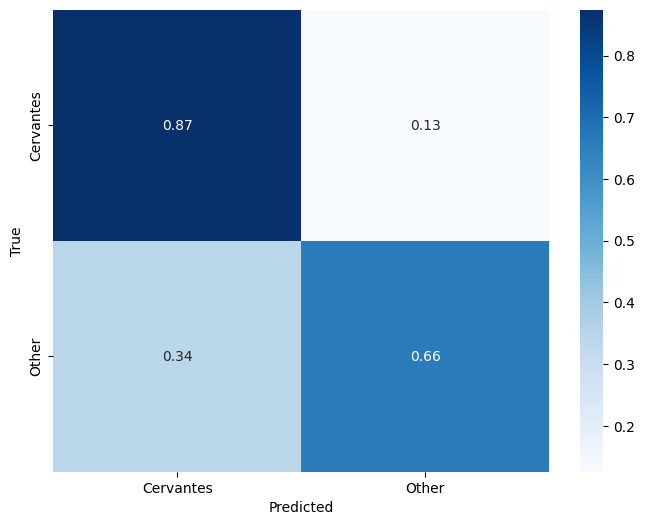

In [175]:
plt.subplots(figsize=(8,6))
cf = confusion_matrix(y_test_frag, y_pred_fragments, normalize='true')
sns.heatmap(cf, annot=True, fmt='.2f', cmap="Blues", xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#### with majority vote

In [176]:
thresholds=list()

for threshold in np.arange(0.01, 0.9, 0.05):
    ensemble_preds, f1_score_ensemble = ensemble(predictions=predictions, y_test=y_test_frag, threshold=threshold, majority_vote=True)
    thresholds.append((f1_score_ensemble, threshold, np.sum(ensemble_preds)))

sorted(thresholds, reverse=True)

[(0.9074074074074074, 0.8600000000000001, 0),
 (0.9074074074074074, 0.81, 0),
 (0.9063352505468704, 0.76, 2),
 (0.9063352505468704, 0.7100000000000001, 2),
 (0.9063352505468704, 0.66, 2),
 (0.9063352505468704, 0.6100000000000001, 2),
 (0.8922385847920719, 0.56, 15),
 (0.8922385847920719, 0.51, 15),
 (0.8922385847920719, 0.46, 15),
 (0.8922385847920719, 0.41000000000000003, 15),
 (0.8578421986794487, 0.36000000000000004, 68),
 (0.8578421986794487, 0.31000000000000005, 68),
 (0.8578421986794487, 0.26, 68),
 (0.8578421986794487, 0.21000000000000002, 68),
 (0.7606052620738326, 0.16000000000000003, 159),
 (0.7606052620738326, 0.11, 159),
 (0.7606052620738326, 0.060000000000000005, 159),
 (0.7606052620738326, 0.01, 159)]

In [177]:
len(y_test_frag)

708

In [178]:
ensemble_preds, f1_score_ensemble = ensemble(predictions=predictions, y_test=y_test_frag, threshold=0.21, majority_vote=True)
                                            
print(classification_report(y_test_frag, ensemble_preds))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       588
           1       0.54      0.31      0.39       120

    accuracy                           0.84       708
   macro avg       0.71      0.63      0.65       708
weighted avg       0.82      0.84      0.82       708



In [179]:
res_df.loc[idx_res] = {'Grid':1,
                'Ensemble': 1,
                'Stacked': 0,
                'Pipeline': 1, 
                'With_proba': 0,
                'Weighted': 0, 
                'Whole_docs': 0,
                'F1_weighted': round(f1_score_ensemble, 2)
}
idx_res+=1
res_df.shape

(19, 8)

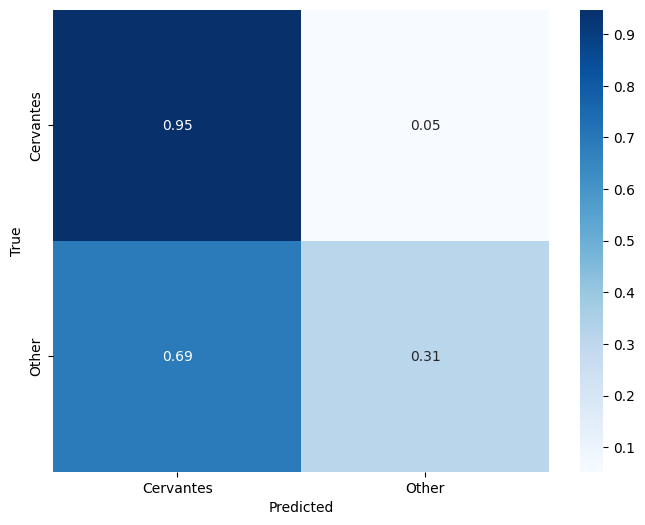

In [180]:
plt.subplots(figsize=(8,6))
cf = confusion_matrix(y_test_frag, ensemble_preds, normalize='true')
sns.heatmap(cf, annot=True, fmt='.2f', cmap="Blues", xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

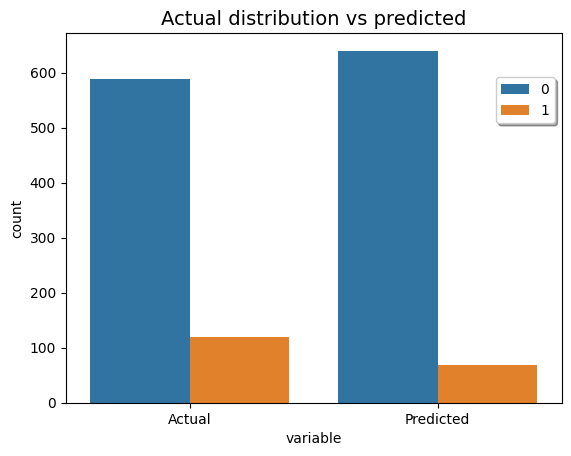

In [181]:
df_res = pd.DataFrame({'Actual': y_test_frag, 'Predicted': ensemble_preds})
sns.countplot(x="variable", hue="value", data=pd.melt(df_res))
plt.title('Actual distribution vs predicted', fontsize=14)

plt.legend(loc='best', bbox_to_anchor=(1, 0.9), fancybox=True, shadow=True)
plt.show()

#### with weighting

In [182]:
thresholds=list()

for threshold in np.arange(0.01, 0.9, 0.05):
    ensemble_preds, f1_score_ensemble = ensemble(predictions=predictions, y_test=y_test_frag, threshold=threshold)
    thresholds.append((f1_score_ensemble, threshold, np.sum(ensemble_preds)))
    # print('Threshold:', threshold, 'f1:', f1_score_ensemble)
    # print(np.unique(ensemble_preds, return_counts=True))
    # print()
sorted(thresholds, reverse=True)

[(0.9074074074074074, 0.8600000000000001, 0),
 (0.9074074074074074, 0.81, 0),
 (0.9074074074074074, 0.76, 0),
 (0.9074074074074074, 0.7100000000000001, 0),
 (0.9074074074074074, 0.66, 0),
 (0.9063352505468704, 0.6100000000000001, 2),
 (0.9063352505468704, 0.56, 2),
 (0.9063352505468704, 0.51, 2),
 (0.8922385847920719, 0.46, 15),
 (0.8922385847920719, 0.41000000000000003, 15),
 (0.8922385847920719, 0.36000000000000004, 15),
 (0.8743177247917264, 0.31000000000000005, 57),
 (0.8578421986794487, 0.26, 68),
 (0.8578421986794487, 0.21000000000000002, 68),
 (0.8473772082879448, 0.16000000000000003, 86),
 (0.7606052620738326, 0.11, 159),
 (0.7606052620738326, 0.060000000000000005, 159),
 (0.7606052620738326, 0.01, 159)]

In [183]:
ensemble_preds, f1_score_ensemble = ensemble(predictions=predictions, y_test=y_test_frag, threshold=0.21)
f1_score_ensemble

0.8578421986794487

In [184]:
print(classification_report(y_test_frag, ensemble_preds))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       588
           1       0.54      0.31      0.39       120

    accuracy                           0.84       708
   macro avg       0.71      0.63      0.65       708
weighted avg       0.82      0.84      0.82       708



In [185]:
res_df.loc[idx_res] = {'Grid':1,
                'Ensemble': 1,
                'Stacked': 0,
                'Pipeline': 1, 
                'With_proba': 0,
                'Weighted': 1, 
                'Whole_docs': 0,
                'F1_weighted': round(f1_score_ensemble, 2)
}
idx_res+=1
res_df.shape

(20, 8)

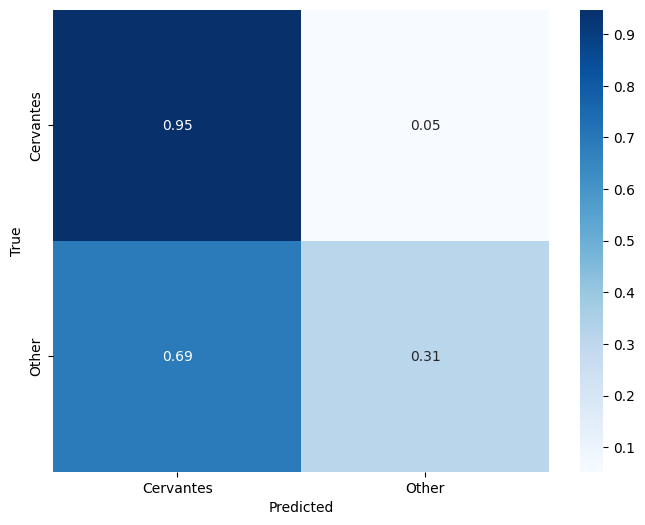

In [186]:
plt.subplots(figsize=(8,6))
cf = confusion_matrix(y_test_frag, ensemble_preds, normalize='true')
sns.heatmap(cf, annot=True, fmt='.2f', cmap="Blues", xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

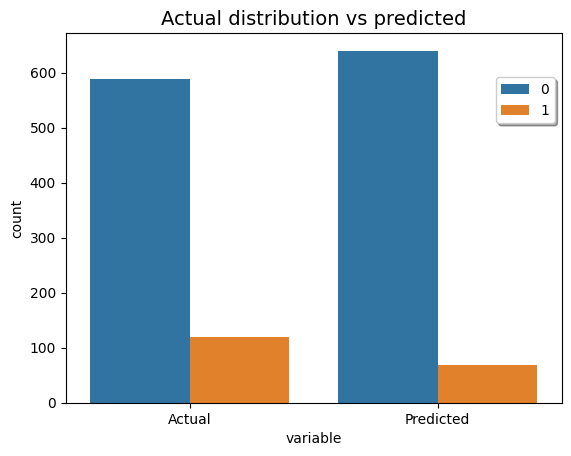

In [187]:
df_res = pd.DataFrame({'Actual': y_test_frag, 'Predicted': ensemble_preds})
sns.countplot(x="variable", hue="value", data=pd.melt(df_res))
plt.title('Actual distribution vs predicted', fontsize=14)

plt.legend(loc='best', bbox_to_anchor=(1, 0.9), fancybox=True, shadow=True)
plt.show()

#### with probabilities

In [188]:
for i in np.arange(0.1, 1, 0.1):
    class_report, y_pred, f1_score_ensemble = ensamble_prob(probabilities_test, y_test_frag, threshold=i)
    print('threshold:', round(i,2), 'f1:', round(f1_score_ensemble,3), 'Positive preds:', sum(y_pred))

threshold: 0.1 f1: 0.358 Positive preds: 563
threshold: 0.2 f1: 0.693 Positive preds: 284
threshold: 0.3 f1: 0.838 Positive preds: 124
threshold: 0.4 f1: 0.885 Positive preds: 45
threshold: 0.5 f1: 0.9 Positive preds: 10
threshold: 0.6 f1: 0.907 Positive preds: 0
threshold: 0.7 f1: 0.907 Positive preds: 0
threshold: 0.8 f1: 0.907 Positive preds: 0
threshold: 0.9 f1: 0.907 Positive preds: 0


In [189]:
class_repo, y_pred,f1_score_ensemble = ensamble_prob(probabilities_test, y_test_frag, threshold=0.4)
print(class_repo)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       588
           1       0.71      0.27      0.39       120

    accuracy                           0.86       708
   macro avg       0.79      0.62      0.65       708
weighted avg       0.84      0.86      0.83       708



In [190]:
res_df.loc[idx_res] = {'Grid':1,
                'Ensemble': 1,
                'Stacked': 0,
                'Pipeline': 1, 
                'With_proba': 1,
                'Weighted': 0, 
                'Whole_docs': 0,
                'F1_weighted': round(f1_score_ensemble, 2)
}
idx_res+=1
res_df.shape

(21, 8)

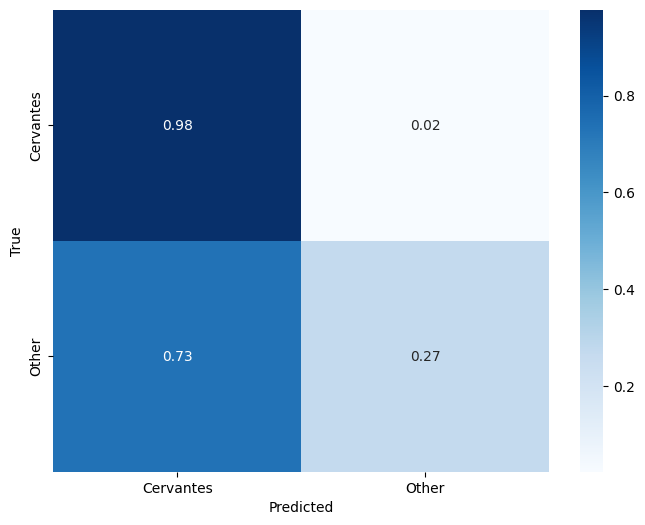

In [191]:
plt.subplots(figsize=(8,6))
cf = confusion_matrix(y_test_frag, y_pred, normalize='true')
sns.heatmap(cf, annot=True, fmt='.2f', cmap="Blues", xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

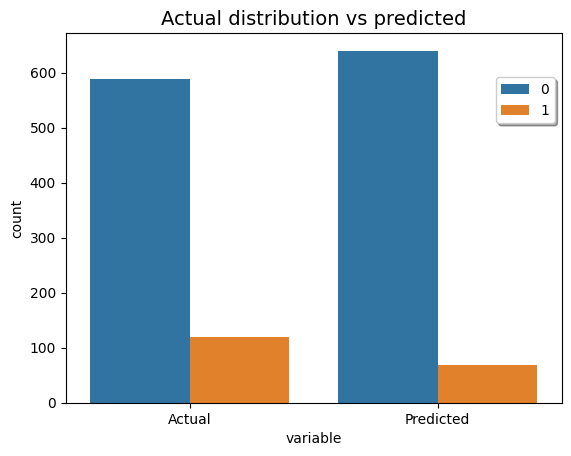

In [192]:
df_res = pd.DataFrame({'Actual': y_test_frag, 'Predicted': ensemble_preds})
sns.countplot(x="variable", hue="value", data=pd.melt(df_res))
plt.title('Actual distribution vs predicted', fontsize=14)

plt.legend(loc='best', bbox_to_anchor=(1, 0.9), fancybox=True, shadow=True)
plt.show()

#### with weighted probability

In [193]:
res_lst = list()
for threshold in np.arange(0.11, 0.29, 0.01):
    for single_threshold in np.arange(0.21, 0.39, 0.01):
        class_report, y_pred,f1_score_ensemble = ensamble_prob_weighted(probabilities_test, y_test_frag, single_threshold=single_threshold, threshold=threshold)
        positive_class_f1 = (class_report.split('\n')[3].split()[3])
        if float(positive_class_f1) > 0:
            res_lst.append((round(f1_score_ensemble,2), round(float(positive_class_f1),2),(threshold, single_threshold), sum(y_pred)))
sorted(res_lst, reverse=True)[:10]

[(0.81, 0.53, (0.2799999999999999, 0.3700000000000001), 157),
 (0.81, 0.53, (0.2699999999999999, 0.3700000000000001), 157),
 (0.81, 0.53, (0.2599999999999999, 0.3700000000000001), 157),
 (0.81, 0.53, (0.24999999999999994, 0.3700000000000001), 157),
 (0.81, 0.53, (0.23999999999999994, 0.3700000000000001), 157),
 (0.81, 0.53, (0.22999999999999993, 0.3700000000000001), 157),
 (0.81, 0.53, (0.21999999999999995, 0.3700000000000001), 157),
 (0.81, 0.53, (0.20999999999999996, 0.3700000000000001), 157),
 (0.81, 0.53, (0.19999999999999996, 0.3700000000000001), 157),
 (0.81, 0.53, (0.18999999999999995, 0.3700000000000001), 157)]

In [194]:
class_report, y_pred,f1_score_ensemble = ensamble_prob_weighted(probabilities_test, y_test_frag, threshold=0.17, single_threshold=0.35) 
print(np.sum(y_pred))
print(class_report)

174
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       588
           1       0.43      0.62      0.51       120

    accuracy                           0.80       708
   macro avg       0.67      0.73      0.69       708
weighted avg       0.83      0.80      0.81       708



In [195]:
res_df.loc[idx_res] = {'Grid':1,
                'Ensemble': 1,
                'Stacked': 0,
                'Pipeline': 1, 
                'With_proba': 1,
                'Weighted': 1, 
                'Whole_docs': 0,
                'F1_weighted': round(f1_score_ensemble, 2)
}
idx_res+=1
res_df.shape

(22, 8)

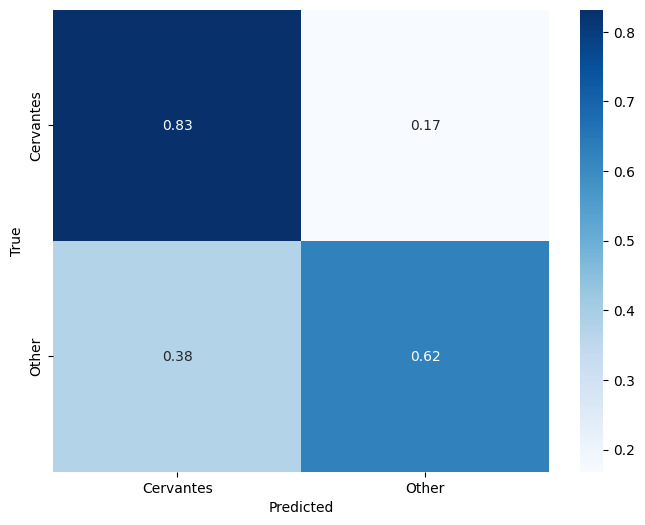

In [196]:
plt.subplots(figsize=(8,6))
cf = confusion_matrix(y_test_frag, y_pred, normalize='true')
sns.heatmap(cf, annot=True, fmt='.2f', cmap="Blues", xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

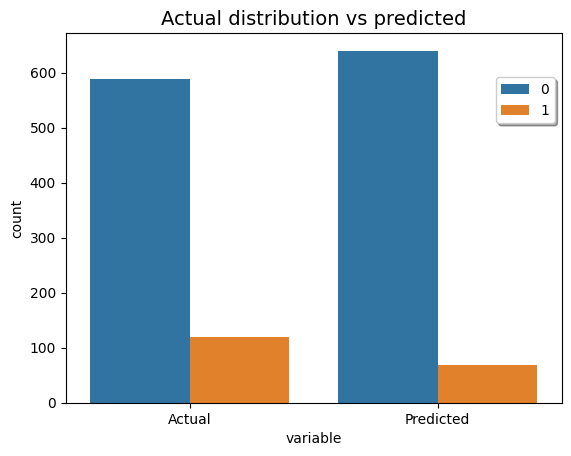

In [197]:
df_res = pd.DataFrame({'Actual': y_test_frag, 'Predicted': ensemble_preds})
sns.countplot(x="variable", hue="value", data=pd.melt(df_res))
plt.title('Actual distribution vs predicted', fontsize=14)

plt.legend(loc='best', bbox_to_anchor=(1, 0.9), fancybox=True, shadow=True)
plt.show()

# Classification with one classifier

In [198]:
X_dev = hstacked_features
X_test = hstacked_features_test

In [199]:
X_test_fragments = hstacked_features_test_frag

In [200]:
# from sklearn.svm import SVC
# clf = SVC(random_state=42, class_weight='balanced')
# scores = cross_val_score(clf, X_dev, y_dev, cv=5, groups=groups_dev, scoring='f1_weighted')
# scores.mean(), scores.std()

In [201]:
clf = LinearSVC(random_state=42, dual='auto', class_weight='balanced', max_iter=10000000)
scores = cross_val_score(clf, X_dev, y_dev, cv=5, scoring='f1_weighted', groups=groups_dev)
scores.mean(), scores.std()
#(0.7462415184175024, 0.08596639814090719)

(0.7995990254159561, 0.07191272532116126)

In [202]:
clf = LinearSVC(random_state=42, dual='auto', class_weight='balanced', max_iter=10000000)
clf.fit(X_dev, y_dev)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print('Results on whole documents:') 
print('Accuracy (on whole documents):', acc) 
print('Weighted f1:',f1)
print()

y_pred_fragments = clf.predict(X_test_fragments)
acc = accuracy_score(y_test_frag, y_pred_fragments)
f1_frag = f1_score(y_test_frag, y_pred_fragments, average='weighted')
print('Results on whole fragments:') 
print('Accuracy:', acc) 
print('Weighted f1:',f1_frag)


Results on whole documents:
Accuracy (on whole documents): 1.0
Weighted f1: 1.0

Results on whole fragments:
Accuracy: 0.8516949152542372
Weighted f1: 0.8570798268604185


### whole docs

In [203]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [204]:
res_df.loc[idx_res] = {'Grid':0,
                'Ensemble': 0,
                'Stacked': 0,
                'Pipeline': 0, 
                'With_proba': 0,
                'Weighted': 0, 
                'Whole_docs': 1,
                'F1_weighted': round(f1, 2)
}
idx_res+=1
res_df.shape

(23, 8)

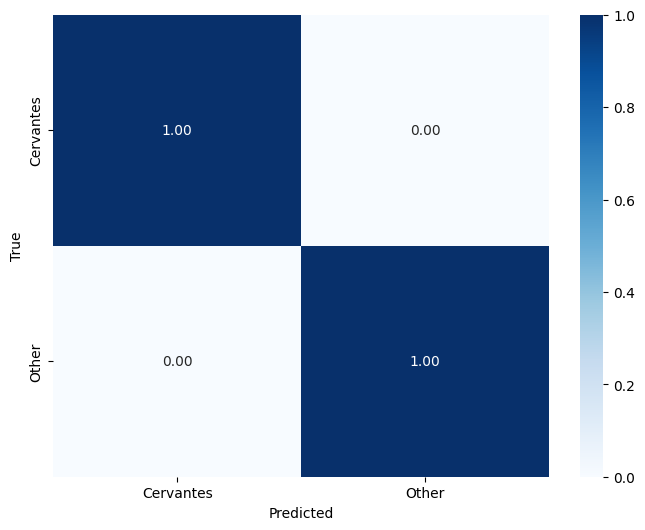

In [205]:
plt.subplots(figsize=(8,6))
cf = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cf, annot=True, fmt='.2f', cmap="Blues", xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### fragmented docs

In [206]:
print(classification_report(y_test_frag, y_pred_fragments))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       588
           1       0.55      0.67      0.60       120

    accuracy                           0.85       708
   macro avg       0.74      0.78      0.76       708
weighted avg       0.87      0.85      0.86       708



In [207]:
res_df.loc[idx_res] = {'Grid':0,
                'Ensemble': 0,
                'Stacked': 0,
                'Pipeline': 0, 
                'With_proba': 0,
                'Weighted': 0, 
                'Whole_docs': 0,
                'F1_weighted': round(f1_frag, 2)
}
idx_res+=1
res_df.shape

(24, 8)

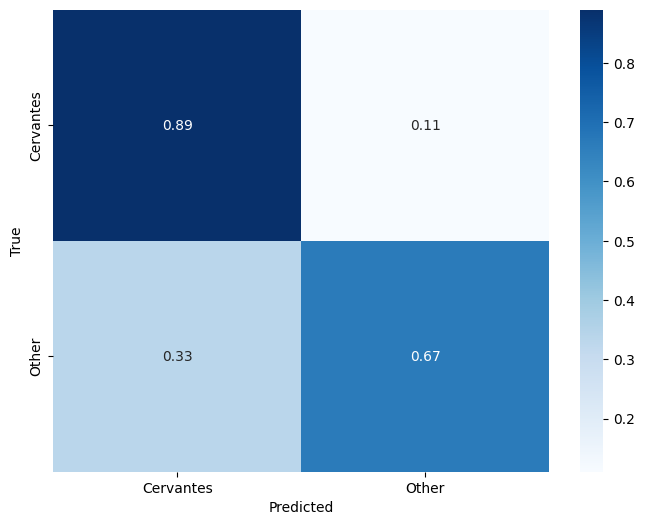

In [208]:
plt.subplots(figsize=(8,6))
cf = confusion_matrix(y_test_frag, y_pred_fragments, normalize='true')
sns.heatmap(cf, annot=True, fmt='.2f', cmap="Blues", xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Grid search

In [209]:
clf = LinearSVC(random_state=42, dual='auto', class_weight='balanced', max_iter=10000000)   
#group_kfold = GroupKFold(n_splits=5)

param_grid= {'C': [0.1, 1, 10, 100,], #1, 10, 100, 200
             'dual': ['auto'],
             'random_state': [42]}

grid = GridSearchCV(
            clf,
            param_grid=param_grid,
            cv=5,
            n_jobs=-1,
            scoring='f1_weighted')

grid.fit(X_dev, y_dev, groups=groups_dev)
grid.best_estimator_, grid.best_score_

(LinearSVC(C=100, class_weight='balanced', dual='auto', max_iter=10000000,
           random_state=42),
 0.8152565726487998)

In [210]:
clf = grid.best_estimator_
clf.fit(X_dev, y_dev)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print('Results on whole documents:') 
print('Accuracy (on whole documents):', acc) 
print('Weighted f1:',f1)
print()

y_pred_fragments = clf.predict(X_test_fragments)
acc = accuracy_score(y_test_frag, y_pred_fragments)
f1_frag = f1_score(y_test_frag, y_pred_fragments, average='weighted')
print('Results on whole fragments:') 
print('Accuracy:', acc) 
print('Weighted f1:',f1)

Results on whole documents:
Accuracy (on whole documents): 1.0
Weighted f1: 1.0

Results on whole fragments:
Accuracy: 0.8813559322033898
Weighted f1: 1.0


### whole docs

In [211]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [212]:
res_df.loc[idx_res] = {'Grid':1,
                'Ensemble': 0,
                'Stacked': 0,
                'Pipeline': 0, 
                'With_proba': 0,
                'Weighted': 0, 
                'Whole_docs': 1,
                'F1_weighted': round(f1, 2)
}
idx_res+=1
res_df.shape

(25, 8)

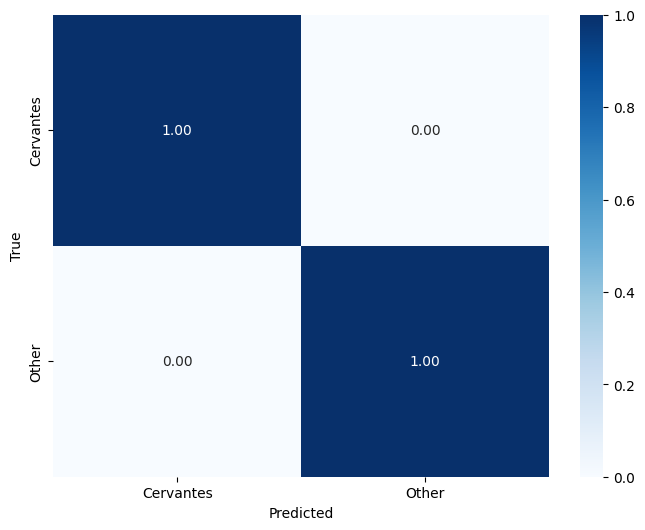

In [213]:
plt.subplots(figsize=(8,6))
cf = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cf, annot=True, fmt='.2f', cmap="Blues", xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

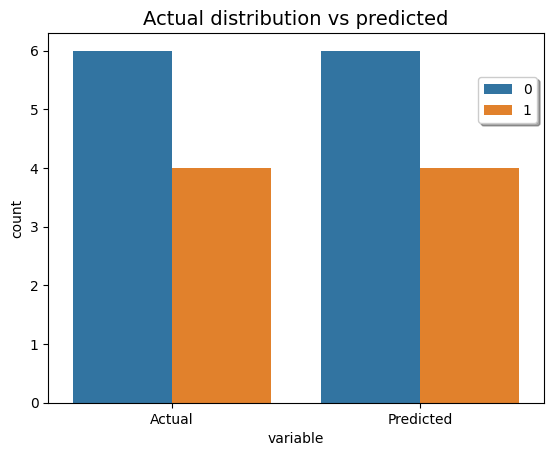

In [214]:
df_res = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
sns.countplot(x="variable", hue="value", data=pd.melt(df_res))
plt.title('Actual distribution vs predicted', fontsize=14)

plt.legend(loc='best', bbox_to_anchor=(1, 0.9), fancybox=True, shadow=True)
plt.show()

### fragmented docs

In [215]:
print(classification_report(y_test_frag, y_pred_fragments))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       588
           1       0.62      0.76      0.68       120

    accuracy                           0.88       708
   macro avg       0.79      0.83      0.81       708
weighted avg       0.89      0.88      0.89       708



In [216]:
res_df.loc[idx_res] = {'Grid':1,
                'Ensemble': 0,
                'Stacked': 0,
                'Pipeline': 0, 
                'With_proba': 0,
                'Weighted': 0, 
                'Whole_docs': 0,
                'F1_weighted': round(f1_frag, 2)
}
idx_res+=1
res_df.shape

(26, 8)

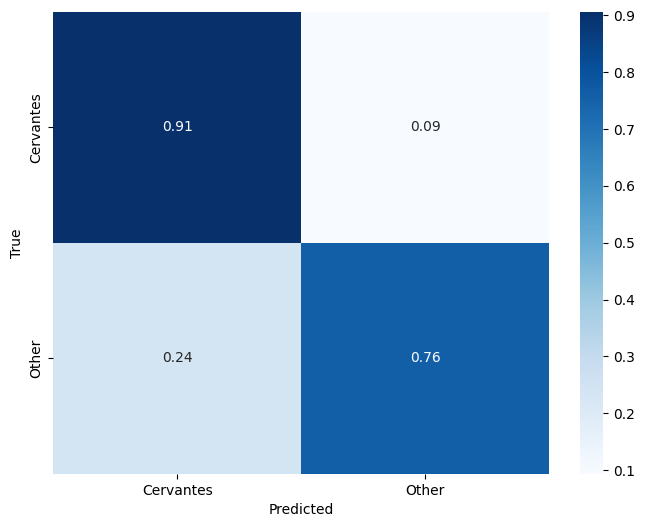

In [217]:
plt.subplots(figsize=(8,6))
cf = confusion_matrix(y_test_frag, y_pred_fragments, normalize='true')
sns.heatmap(cf, annot=True, fmt='.2f', cmap="Blues", xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

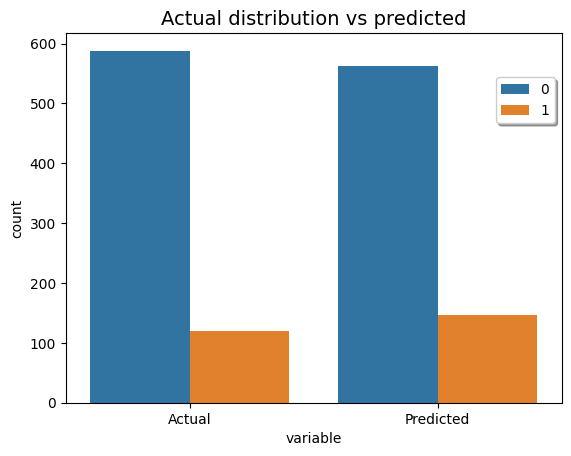

In [218]:
df_res = pd.DataFrame({'Actual': y_test_frag, 'Predicted': y_pred_fragments})
sns.countplot(x="variable", hue="value", data=pd.melt(df_res))
plt.title('Actual distribution vs predicted', fontsize=14)

plt.legend(loc='best', bbox_to_anchor=(1, 0.9), fancybox=True, shadow=True)
plt.show()

# Model Evaluation

In [219]:
confidence_scores = clf.decision_function(X_test)
print('Confidence Scores:')
for score, pred, true in zip(confidence_scores, y_pred, y_test):
    print(score, pred, true)

Confidence Scores:
-1.7492837631229152 0 0
1.0837938842380028 1 1
-1.8147576276639588 0 0
-1.9558011811891238 0 0
0.969184859003172 1 1
-1.0002612614833808 0 0
-2.912433178171047 0 0
0.9303938561094514 1 1
0.5634718050795522 1 1
-1.0616532180796883 0 0


In [220]:
clf = CalibratedClassifierCV(clf) 
clf.fit(X_dev, y_dev)
y_proba = clf.predict_proba(X_test)

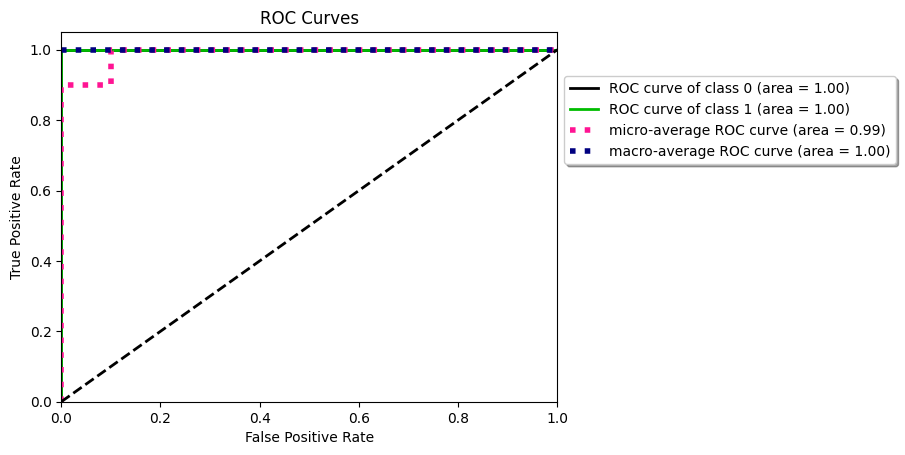

In [221]:
plot_roc(y_test, clf.predict_proba(X_test))
plt.legend(loc='best', bbox_to_anchor=(1, 0.9), fancybox=True, shadow=True)
plt.show()
#print(roc_auc_score(y_test, y_proba))

In [222]:
clf = CalibratedClassifierCV(clf) 
clf.fit(X_dev, y_dev)
y_proba = clf.predict_proba(X_test)

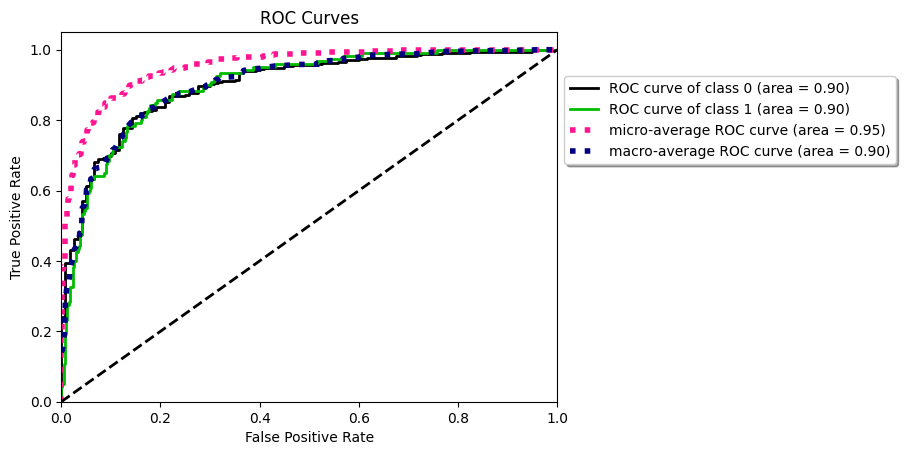

In [223]:
plot_roc(y_test_frag, clf.predict_proba(X_test_fragments))
plt.legend(loc='best', bbox_to_anchor=(1, 0.9), fancybox=True, shadow=True)
plt.show()

In [224]:
res_df[res_df['Whole_docs']==0].sort_values(by='F1_weighted', ascending=False)

,Grid,Ensemble,Stacked,Pipeline,With_proba,Weighted,Whole_docs,F1_weighted
11,1,1,0,0,1,1,0,0.91
20,1,1,0,1,1,0,0,0.89
25,1,0,0,0,0,0,0,0.89
8,1,1,0,0,0,0,0,0.86
9,1,1,0,0,0,1,0,0.86
10,1,1,0,0,1,0,0,0.86
18,1,1,0,1,0,0,0,0.86
19,1,1,0,1,0,1,0,0.86
23,0,0,0,0,0,0,0,0.86
7,1,1,1,0,0,0,0,0.85


In [225]:
res_df[res_df['Whole_docs']==1].sort_values(by='F1_weighted', ascending=False)

,Grid,Ensemble,Stacked,Pipeline,With_proba,Weighted,Whole_docs,F1_weighted
0,0,1,1,0,0,0,1,1.00
1,1,1,1,0,0,0,1,1.00
4,1,1,0,0,1,0,1,1.00
12,1,1,1,1,0,0,1,1.00
15,1,1,0,1,1,0,1,1.00
16,1,1,0,1,1,1,1,1.00
22,0,0,0,0,0,0,1,1.00
24,1,0,0,0,0,0,1,1.00
2,1,1,0,0,0,0,1,0.82
3,1,1,0,0,0,1,1,0.82


In [226]:
res_df[res_df['Stacked']==1].sort_values(by='F1_weighted', ascending=False)

,Grid,Ensemble,Stacked,Pipeline,With_proba,Weighted,Whole_docs,F1_weighted
0,0,1,1,0,0,0,1,1.00
1,1,1,1,0,0,0,1,1.00
12,1,1,1,1,0,0,1,1.00
7,1,1,1,0,0,0,0,0.85
17,1,1,1,1,0,0,0,0.85
6,0,1,1,0,0,0,0,0.84
